<div class="markdown-google-sans">
  <h1>INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS</h1>
</div>
*Material desenvolvido para a disciplina LOB1266 - Introdução à Ciência de Dados e Aprendizado de Máquinas da Escola de Engenharia de Lorena, Universidade de São Paulo.*

Prof. Dr. Fabiano Fernandes Bargos

Bolsistas: João Vitor Fernandes Gomes (Graduando em Engenharia Química)  
Projeto: `APRIMORAMENTO DE CONTEÚDOS DIDÁTICOS DA DISCIPLINA LOB1266 - INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS`

# Setup

## Sweetviz
Nessa aula, será usada a biblioteca `sweetviz`, que auxilia no processo de visualização de dados. Porém, ela não é nativa do ambiente colab, e para isso é necessário duas coisas:
1. Instalar uma versão do numpy mais velha;
2. Instalar o sweetviz.
Para isso, pode usar os comandos:


In [20]:
!pip install numpy==1.26.4
!pip install sweetviz
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]━━━━━━━ 2/3 [ipywidgets]


## REINICIE
Caso você esteje usando a versão local, isto não é necessário.

Agora, vá em `Runtime` ->` Restart Session (CTRL + M .)`, e continue com a aula.
---

## Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CRISP-DM
CRISP-DM, de *CRoss Industry Standard Process for Data Mining*, é uma metodologia para projetos de *Data Science *e *Machine Learning* concebida em 1996 pelas empresas SPSS, Teradata, Daimler AG, NCR Corporation e OHRA. É um modelo de processo de mineração de dados utilizadas por algumas empresas em seus projetos de mineração de dados.  
O método organiza todo os processos do projeto em 6 etapas iterativas:

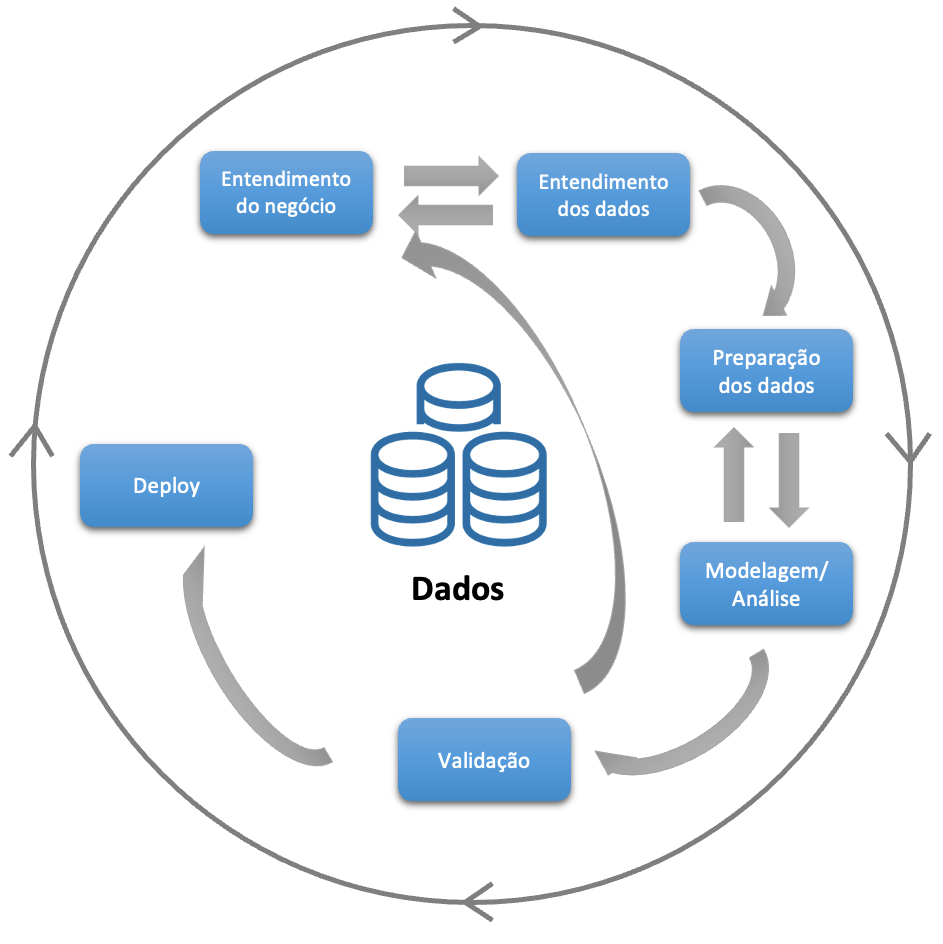

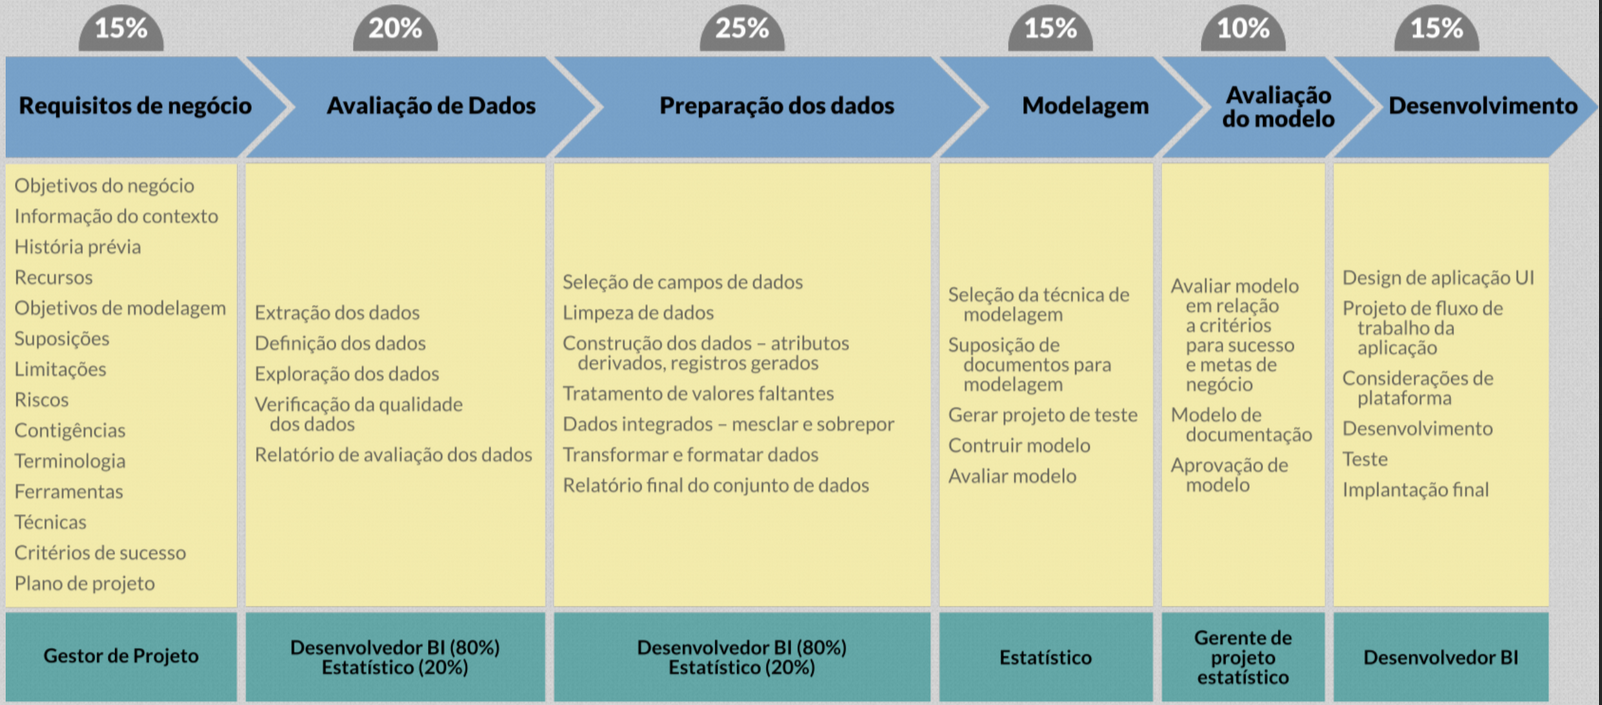

Assim, o resto do notebook, assim como modelagens futuras, seguirão este padrão, e serão organizadas de acordo:

# Explicação dos objetivos (Entendimento do negócio)
O objetivo deste _notebook_ é criar um modelo que consiga prever, com dados históricos do [INMET](https://portal.inmet.gov.br/dadoshistoricos), se um ponto foi medido em Cachoeira Paulista ou Manaus.

# Coleta dos dados (Entendimento dos dados)

## Importar os dados
Vamos usar como exemplo uma `DataFrame` mais simples que a anterior. Porém, é necessário montá-la.

Segue os urls ou o caminho:


In [4]:
url_cachoeira = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/dfcachoeira.csv'
caminho_cachoeira = 'dados/dfcachoeira.csv'

url_manaus = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/dfmanaus.csv'
caminho_manaus = 'dados/dfmanaus.csv'

In [5]:
# Criar uma DataFrame a partir do arquivo csv:
try:
    df1_cach = pd.read_csv(caminho_cachoeira,
                           sep=';', # Indica que os itens estão separados por ;
                           decimal=',') # Indica que os itens estão separados por ,
except:
    df1_cach = pd.read_csv(url_cachoeira,
                           sep=';', # Indica que os itens estão separados por ;
                           decimal=',') # Indica que os itens estão separados por ,
    

Agora crie uma `DataFrame` para o arquivo em `url_manaus` ou `caminho_manaus`. Não se esqueça de indicar o separador.

In [6]:
# Criar uma DataFrame a partir de url_manaus ou caminho_manaus:
df1_manaus = pd.read_csv(caminho_manaus,
                         sep =';',
                         decimal=',')

Vamos analisar as `DataFrames`, e ver as alterações necessárias:

In [6]:
df1_manaus.head() # Retorna as primeiros 5 linhas da DataFrame.

Data  Precipitação Total Diária  Pressão Média Diária  \
0  2023/01/01                        0.8           1004.787500   
1  2023/01/02                        1.2           1004.800000   
2  2023/01/03                       12.4           1005.129167   
3  2023/01/04                        0.0           1004.595833   
4  2023/01/05                        2.0           1004.847826   

   Radiação Total  Temperatura Média Diária  Temperatura Máxima  \
0         16946.2                 25.720833                 NaN   
1         12165.3                 26.125000                32.5   
2          7731.9                 24.900000                29.0   
3         16815.4                 27.129167                32.0   
4         12621.6                 27.243478                32.4   

   Temperatura Mínima  Umidade Máxima  Umidade Mínima  Velocidade do Vento  \
0                23.0            96.0             NaN             1.591667   
1                24.3            93.0            58.0             1.341667   
2                22.8            97.0            71.0             1.079167   
3                23.9            93.0             NaN             1.445833   
4                24.2            93.0            56.0             1.143478   

   Cidade  
0  Manaus  
1  Manaus  
2  Manaus  
3  Manaus  
4  Manaus

In [7]:
print(df1_cach.columns) # Exibe as colunas de df1_cach
print(df1_manaus.columns) # Exibe as colunas de df1_manaus


Index(['Data', 'Precipitação Total Diária', 'Pressão Média Diária',
       'Radiação Total', 'Temperatura Média Diária', 'Temperatura Máxima',
       'Temperatura Mínima', 'Umidade Máxima', 'Umidade Mínima',
       'Velocidade do Vento', 'Cidade'],
      dtype='object')
Index(['Data', 'Precipitação Total Diária', 'Pressão Média Diária',
       'Radiação Total', 'Temperatura Média Diária', 'Temperatura Máxima',
       'Temperatura Mínima', 'Umidade Máxima', 'Umidade Mínima',
       'Velocidade do Vento', 'Cidade'],
      dtype='object')


Também é interessante checar o `.info()`, para entender os `dtypes` com que estamos trabalhando:

In [8]:
df1_manaus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       365 non-null    object 
 1   Precipitação Total Diária  361 non-null    float64
 2   Pressão Média Diária       359 non-null    float64
 3   Radiação Total             356 non-null    float64
 4   Temperatura Média Diária   357 non-null    float64
 5   Temperatura Máxima         355 non-null    float64
 6   Temperatura Mínima         359 non-null    float64
 7   Umidade Máxima             356 non-null    float64
 8   Umidade Mínima             359 non-null    float64
 9   Velocidade do Vento        357 non-null    float64
 10  Cidade                     365 non-null    object 
dtypes: float64(9), object(2)
memory usage: 31.5+ KB


# Limpeza dos dados (Preparação de dados)

## Lidando com datas
Pandas possui uma função inata para lidar com datas:


```
pd.to_datetime(col_var, format=...)
```
O argumento `format` é opcional, e é declarado de acordo com os [códigos de formatos de python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

Segue um exemplo:


```
'31/01/22 23:59:59.999999' = '%d/%m/%y %H:%M:%S.%f'
```




In [39]:
# Iguala a coluna Data à sua conversão em datetime:
df1_cach['Data'] = pd.to_datetime(df1_cach['Data'])

Converta a coluna `Data` de `df1_manaus`:

In [40]:
df1_manaus['Data'] = pd.to_datetime(df1_manaus['Data'])

## Concatenando
Como ambas `DataFrames` possuem as mesmas colunas, é possível concatenar diretamente:

In [43]:
df_concat = pd.concat( # Invoca o método de concatenação
    [df1_cach, df1_manaus] # Na lista contendo as DataFrames
                )

## Indexing
Vamos determinar o `index`, a partir da coluna `"Data"`.


In [44]:
df_concat = df_concat.set_index('Data') # Seleciona a coluna Data como index
df_concat.head() # Retorna as 5 primeiras colunas

Precipitação Total Diária  Pressão Média Diária  Radiação Total  \
Data                                                                          
2023-01-01                        0.4            948.762500         22965.3   
2023-01-02                        0.0            946.658333             NaN   
2023-01-03                        0.0            944.604167         19112.9   
2023-01-04                        0.4            943.491304         15371.8   
2023-01-05                       21.0            945.939130          7177.5   

            Temperatura Média Diária  Temperatura Máxima  Temperatura Mínima  \
Data                                                                           
2023-01-01                 23.025000                29.6                18.1   
2023-01-02                 23.925000                31.3                17.9   
2023-01-03                 23.608333                29.9                19.3   
2023-01-04                 24.139130                29.8                21.2   
2023-01-05                 19.830435                23.6                18.4   

            Umidade Máxima  Umidade Mínima  Velocidade do Vento  \
Data                                                              
2023-01-01           100.0            52.0             0.604167   
2023-01-02           100.0            41.0             1.008333   
2023-01-03           100.0            49.0             1.508333   
2023-01-04           100.0             NaN             0.852174   
2023-01-05           100.0            81.0             1.352174   

                        Cidade  
Data                            
2023-01-01  Cachoeira Paulista  
2023-01-02  Cachoeira Paulista  
2023-01-03  Cachoeira Paulista  
2023-01-04  Cachoeira Paulista  
2023-01-05  Cachoeira Paulista

In [45]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-01-01 to 2023-12-31
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Precipitação Total Diária  719 non-null    float64
 1   Pressão Média Diária       713 non-null    float64
 2   Radiação Total             708 non-null    float64
 3   Temperatura Média Diária   715 non-null    float64
 4   Temperatura Máxima         715 non-null    float64
 5   Temperatura Mínima         713 non-null    float64
 6   Umidade Máxima             715 non-null    float64
 7   Umidade Mínima             715 non-null    float64
 8   Velocidade do Vento        717 non-null    float64
 9   Cidade                     730 non-null    object 
dtypes: float64(9), object(1)
memory usage: 62.7+ KB


# Modelagem/Análise
A principal biblioteca utilizada para Machine Learning é a *scikit-learn*, comumente abreviada como `sklearn`

## Visualizando
Relembrando que para usar seaborn é necessário que é necessário `index` únicos, que é alcançável por `.reset_index`

In [16]:
df_visu = df_concat.reset_index() # Refaz o index da DataFrame

### Gráficos

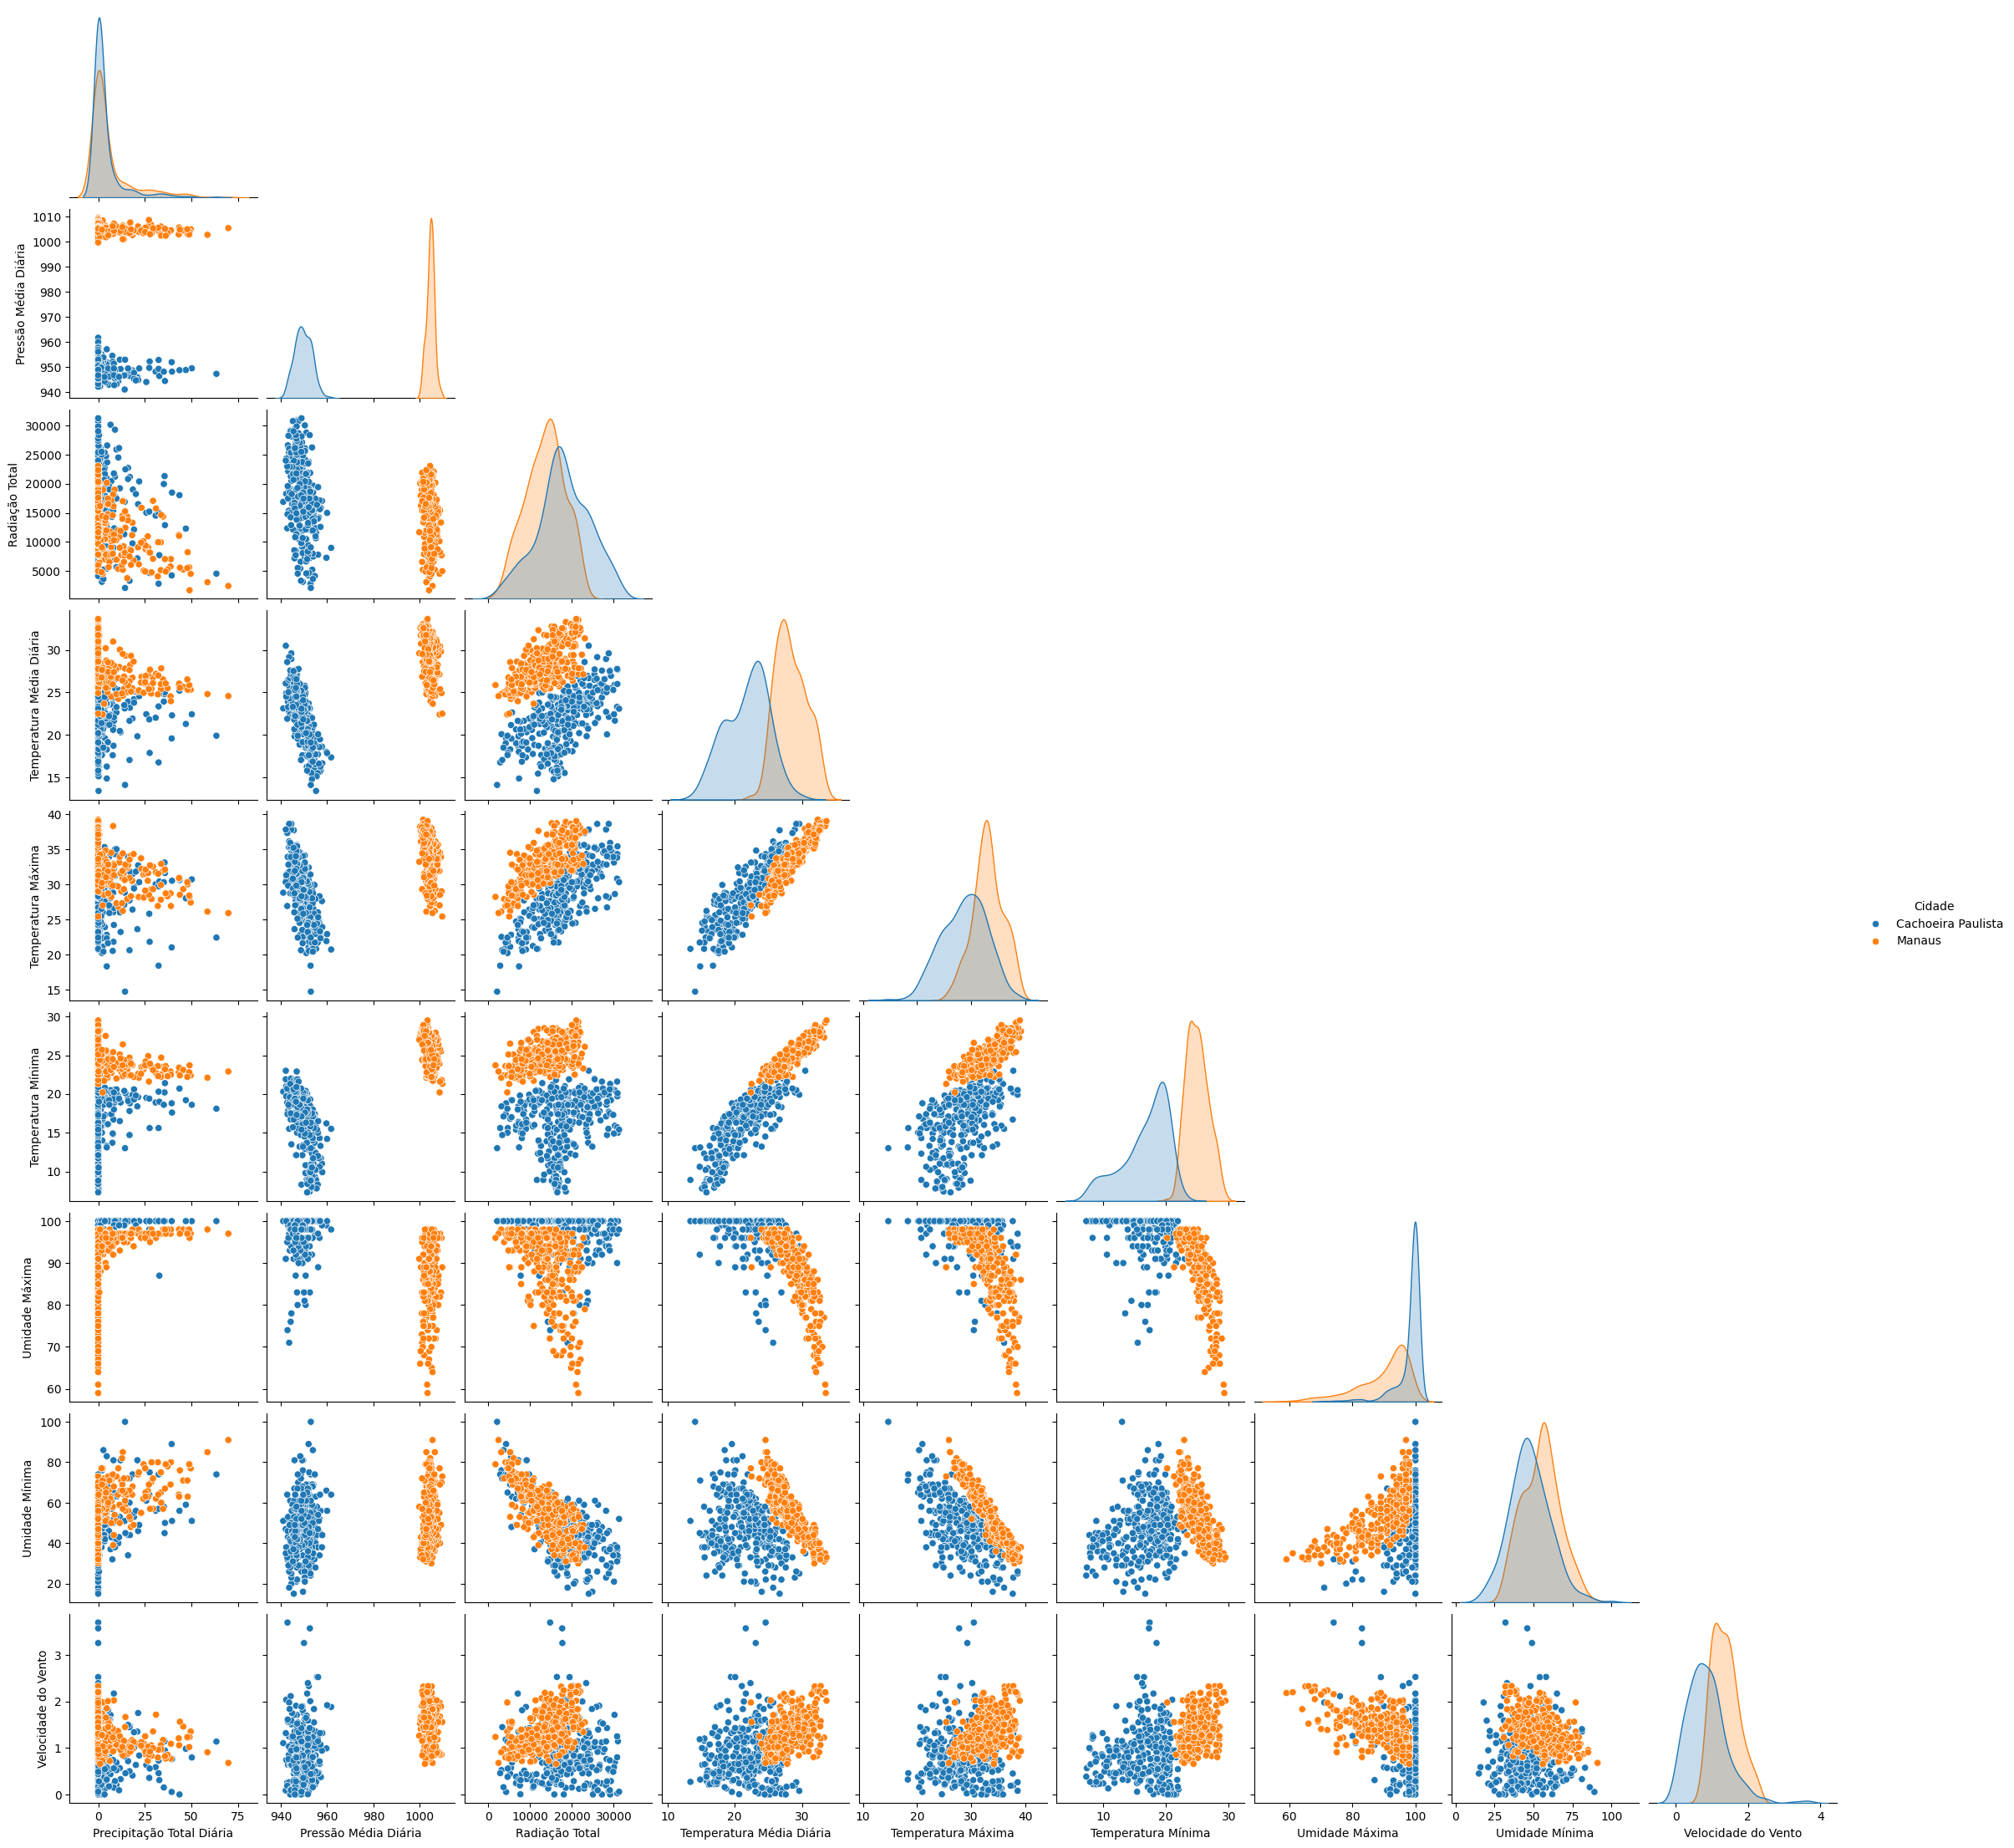

In [18]:
sns.pairplot( # Gráfico sns pairplot
              df_visu, # Utilizar os dados de df_visu
              hue='Cidade', # A cor dos pontos é dado pela cidade
              corner=True) # Desenha apenas um lado do gráfico
plt.show()

Os principais gráficos de interesses são os da diagonal. Como são gráficos _KDE_, a área preenchida corresponde diretamente à quantidade de pontos. Então, as menores áreas de intersecção serão as melhores para separar no modelo.  
Os melhores grupos seriam agrupações por, por exemplo, a `Temperatura Mínima` e `Pressão Média Diária` Já os piores seriam `Precipitação Total Diária` e `Umidade Mínima`. Porém, todos tem certa sobreposição, de forma que não se pode usar apenas um para defenir as classes.    
No contexto de *Machine Learning*, estas colunas usadas para predição são chamadas de *features*. Esta nomenclatura será utilizada pelo resto do curso.

---
Pode-se, também, remover alguns destas colunas. Normalmente, quanto mais dados melhor o resultado; porém, pode-se ter problemas como *overfitting*, aumentar significativamente o tempo de treino e o custo computacional do modelo, assim como outros. Assim, é de interesse a remoção das *features* menos úteis.  
Por enquanto, devido ao tamanho pequeno do dataset, vamos deixa-lo com todas *features* intactas por enquanto. Depois, será modificado e sua performance comparada.

## Sweetviz

Outra biblioteca de fácil uso para visualização é a `sweetviz`. Ela providência relatórios, visualizações e análises primárias, que podem ser feitos com apenas uma linha de código.

Vamos usar do nome sv para importar:

In [21]:
import sweetviz as sv

A análise por `sweetviz` segue uma lógica simples de:
1. Salvar uma análise em uma variável;
2. Mostrar a análise.

Segue um exemplo genérico de código:


```
report = sv.analyze(df)
report.show_notebook() # Mostra a análise dentro do notebook (colab)
report.show_html() # Salva em um arquivo HTML
```



Há 3 tipos de análise, cada um com seu método próprio:
`.analyze()` , `.compare()`, `.compare_intra()`:

### Analyze
Analyze é um método utilizado para uma análise geral de uma `DataFrame`. Para nossas análises, apenas é necessário passar dois argumentos, ou apenas uma:


```
report = sv.analyze(df, "Coluna Objetivo")
```
Em que a "Coluna Objetivo" vai ser a coluna destacada na análise.
NOTE: Pode-se omitir a "Coluna Objetivo":



In [22]:
report = sv.analyze(df_visu) # Cria a análise sem a Coluna Objetiva
report.show_html() # Mostra a análise em um arquivo HTML

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


O arquivo fica salvo no próprio colab. É só clicar na aba ao lado.

Caso esteja seguindo de forma local, o arquivo vai ser salvo no mesmo caminho que o notebook.

Vamos então usar a coluna "Temperatura Mínima"
Dica: o argumemento `subset=[Lista_de_colunas]` de `.dropna()` especifica em quais colunas serão procurados NaNs.

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)



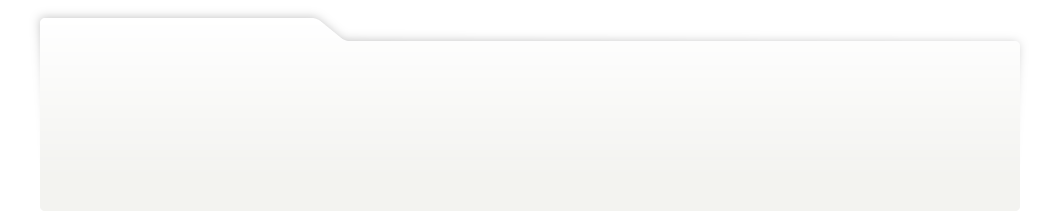
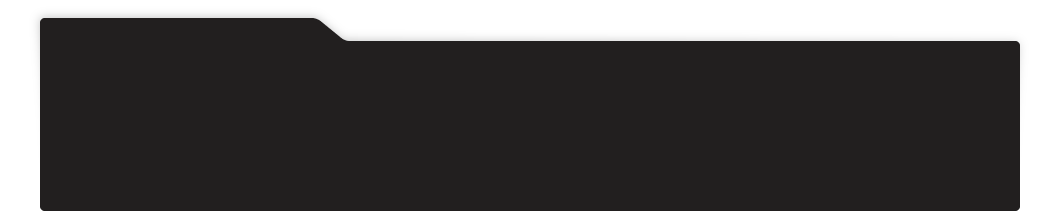
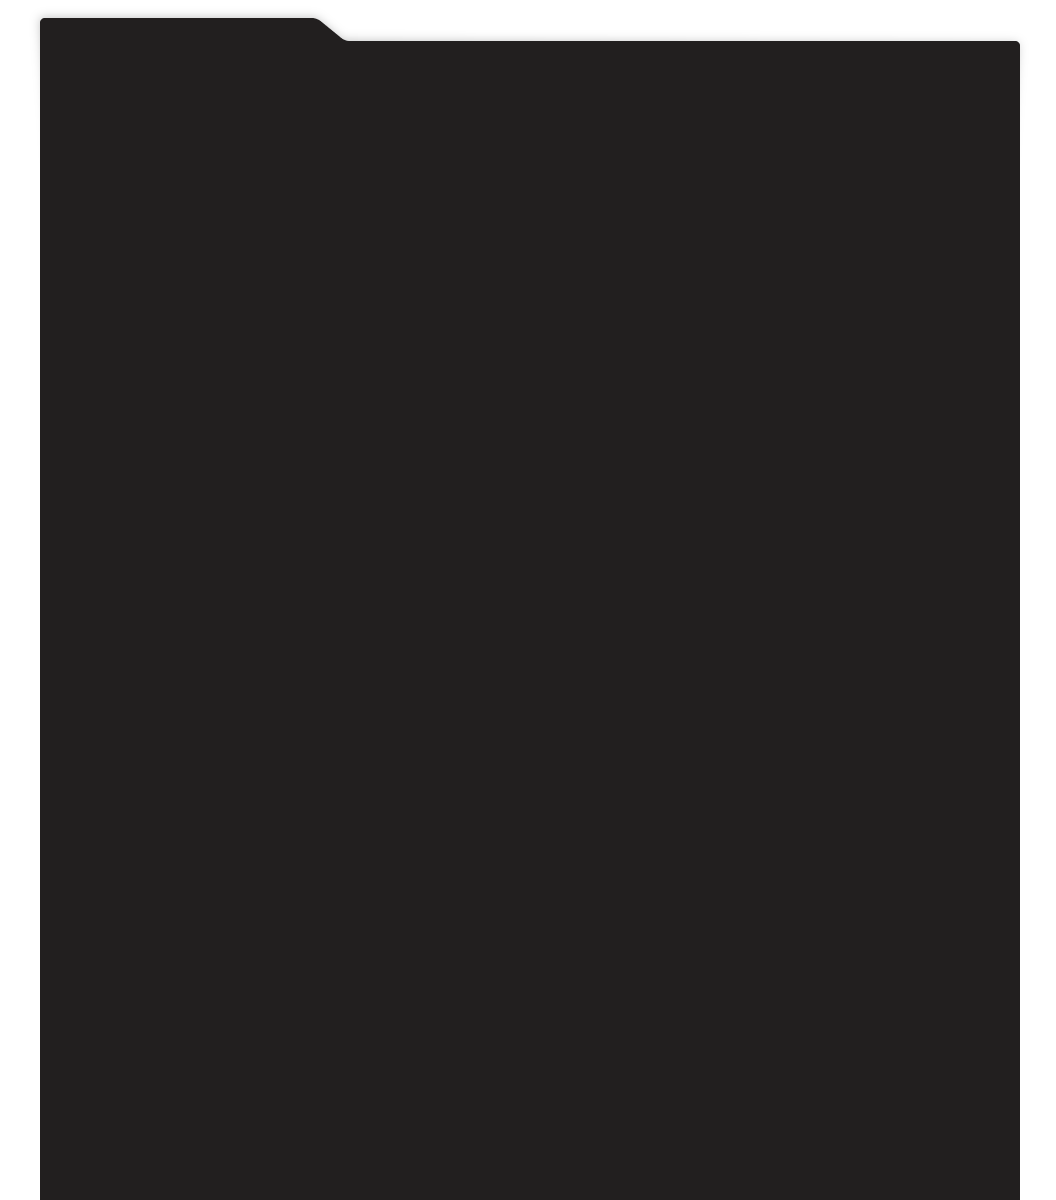
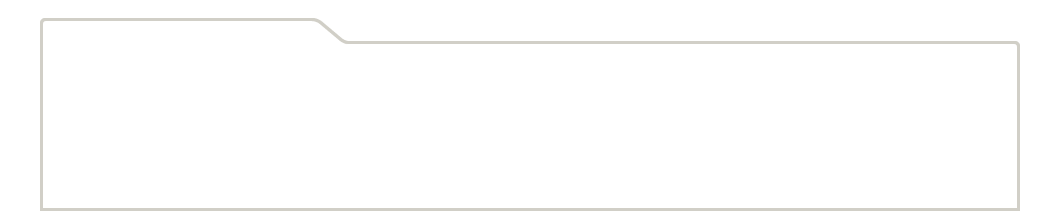
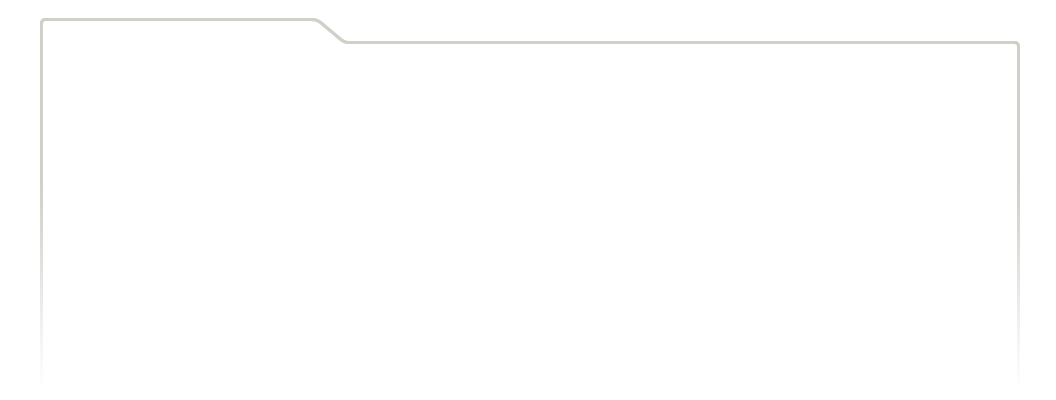
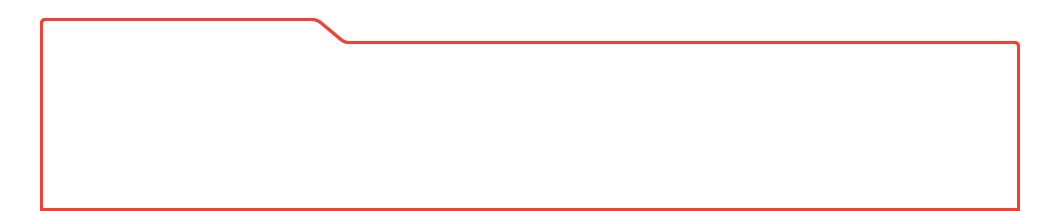
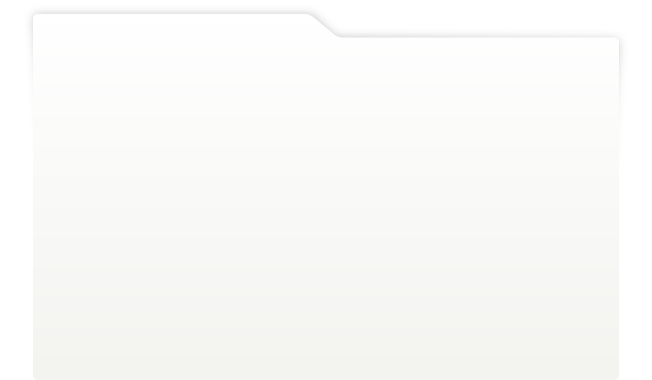
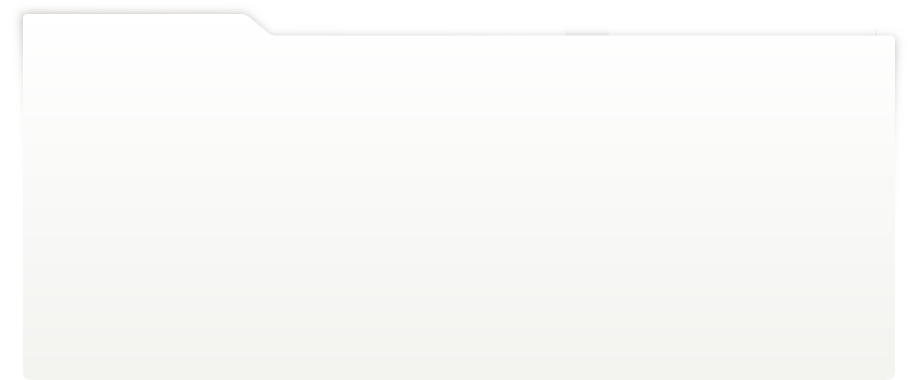
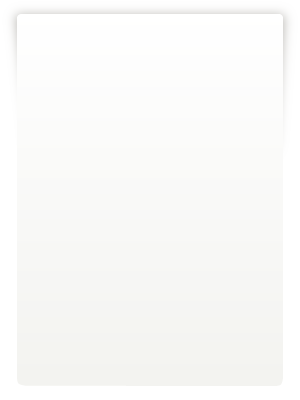
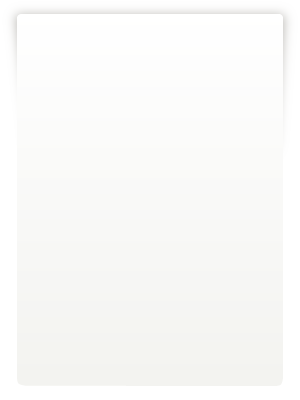
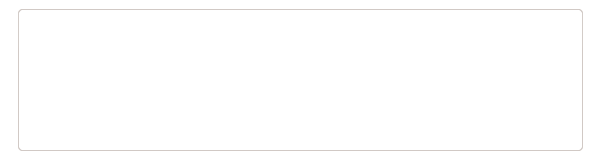
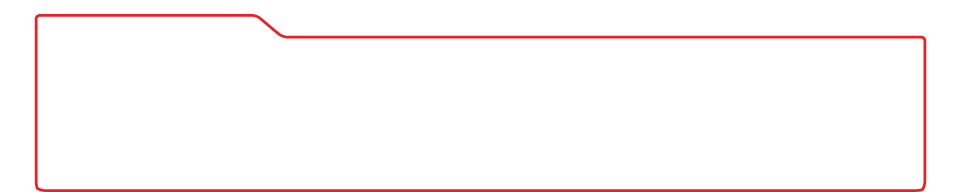
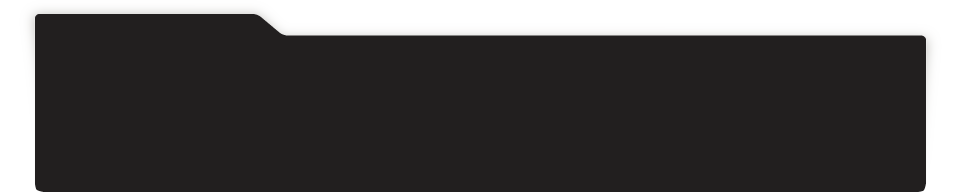
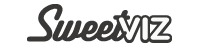
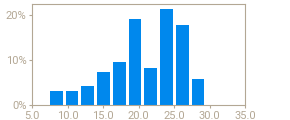
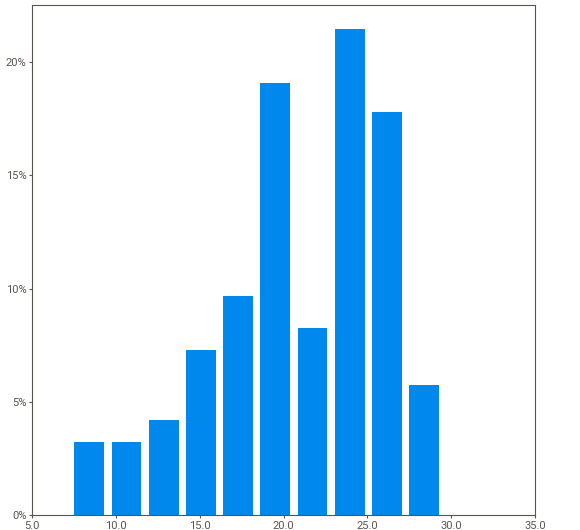
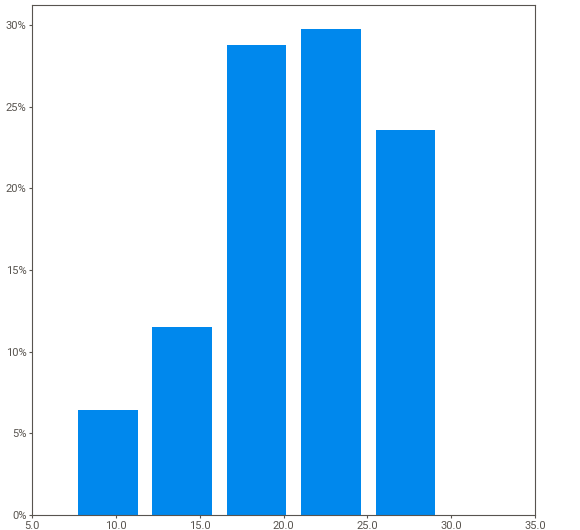
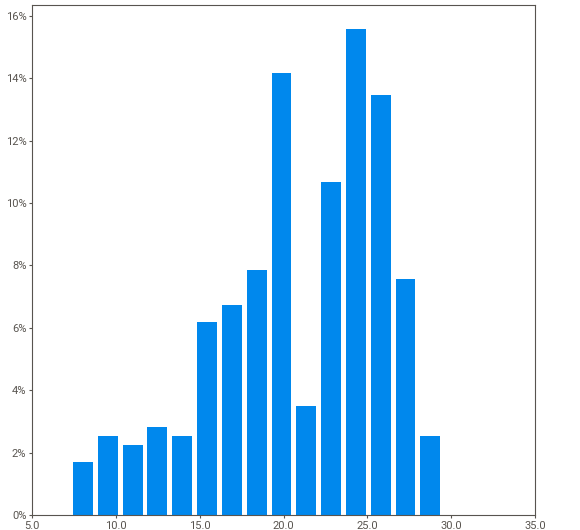
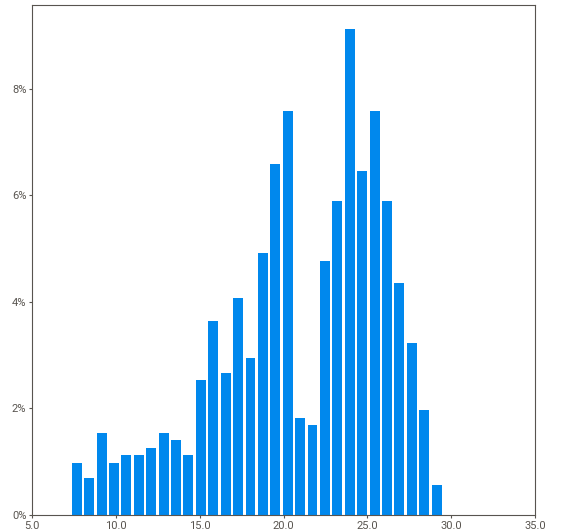
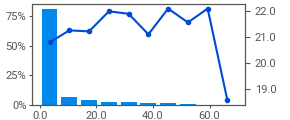
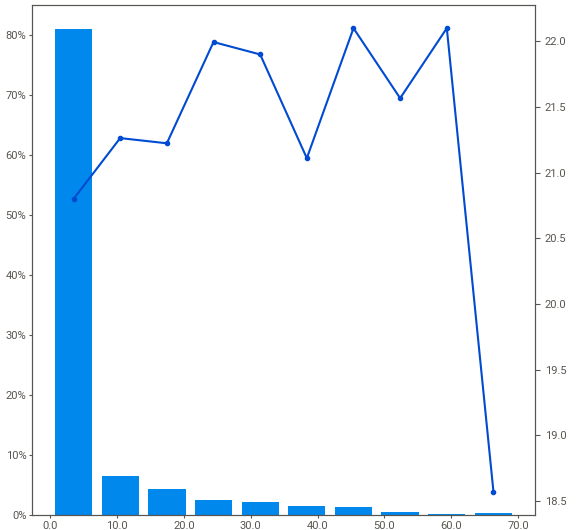
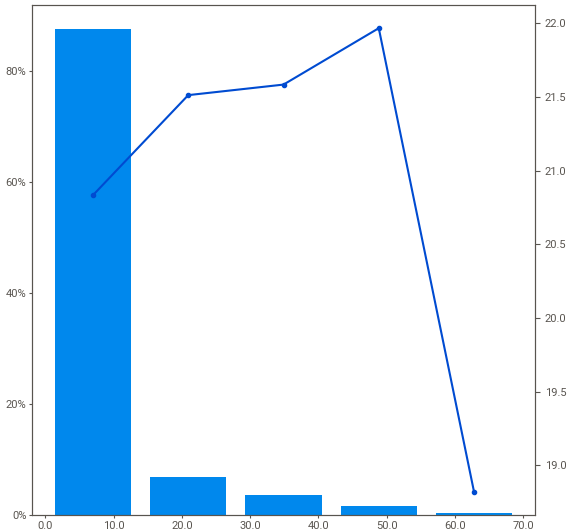
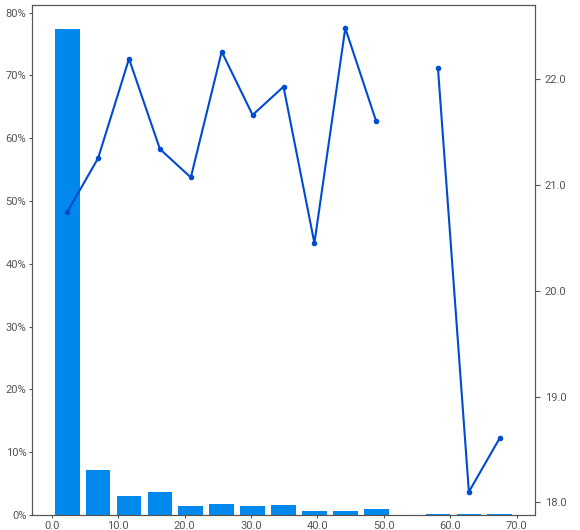
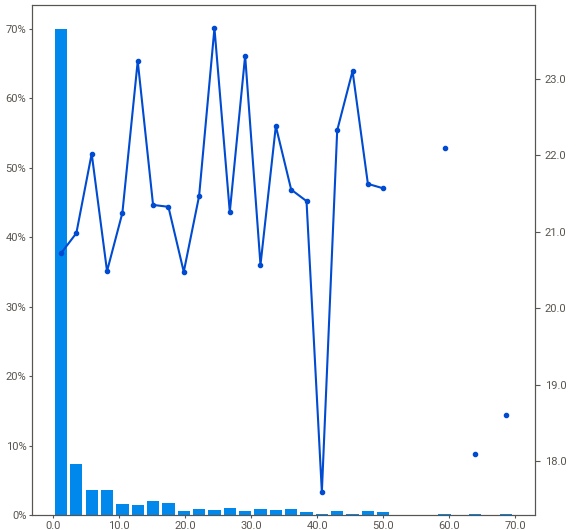
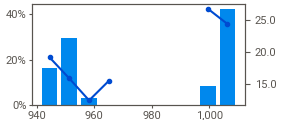
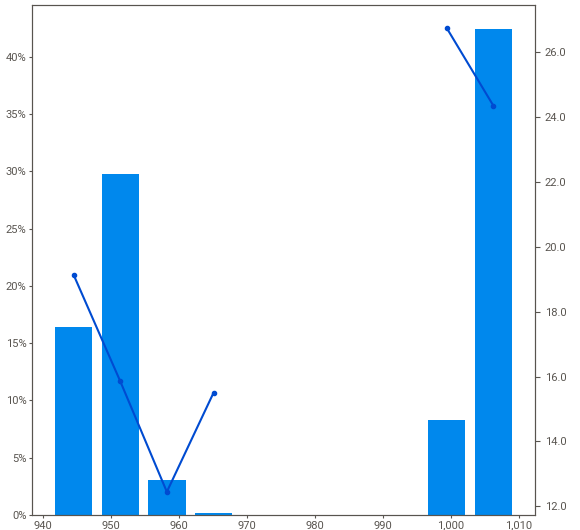
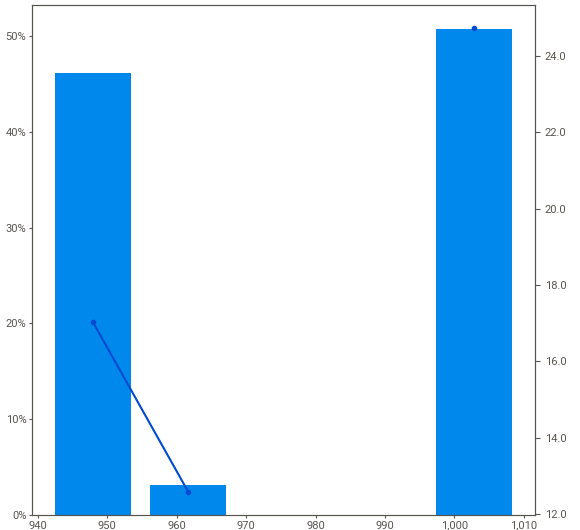
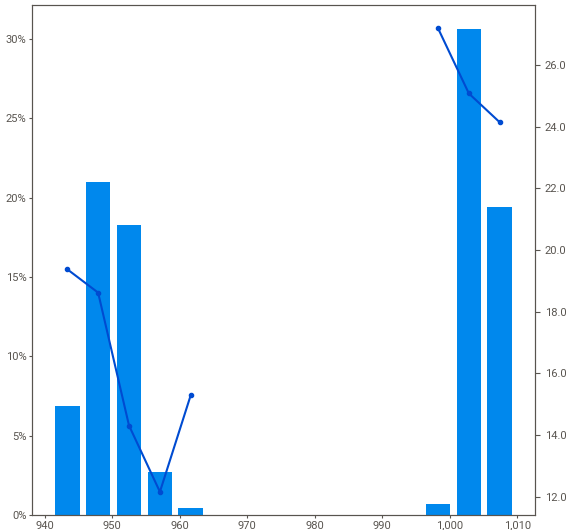
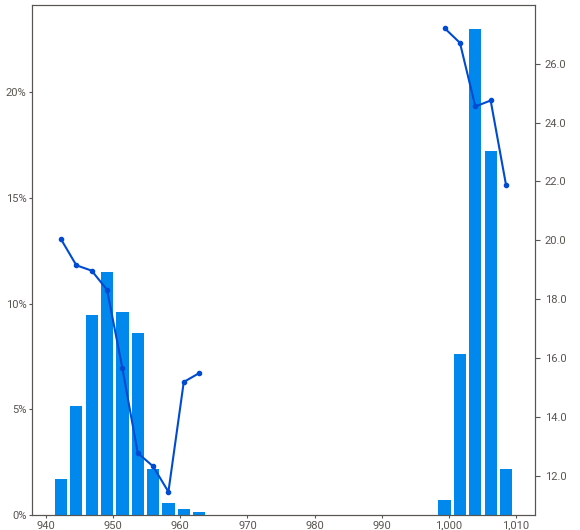
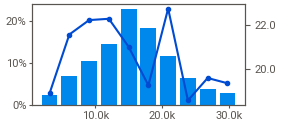
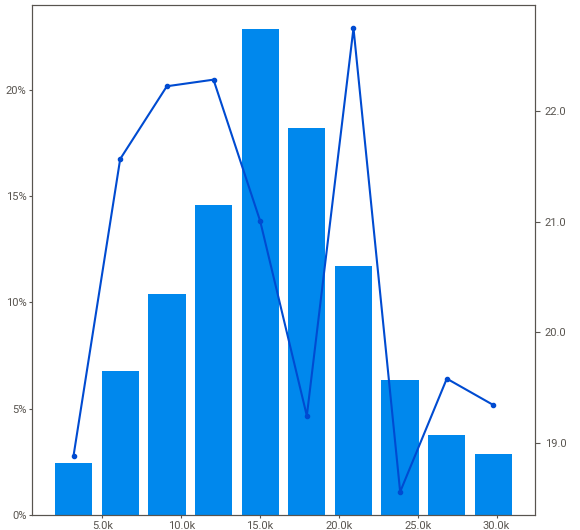
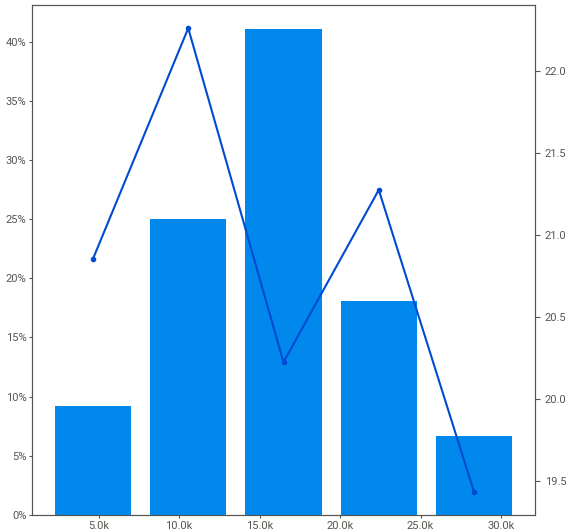
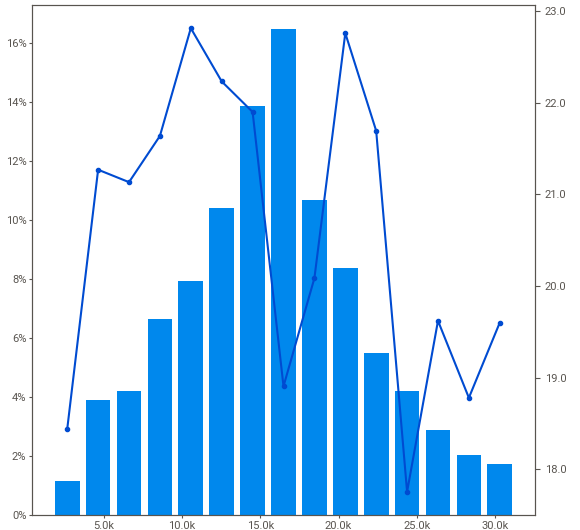
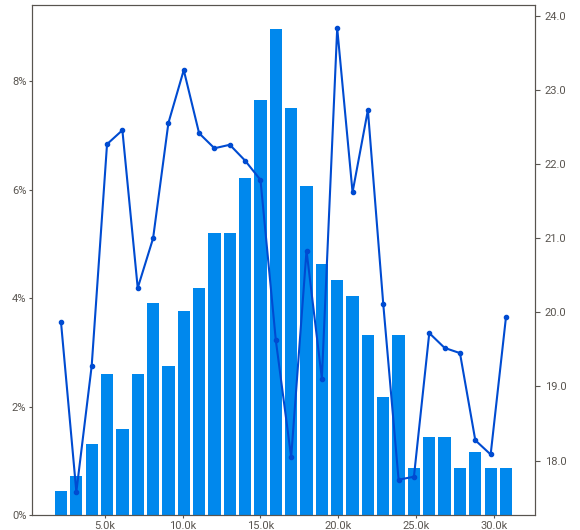
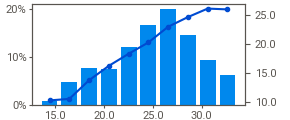
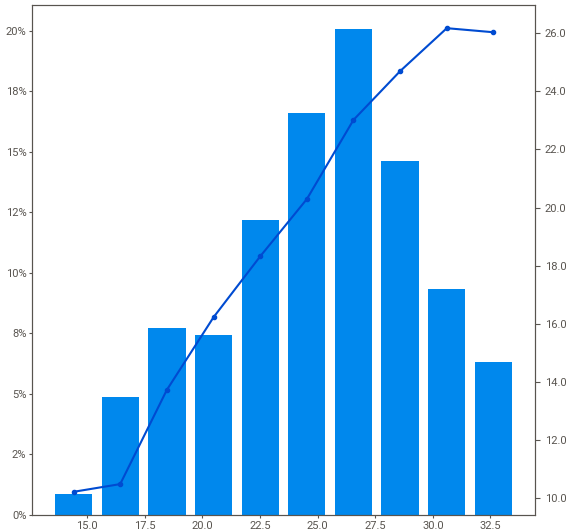
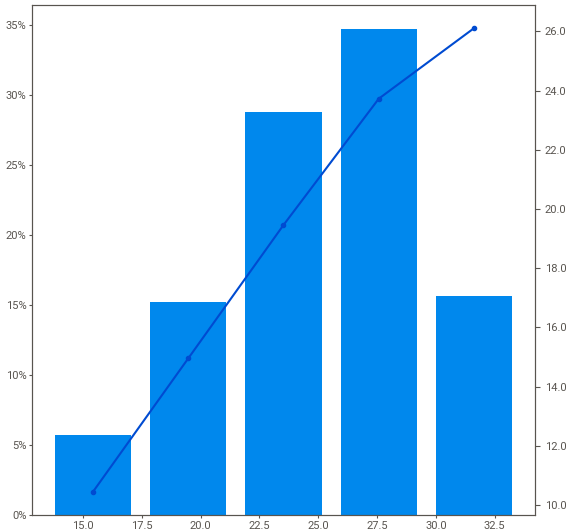
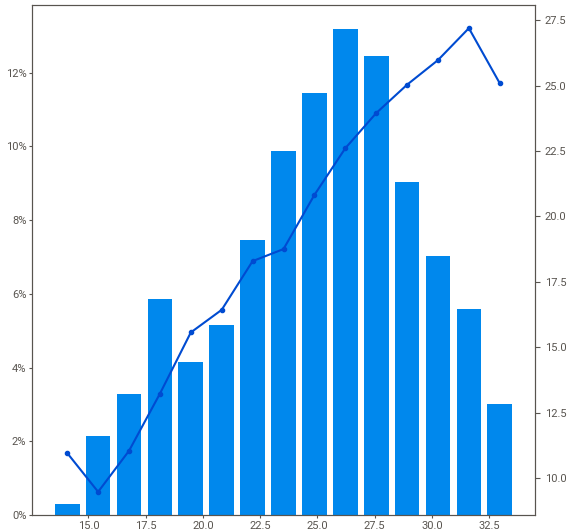
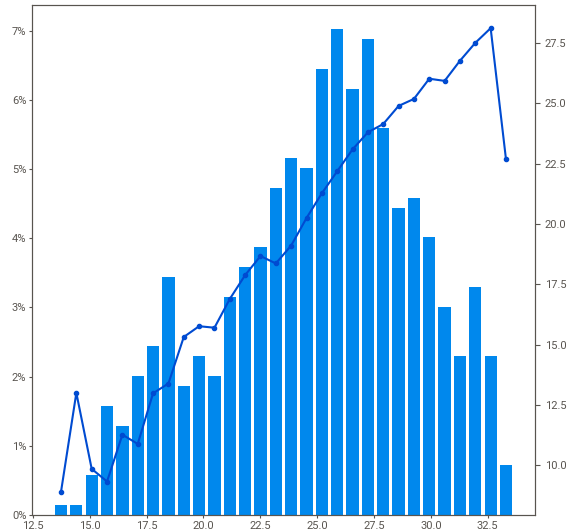
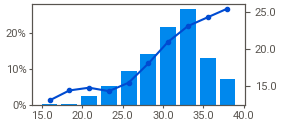
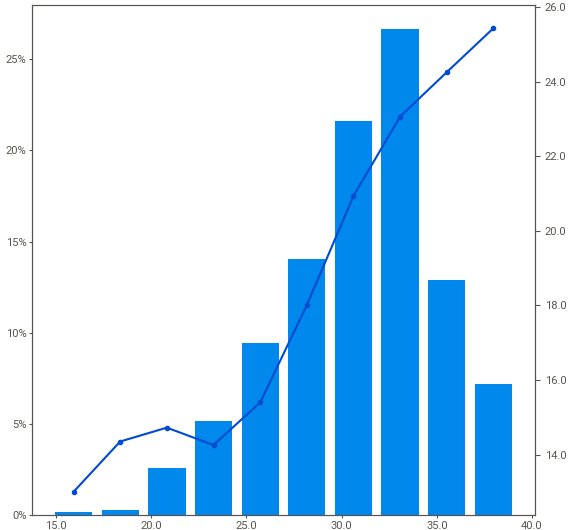
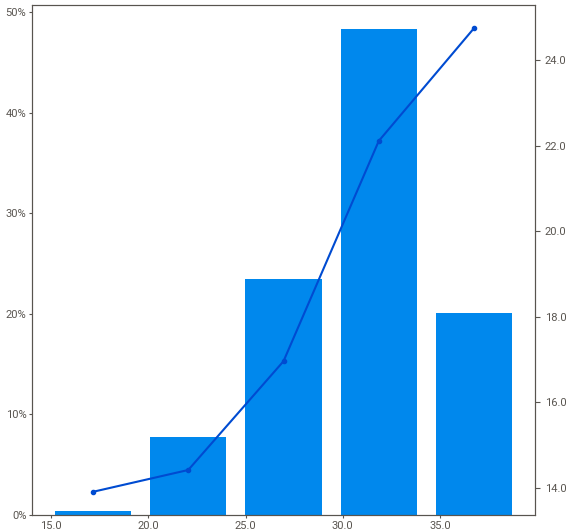
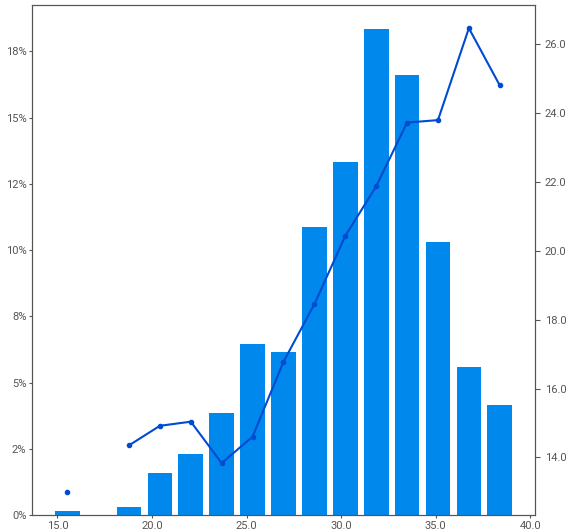
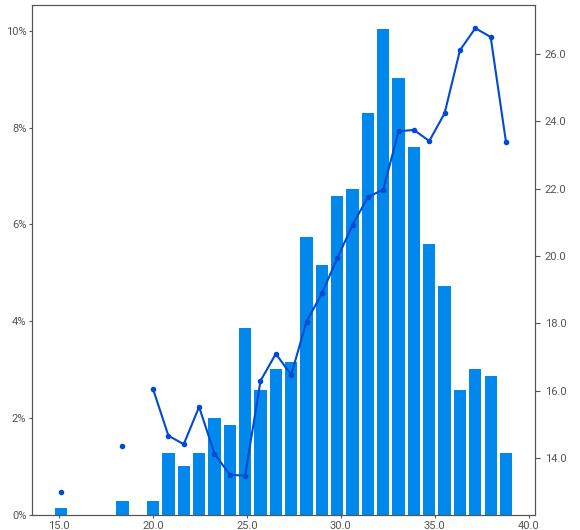
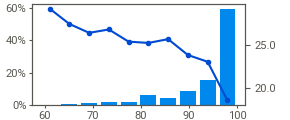
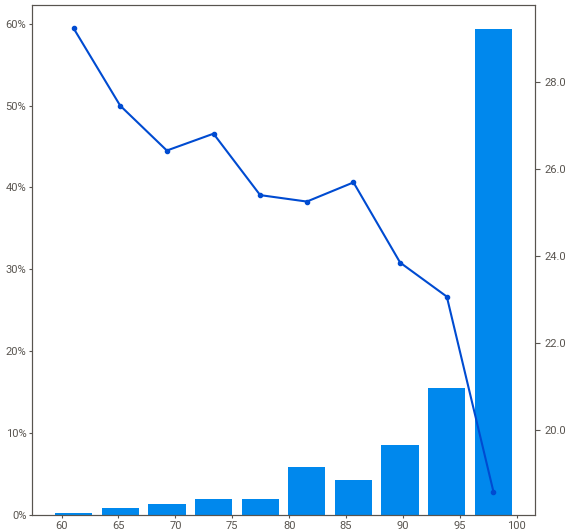
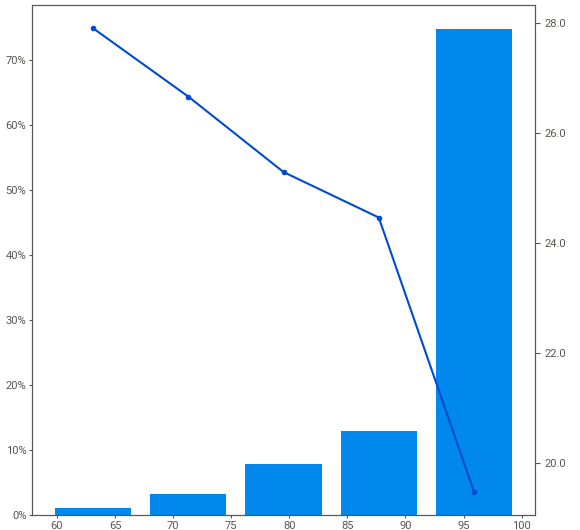
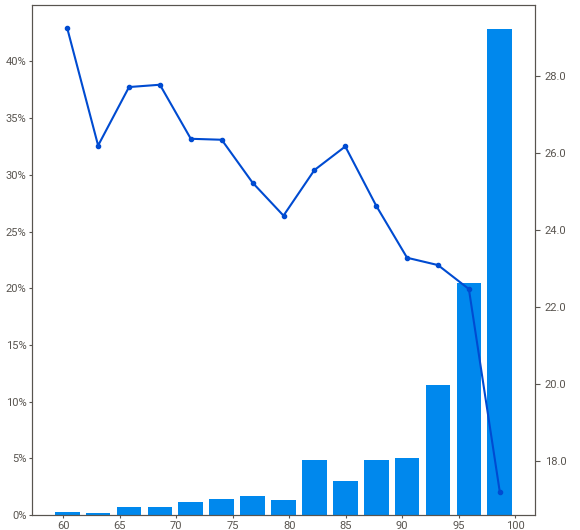
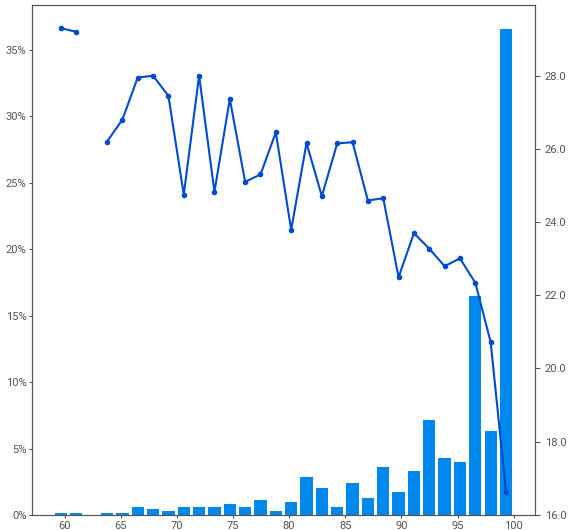
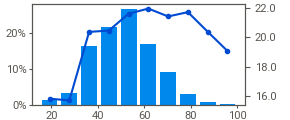
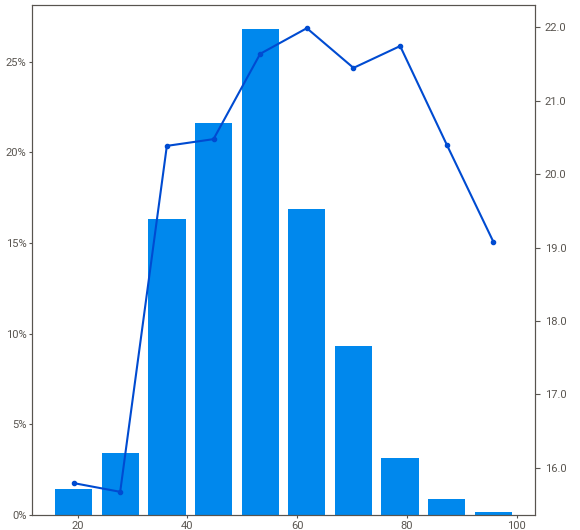
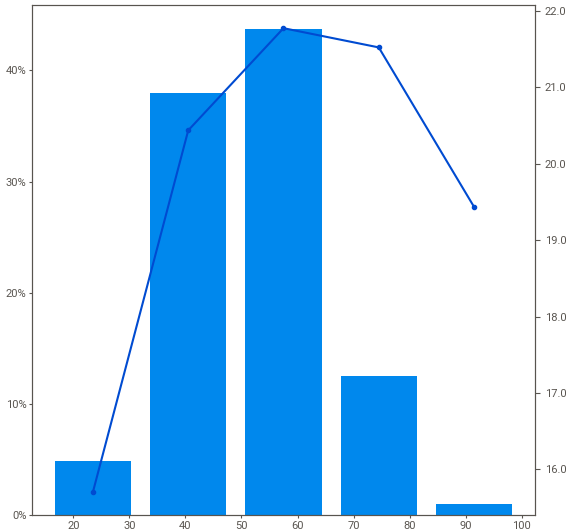
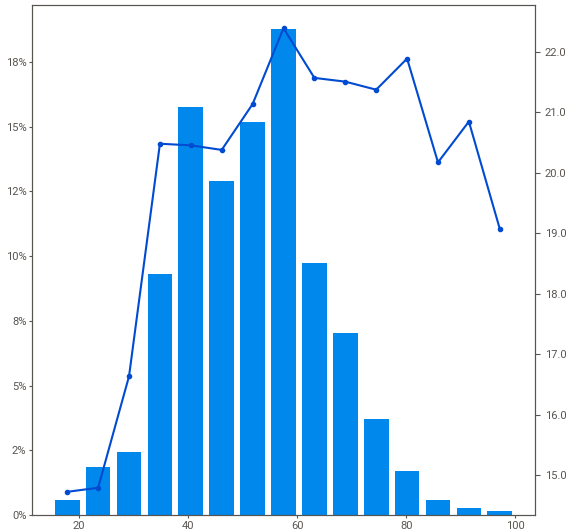
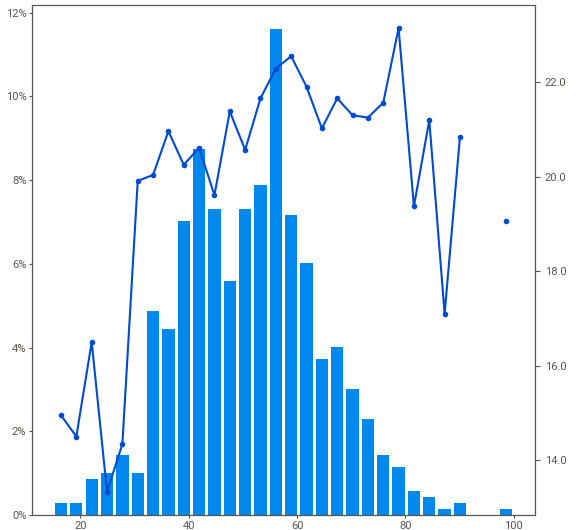
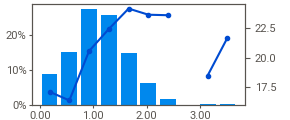
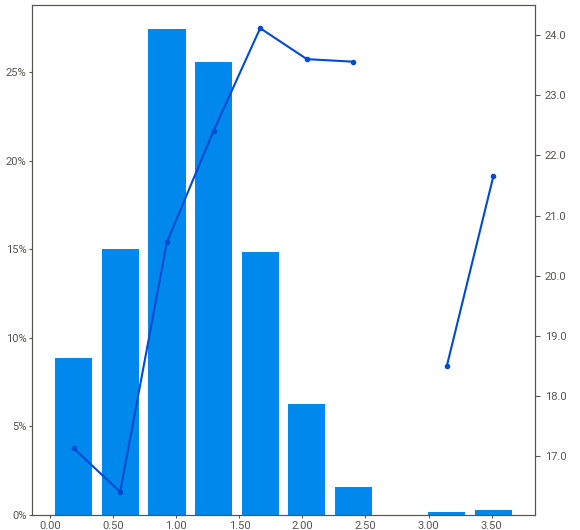
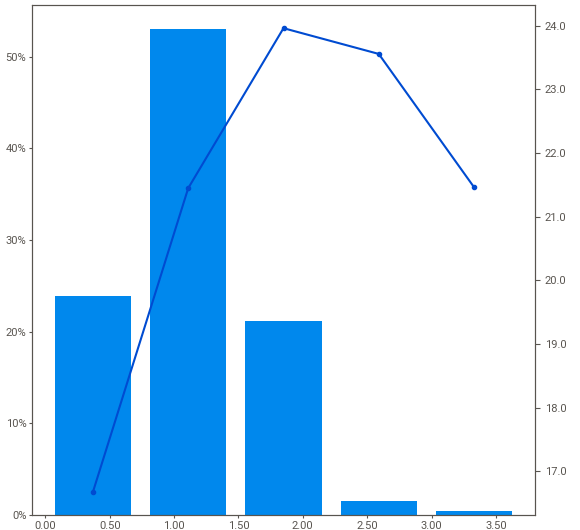
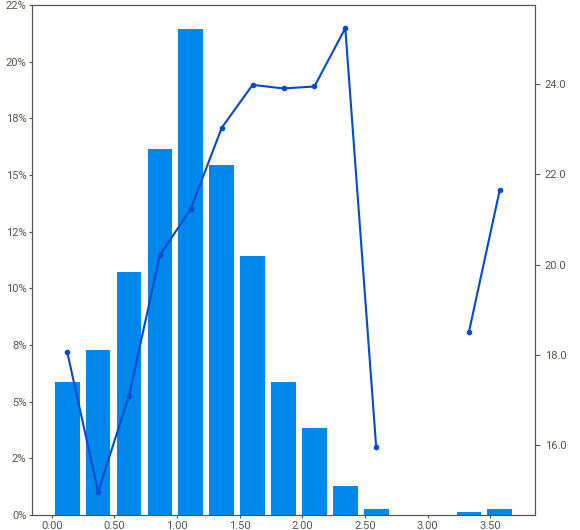
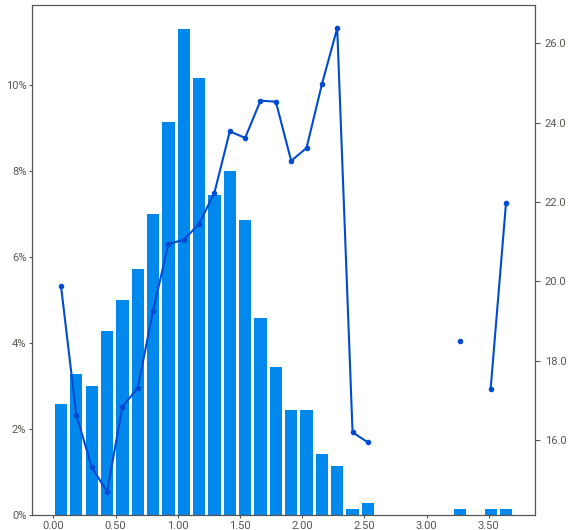
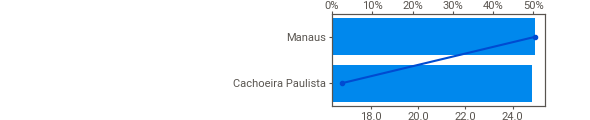
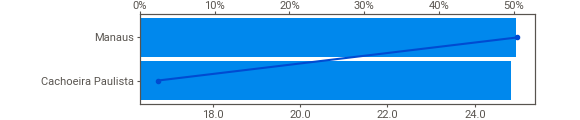
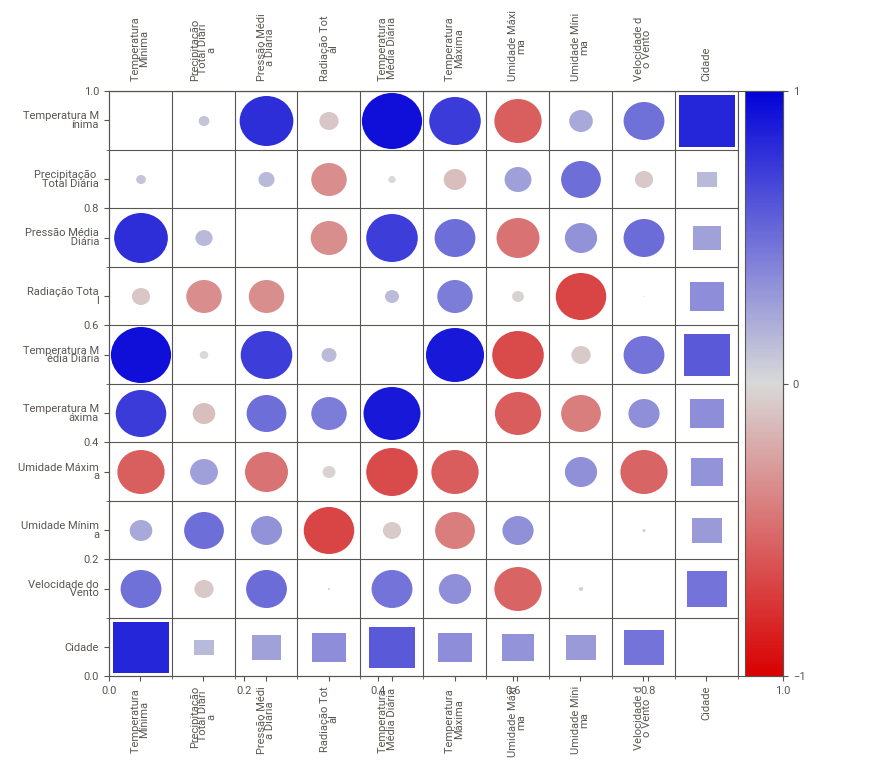
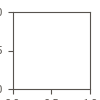

In [23]:
df_visu_1 = df_visu.dropna(subset=['Temperatura Mínima']) # Remove os NaNs apenas da coluna Temperatura Mínima

report = sv.analyze(df_visu_1, "Temperatura Mínima") # Cria a análise com a Coluna Objetiva
report.show_notebook() # Mostra a análise dentro do notebook

### Compare
A função `.compare()` é usada para comparar duas `DataFrames` separadas, comparando as colunas com mesmo nome.  
Seu uso básico é:


```
report = sv.compare([df1, "Nome para o DataFrame1"], [df2, "Nome para o Dataframe2"], "Coluna Objetivo")

```
O argumento "Coluna Objetivo" é a coluna que será destacada (no sentido de realçar), e pode ser omitido.


Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:01 -> (00:00 left)



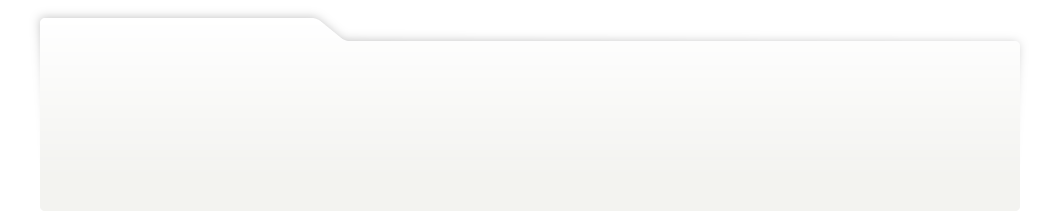
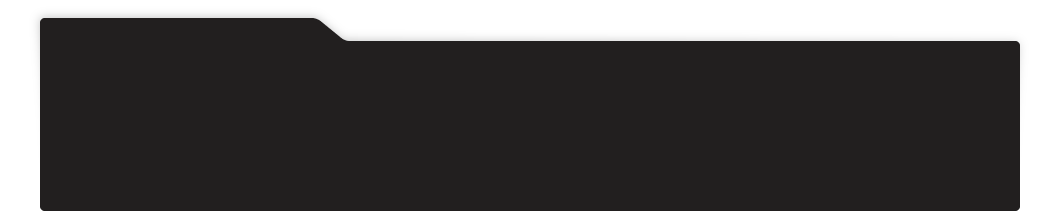
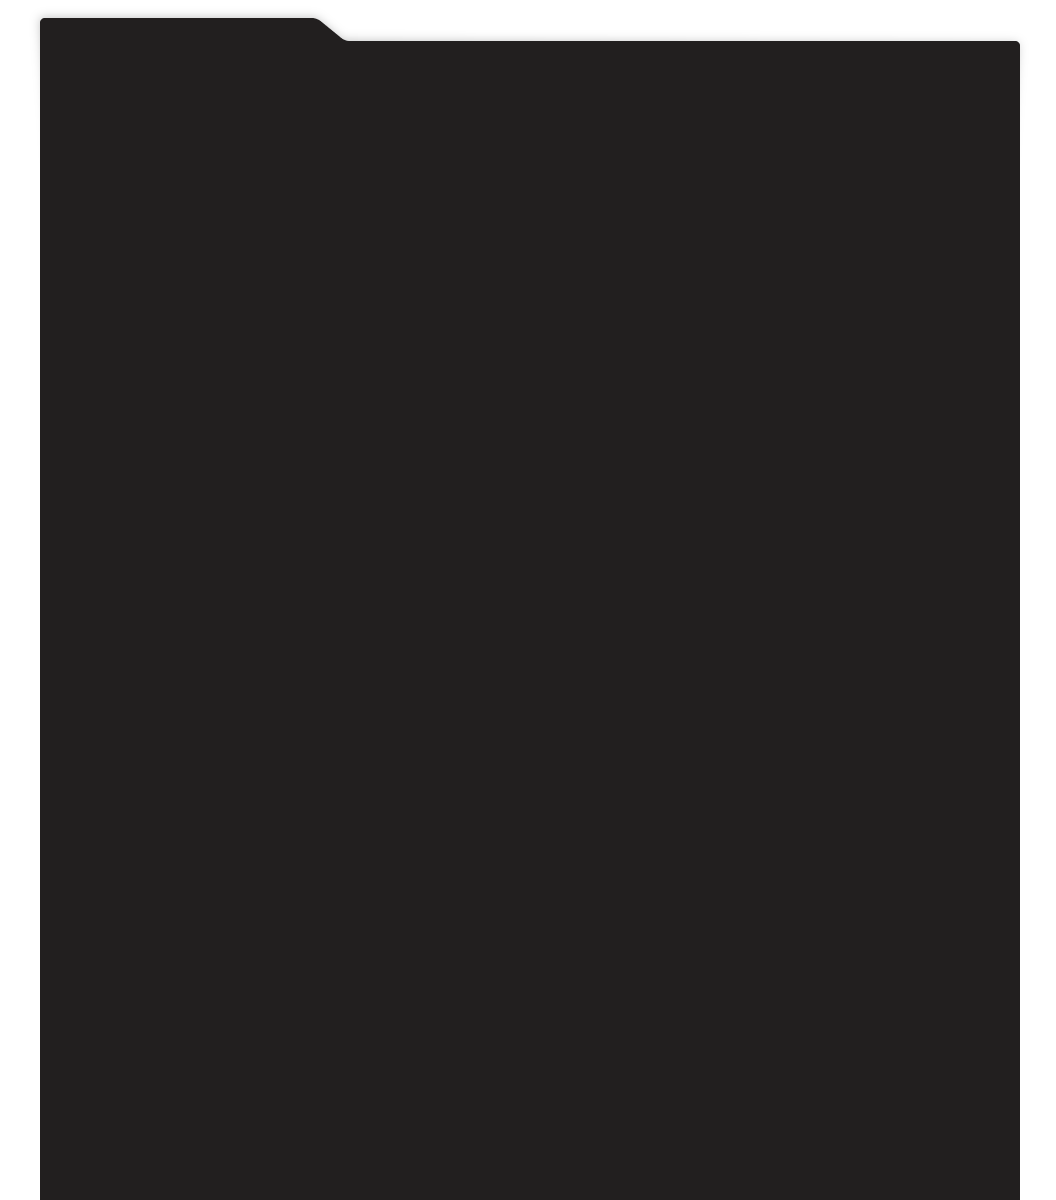
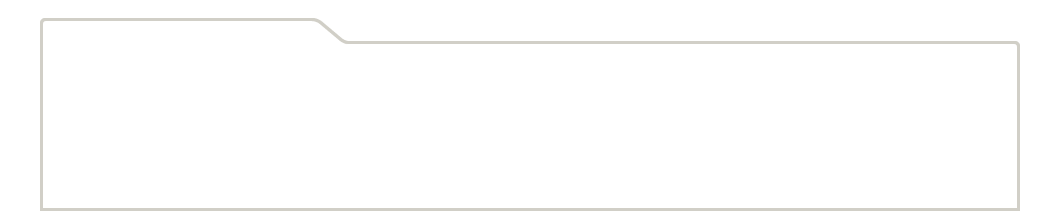
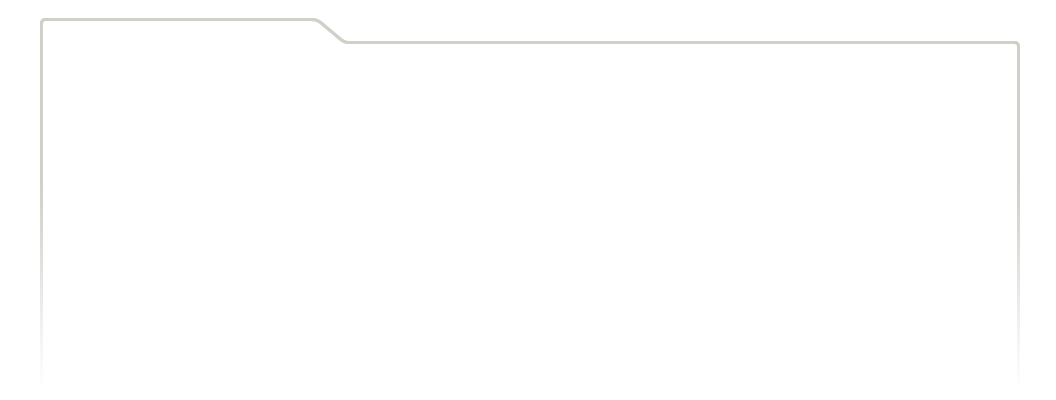
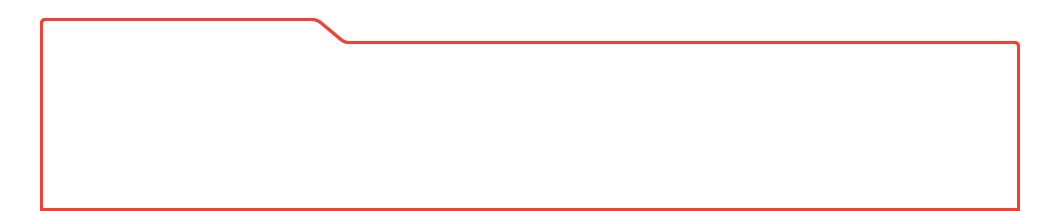
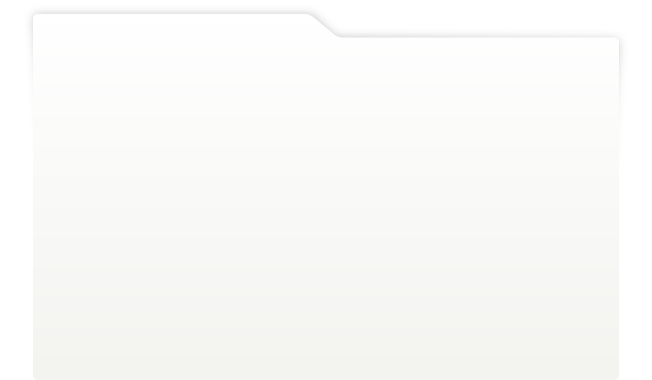
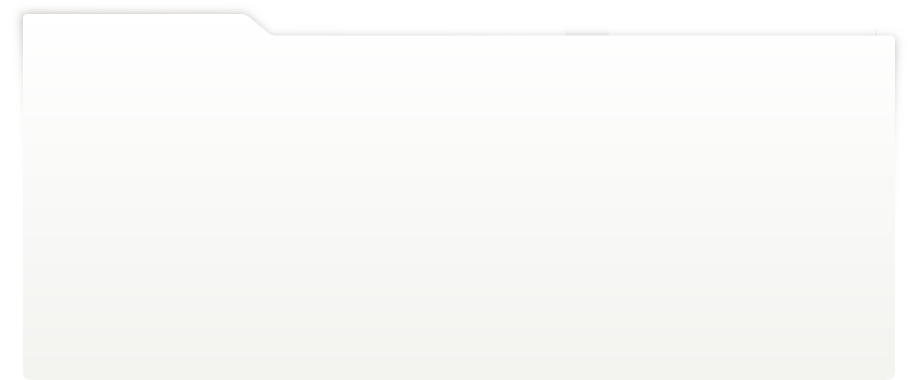
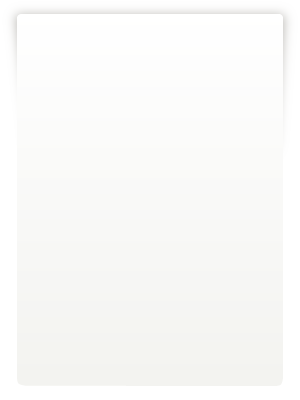
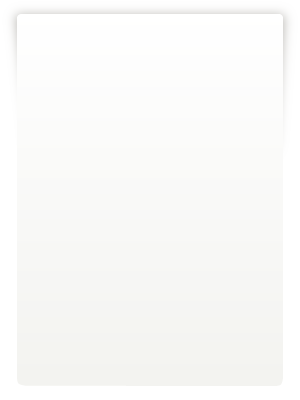
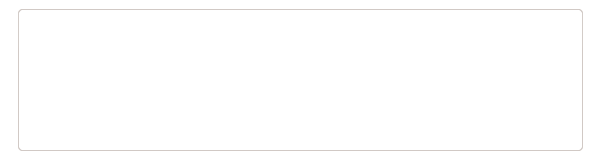
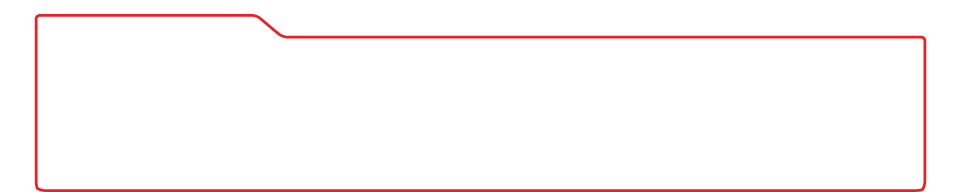
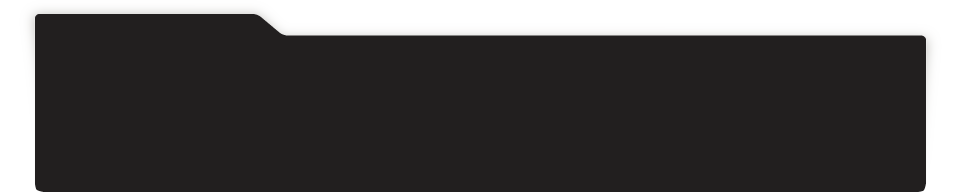
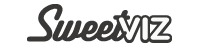
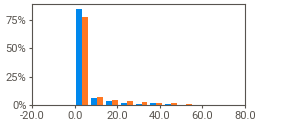
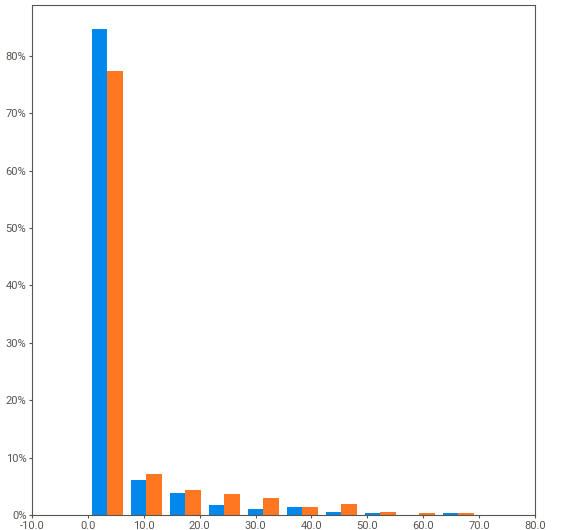
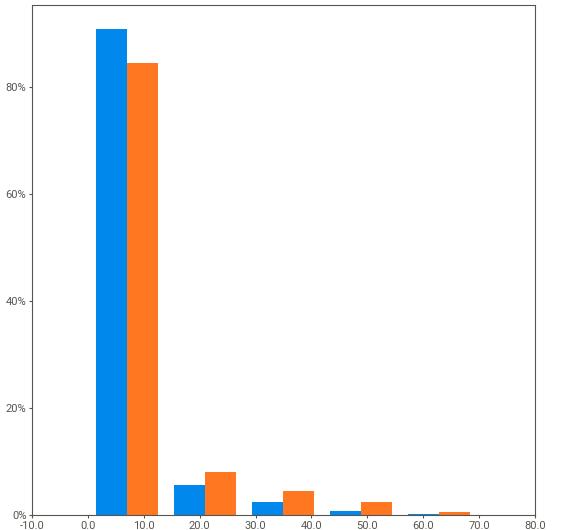
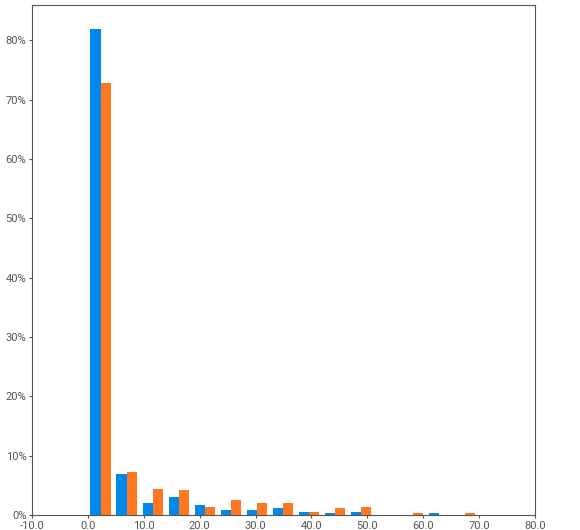
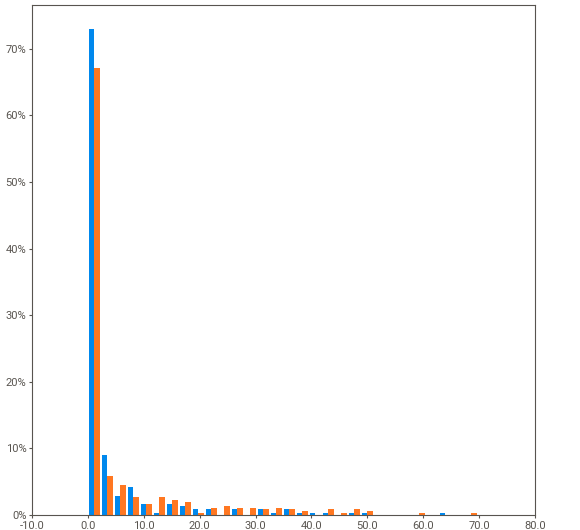
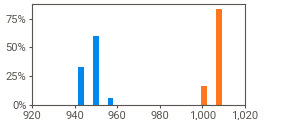
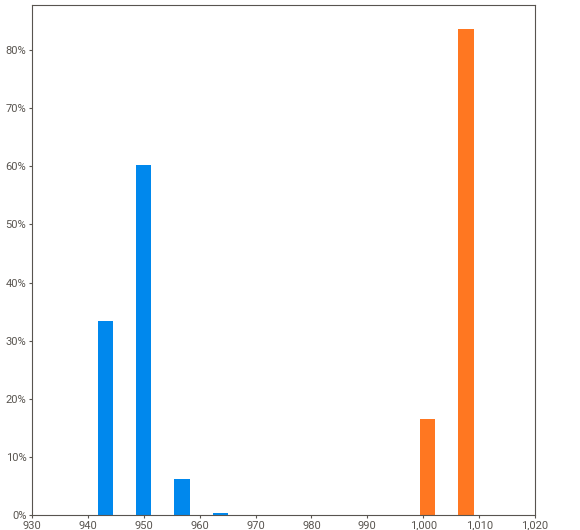
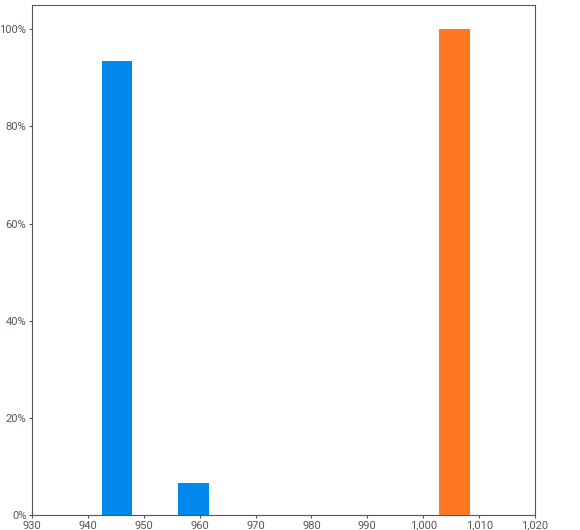
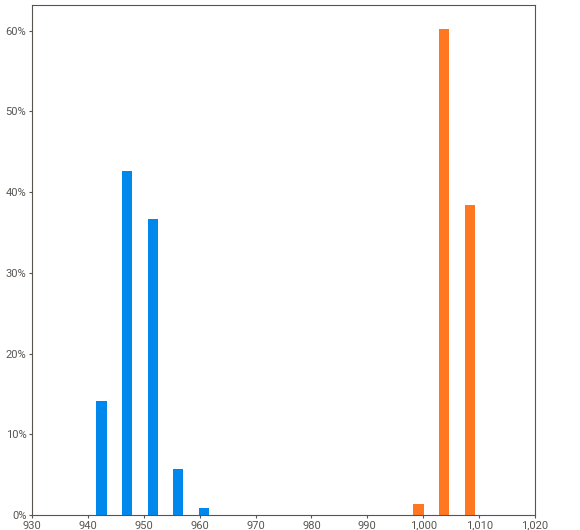
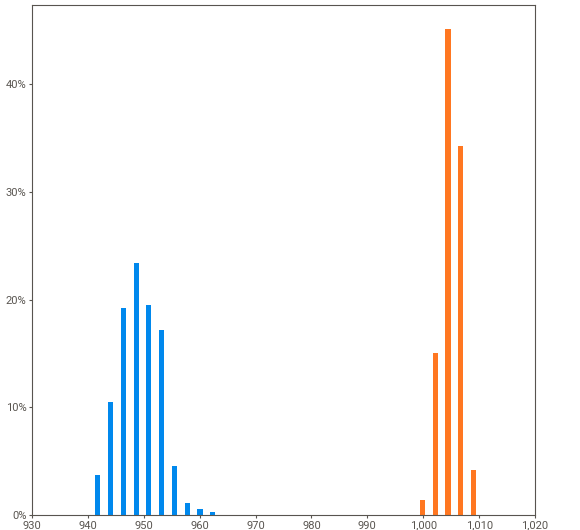
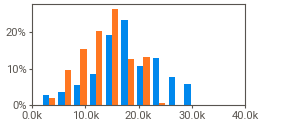
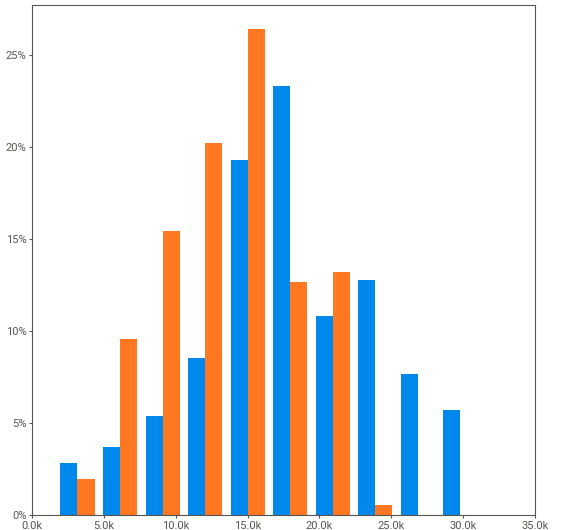
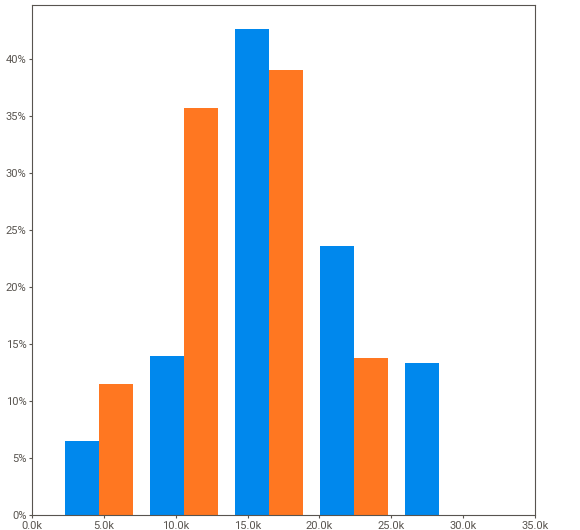
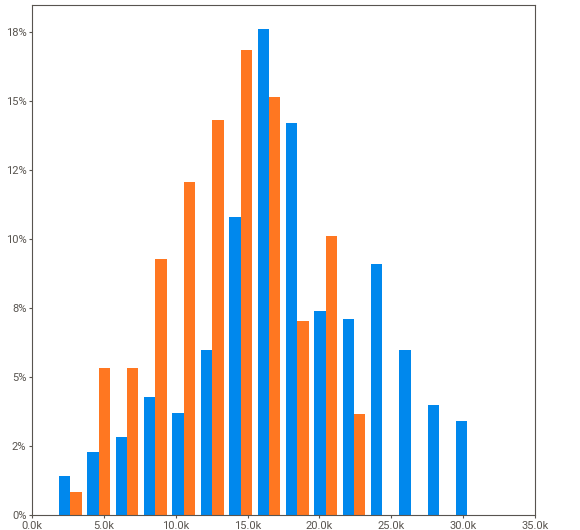
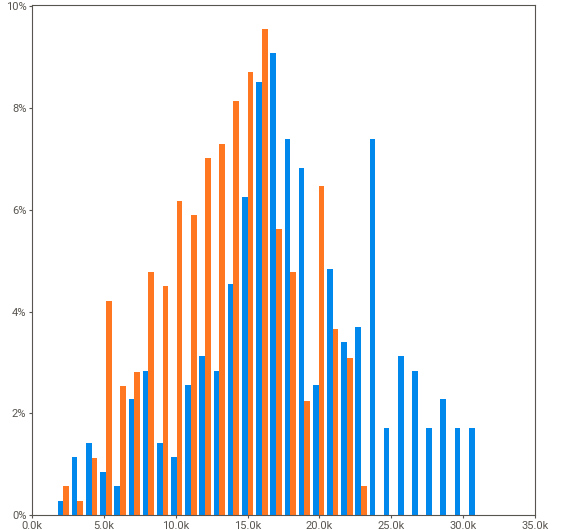
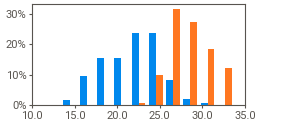
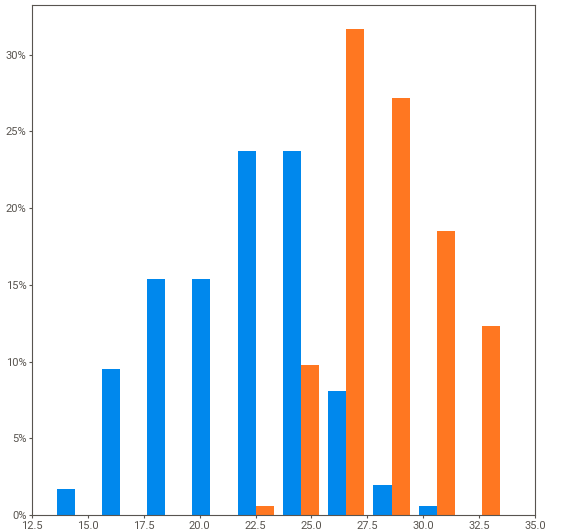
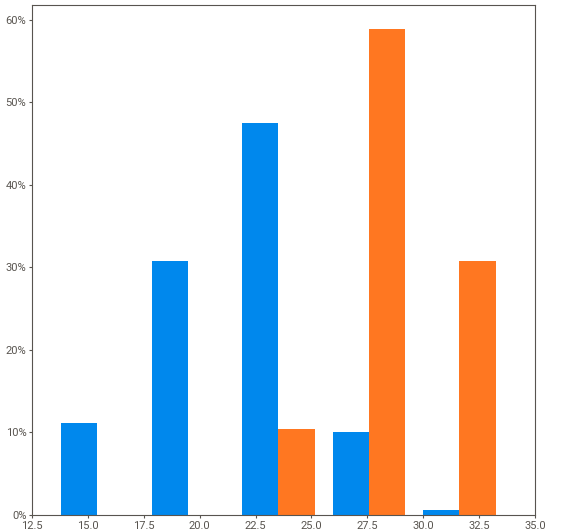
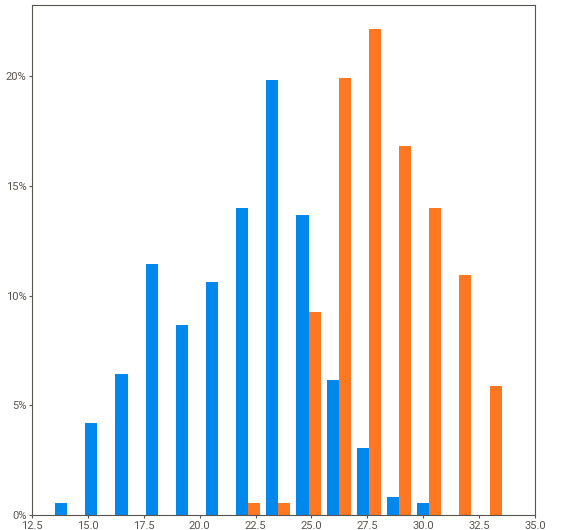
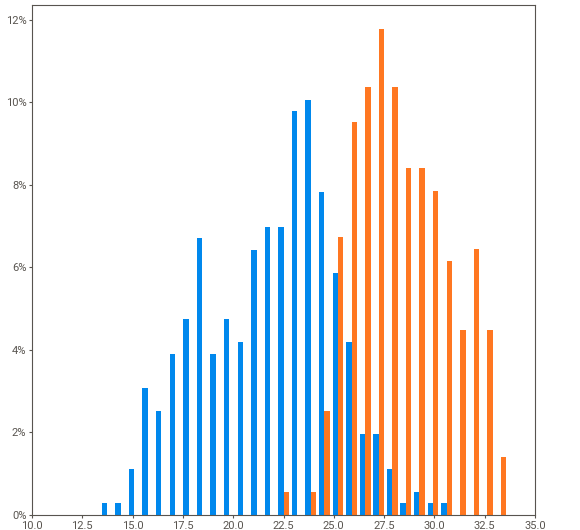
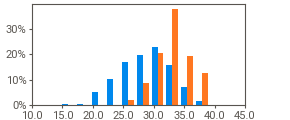
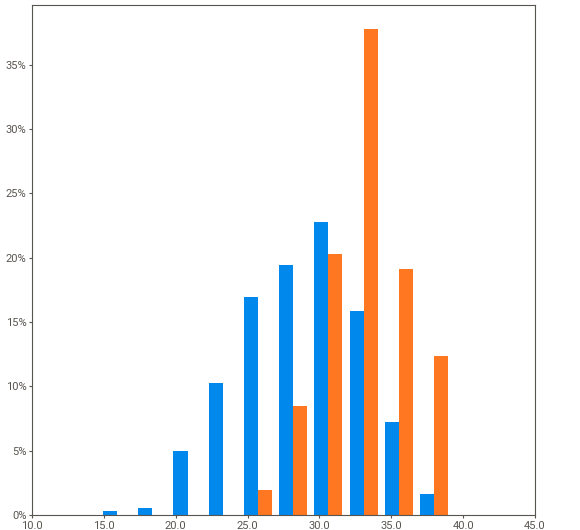
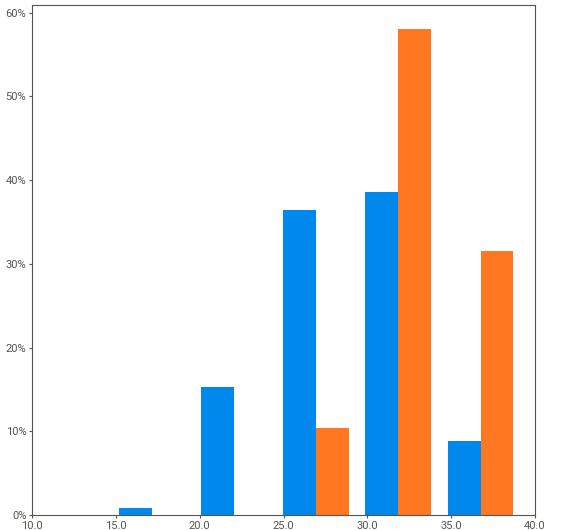
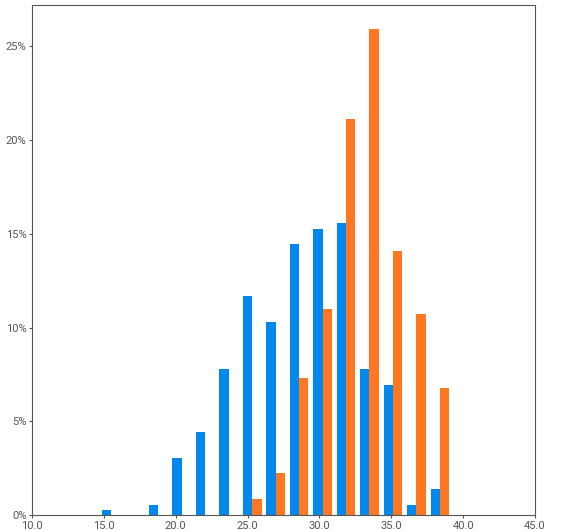
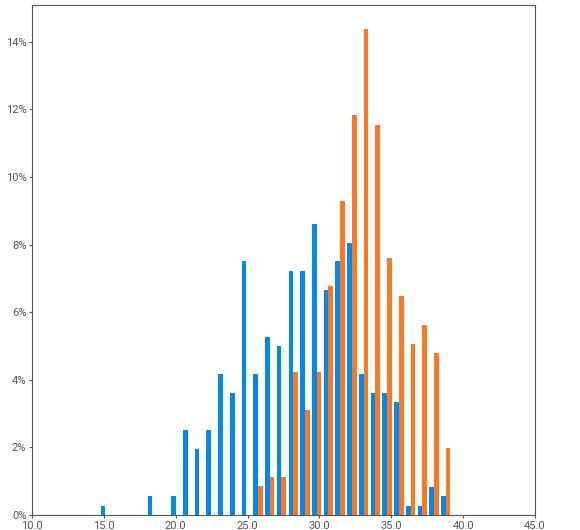
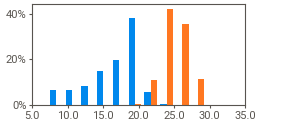
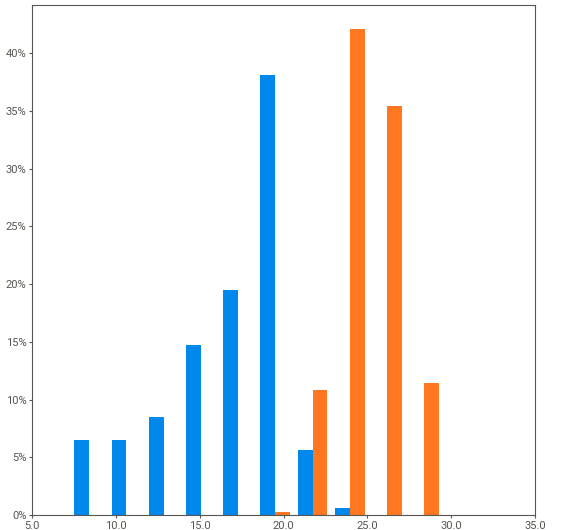
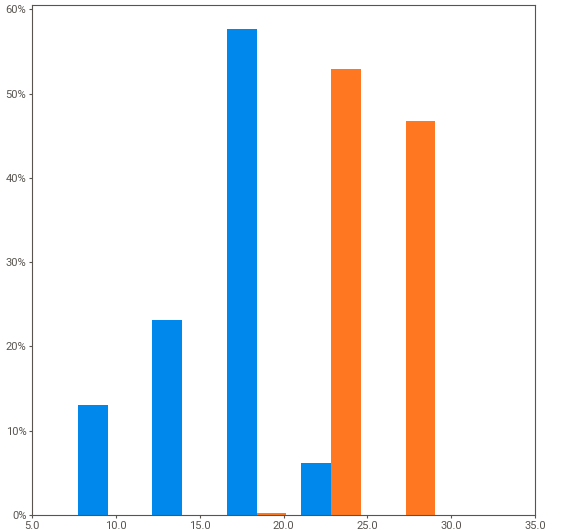
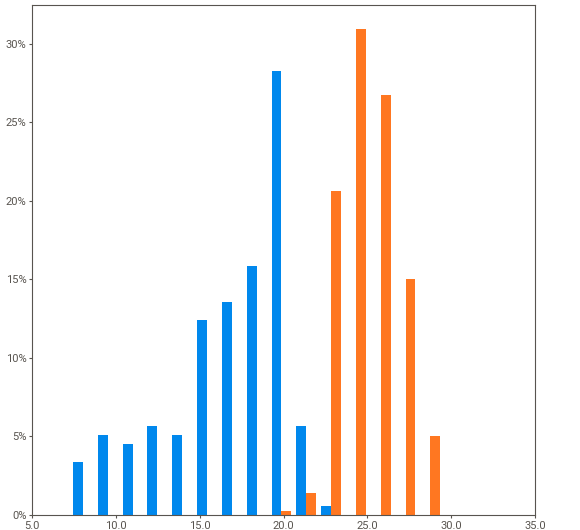
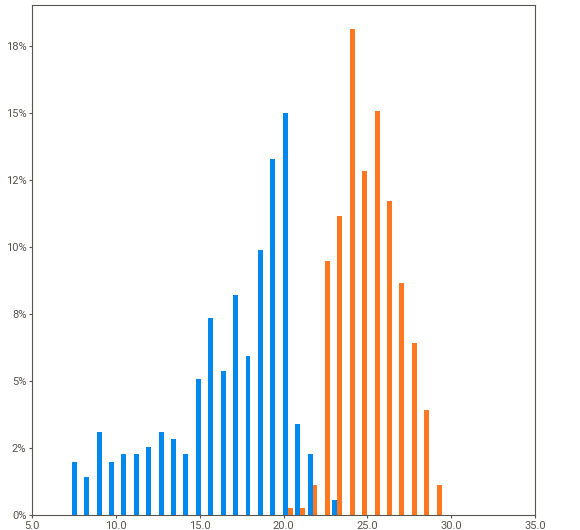
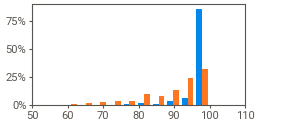
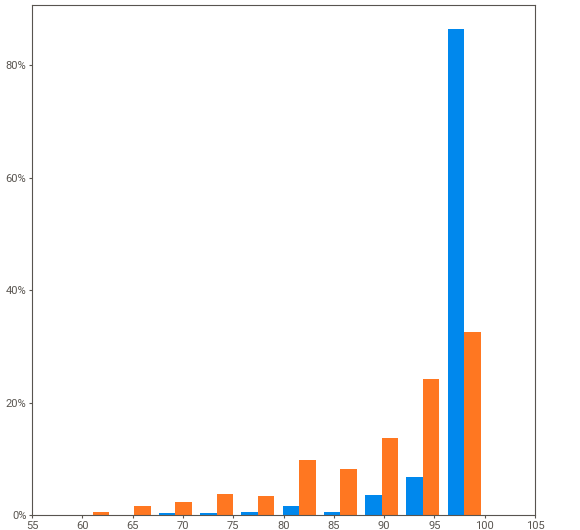
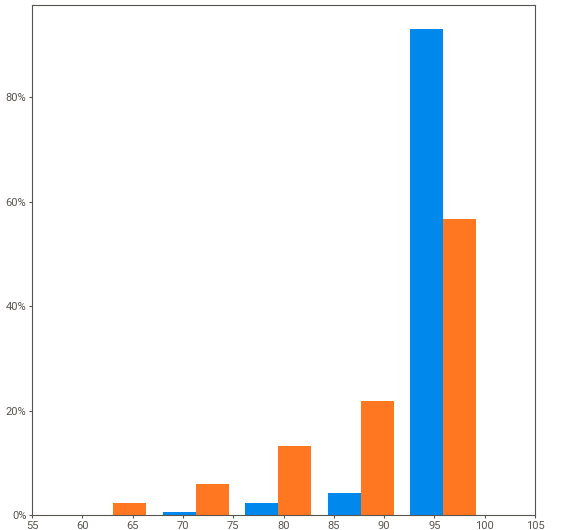
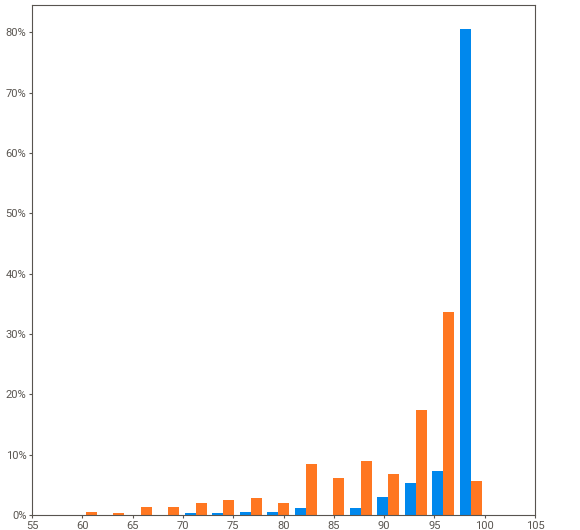
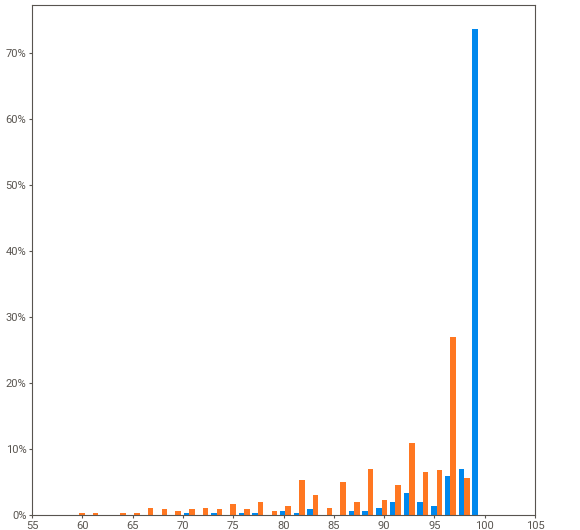
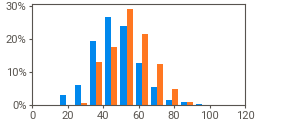
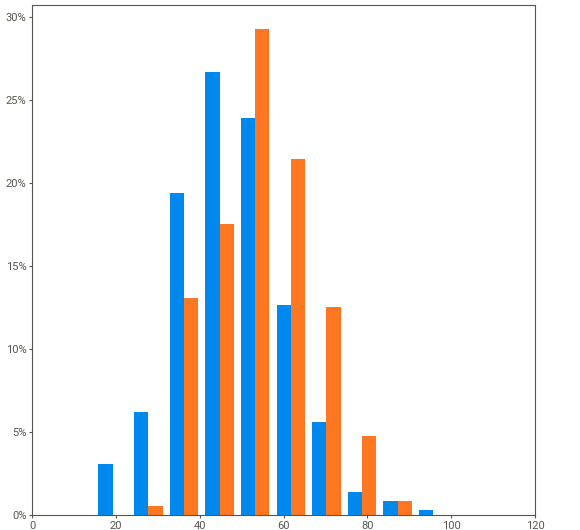
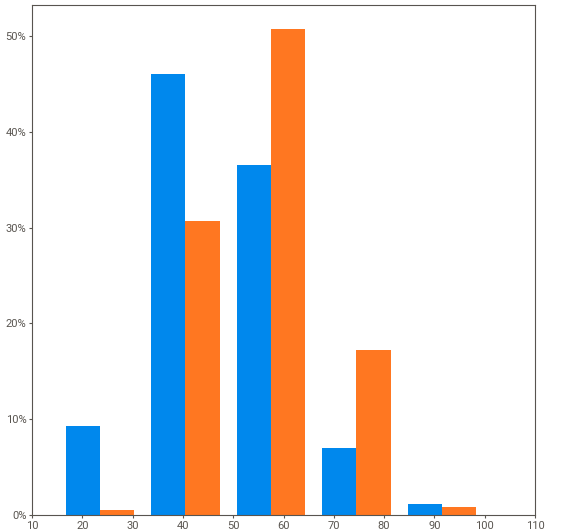
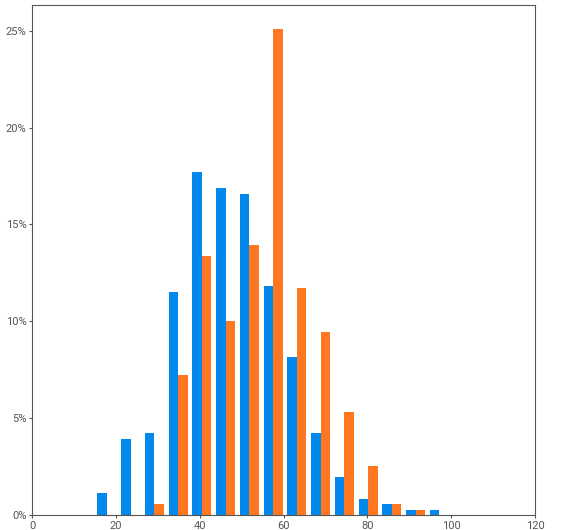
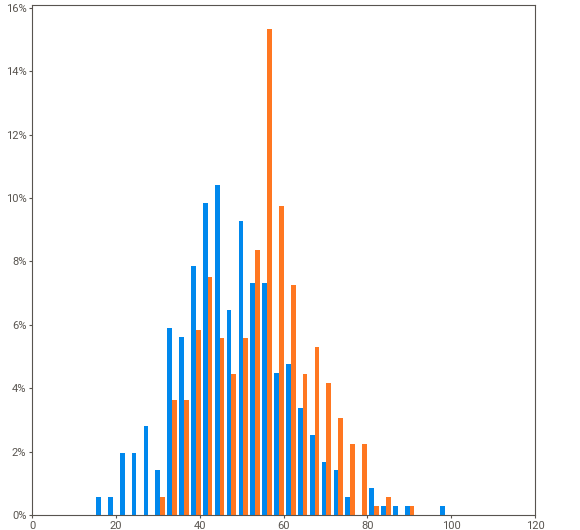
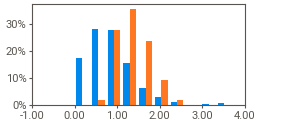
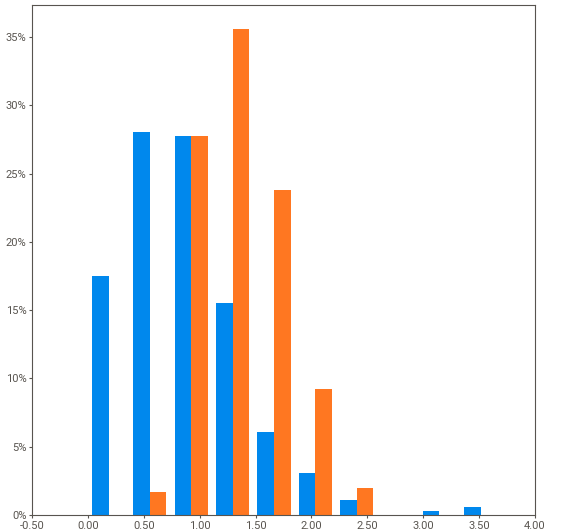
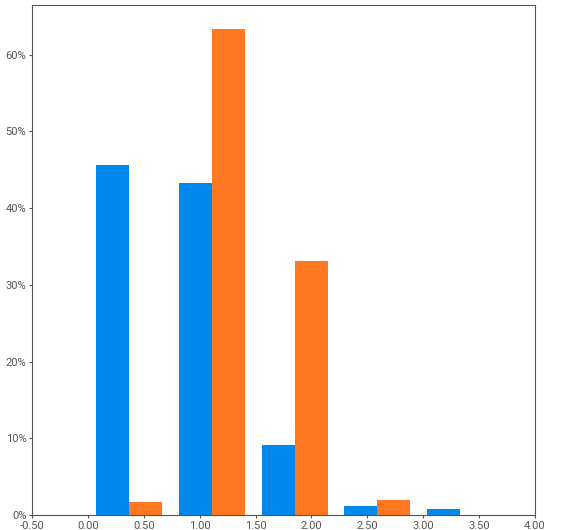
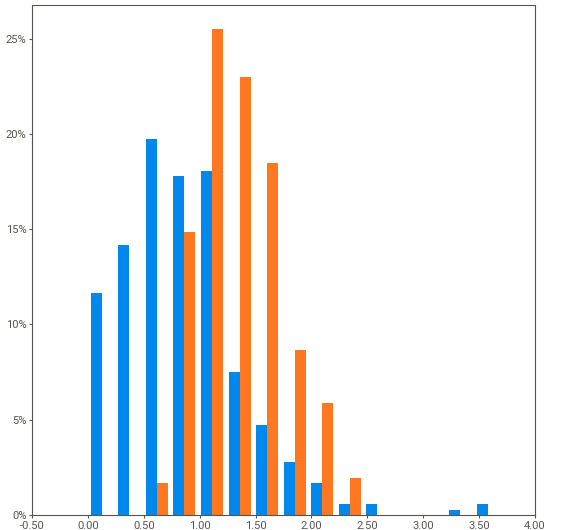
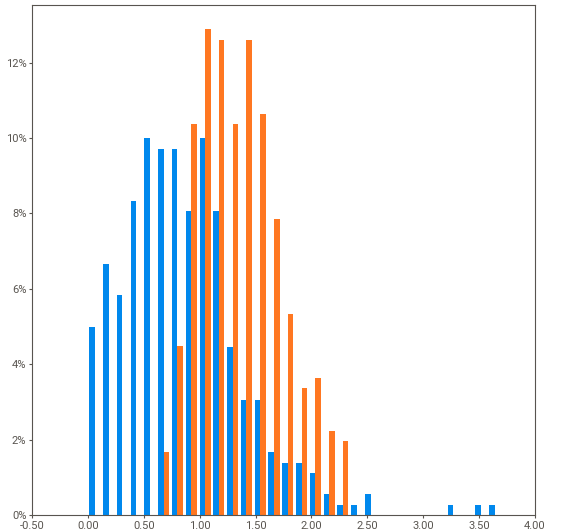
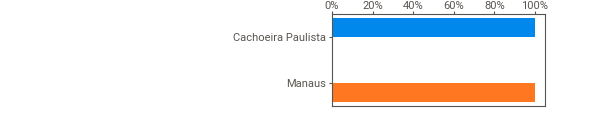
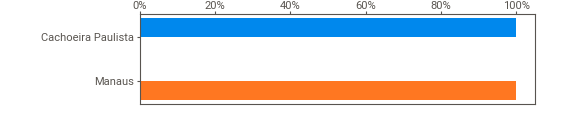
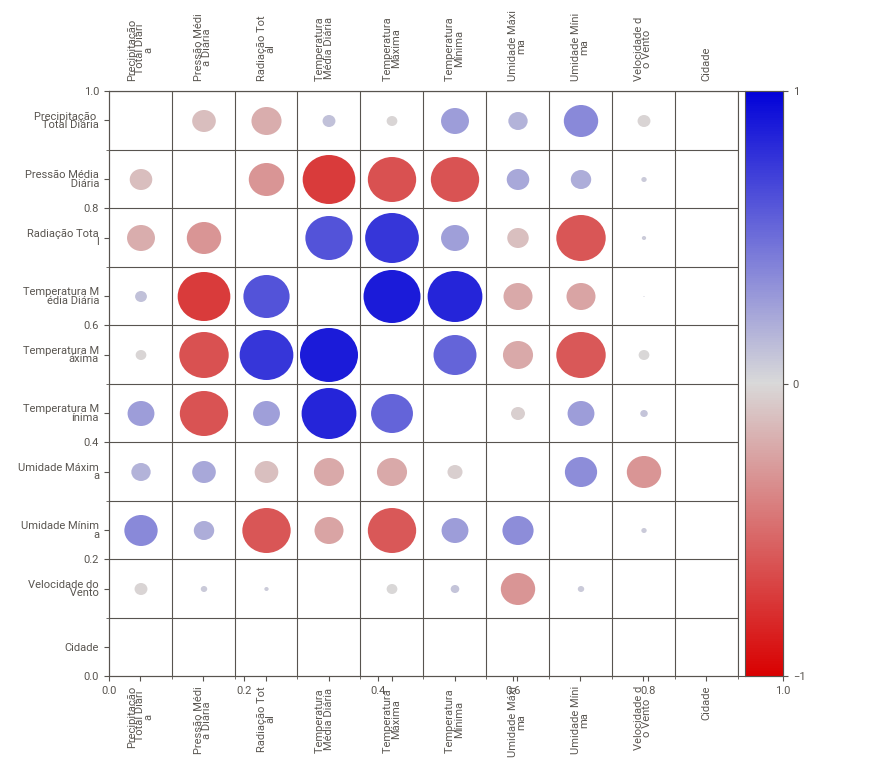
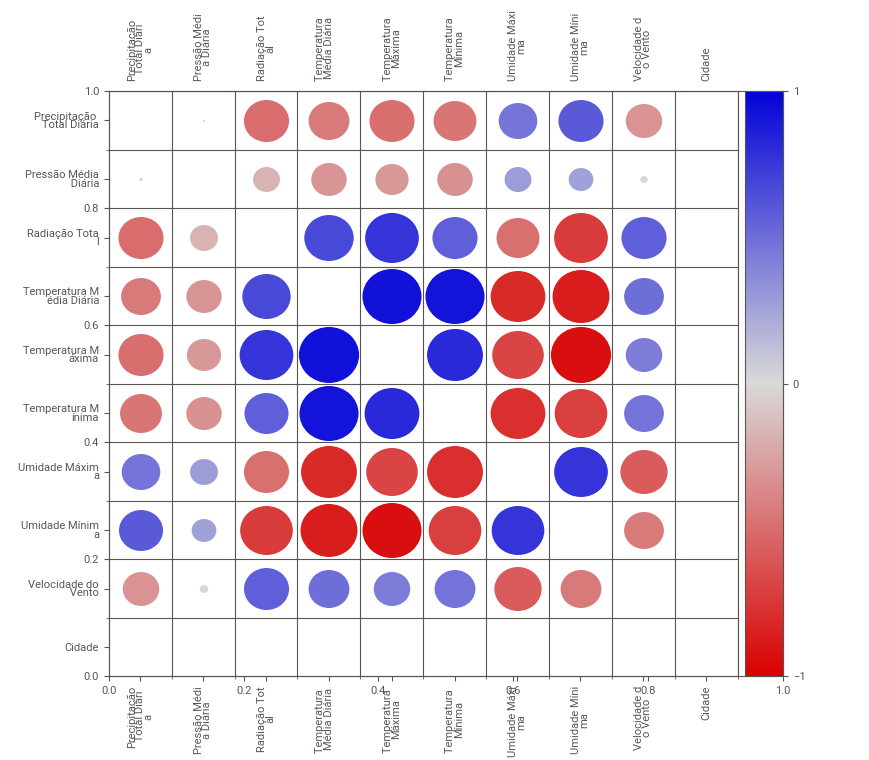

In [24]:
report = sv.compare([df1_cach, "Cachoeira Paulista"],
                    [df1_manaus, "Manaus"])
report.show_notebook()

## Compare_intra

`.compare_intra()`, por outro lado, compara duas seções da mesma DataFrame, e seu uso é mais complexo:


```
report = sv.compare_intra(df, array_verdadeiro_falso, ["Nome da primeira seção", "Nome da segunda seção"])
```

A variável `array_verdadeiro_falso` é a lista de valores que serão usadas para a separação. Por exemplo, `[True, False, False, True, True...]`. Normalmente se usa uma própria comparação de `DataFrames`:




In [25]:
df_visu['Cidade'] == "Cachoeira Paulista"

0       True
1       True
2       True
3       True
4       True
       ...  
725    False
726    False
727    False
728    False
729    False
Name: Cidade, Length: 730, dtype: bool

Juntando tudo:

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)



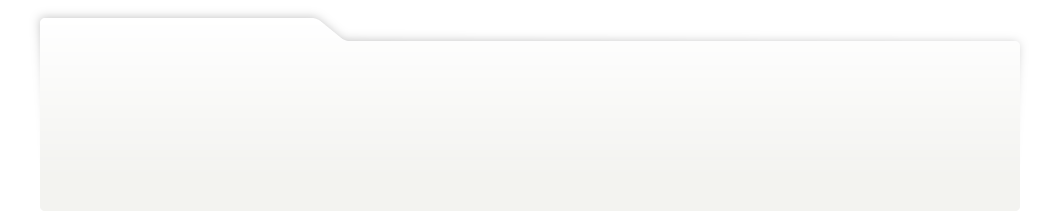
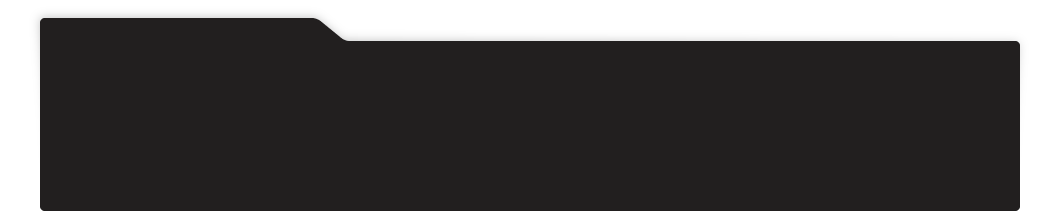
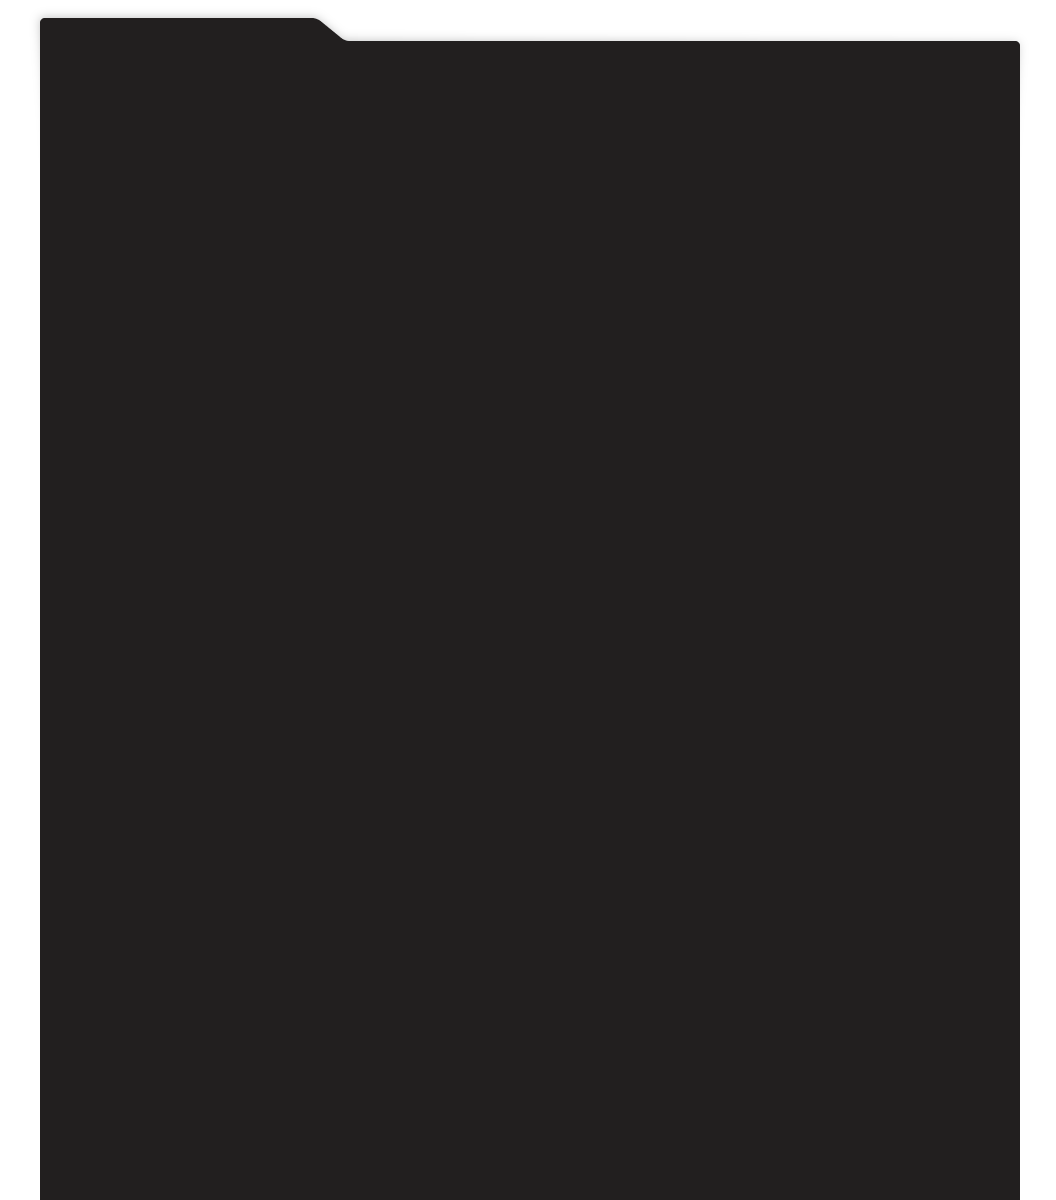
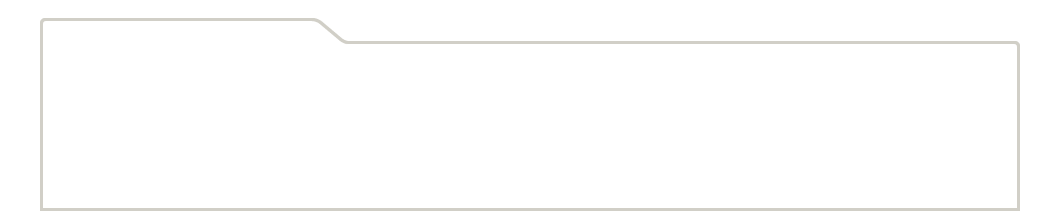
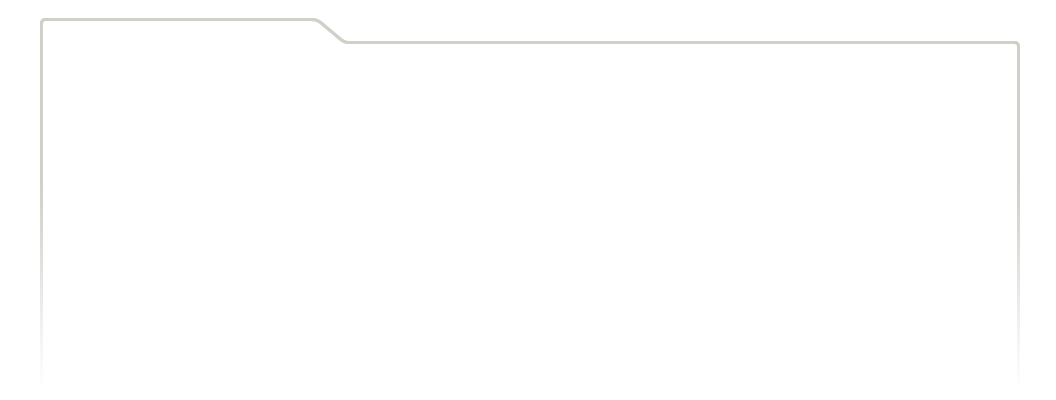
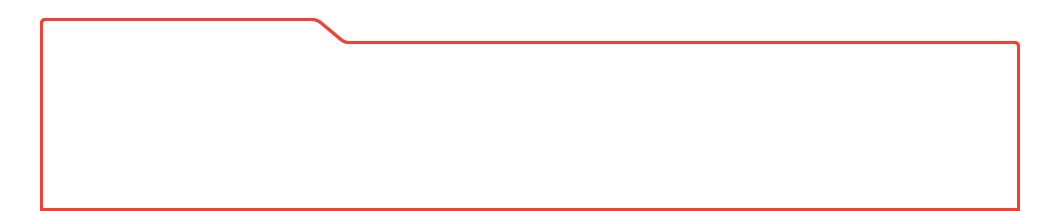
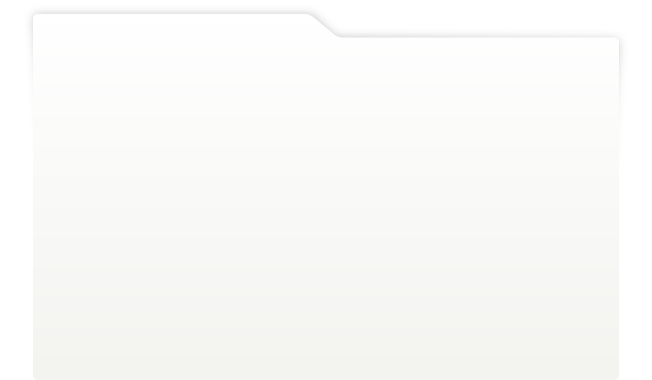
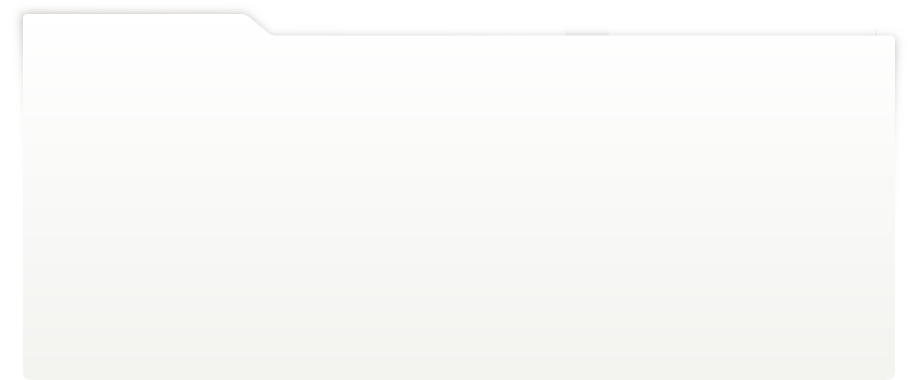
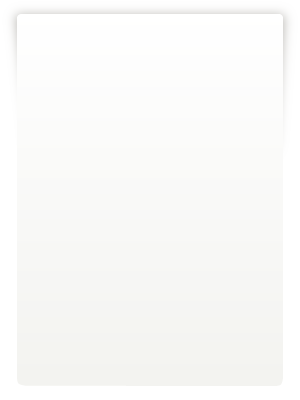
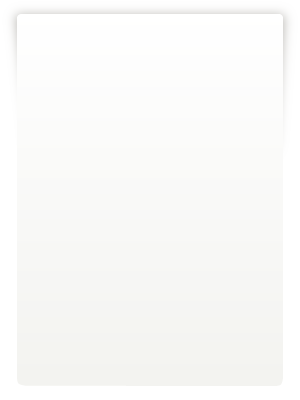
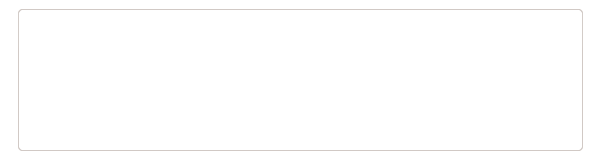
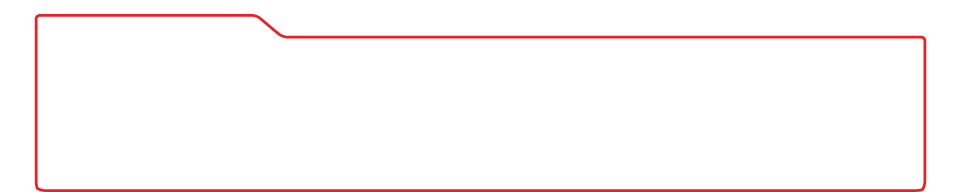
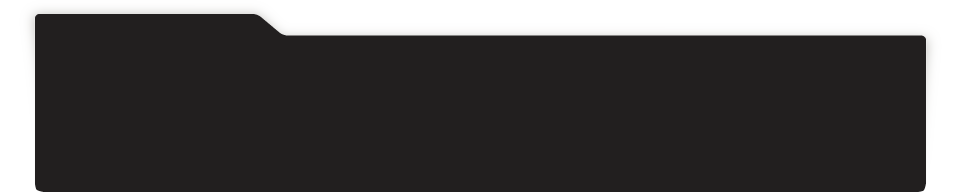
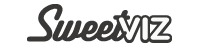
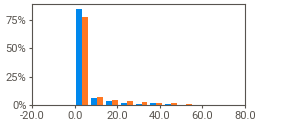
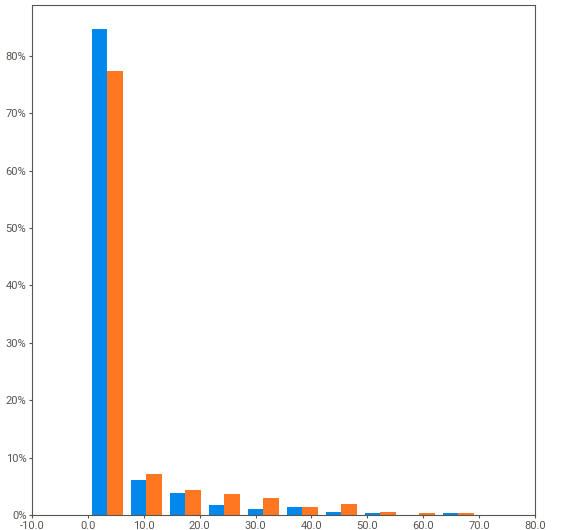
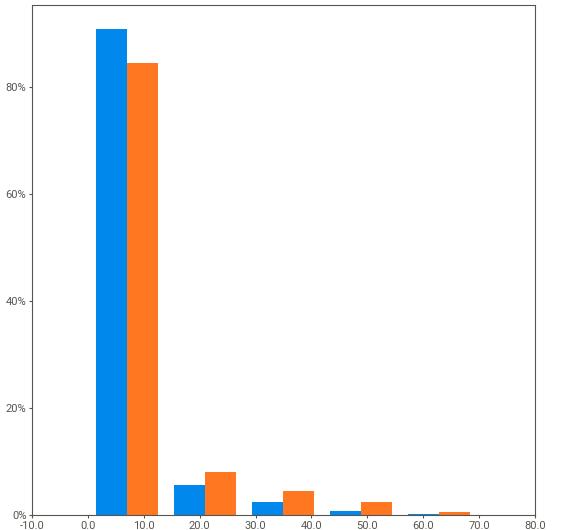
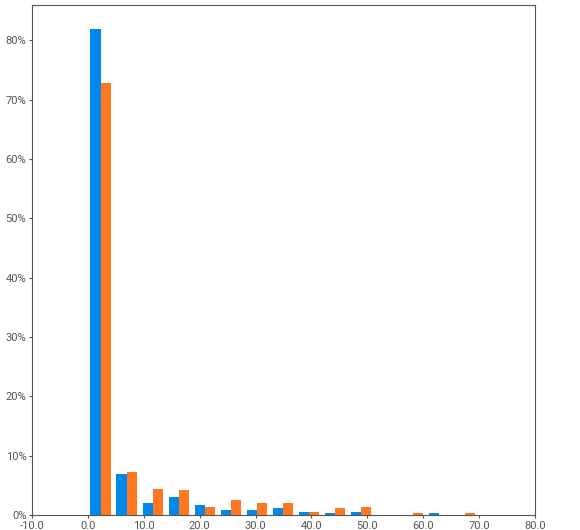
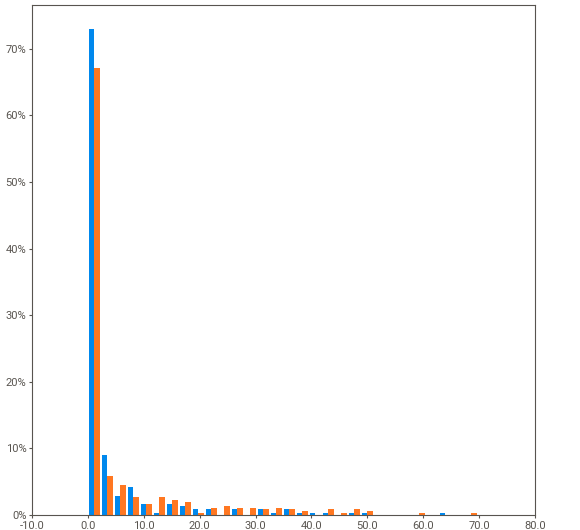
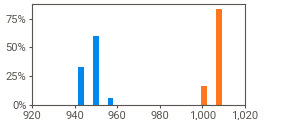
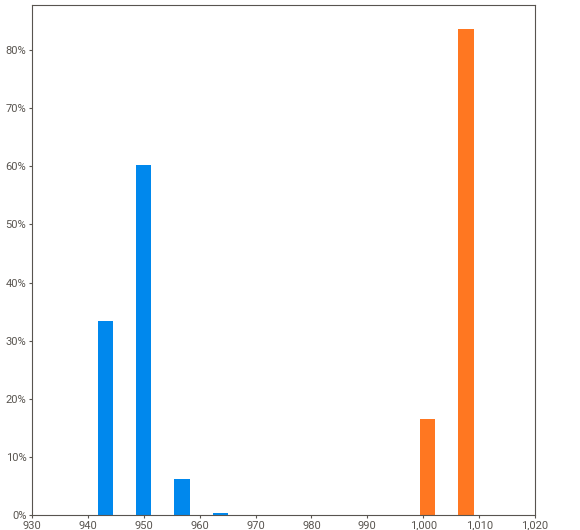
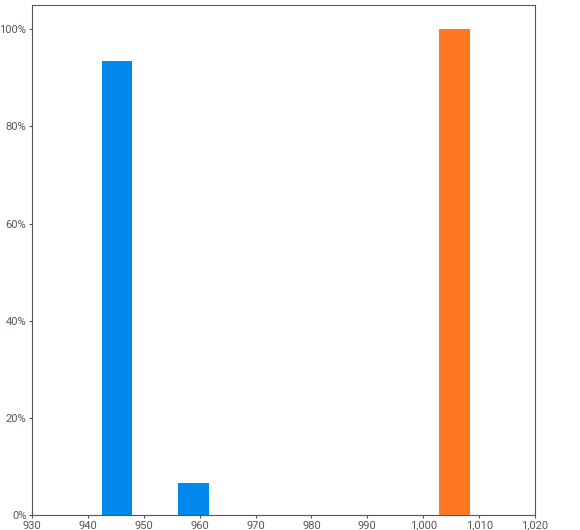
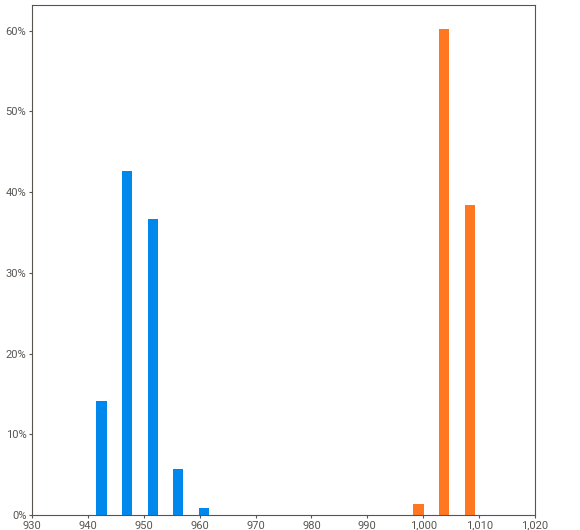
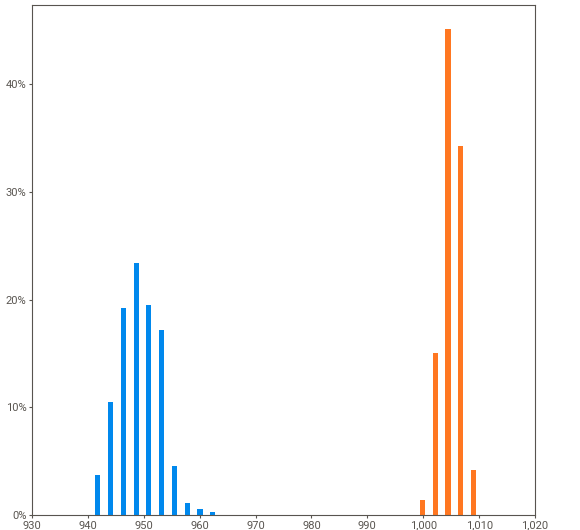
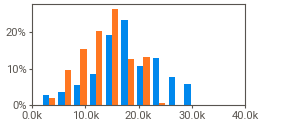
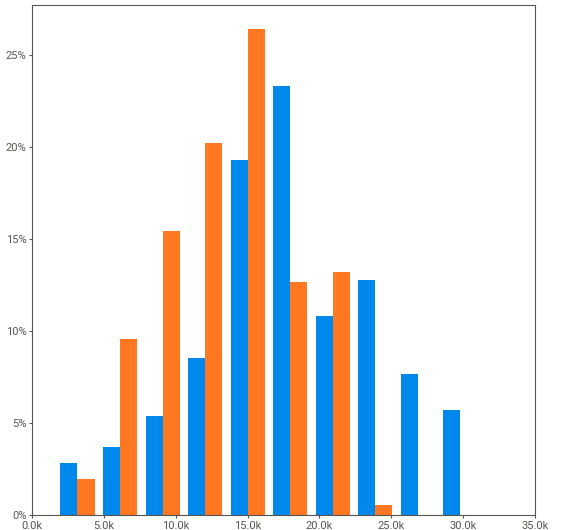
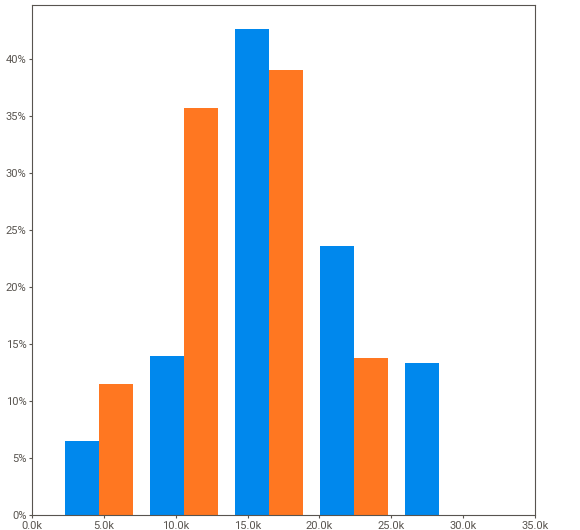
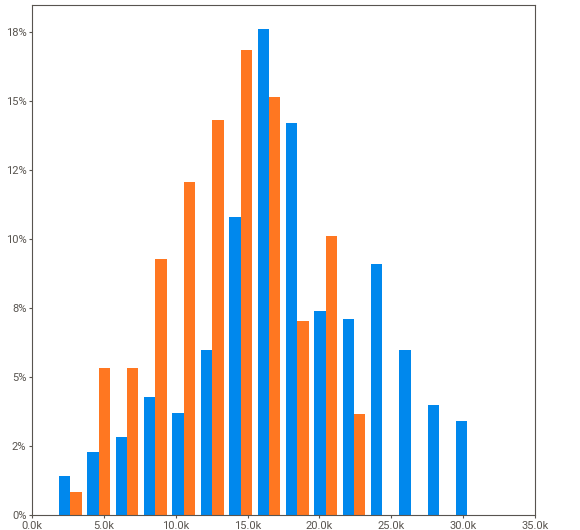
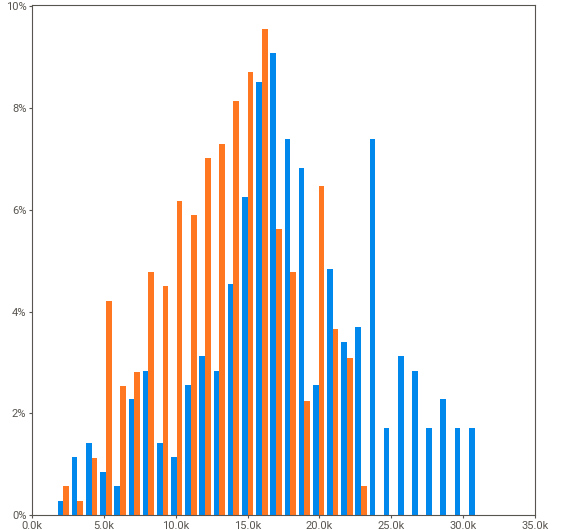
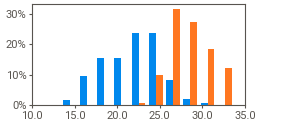
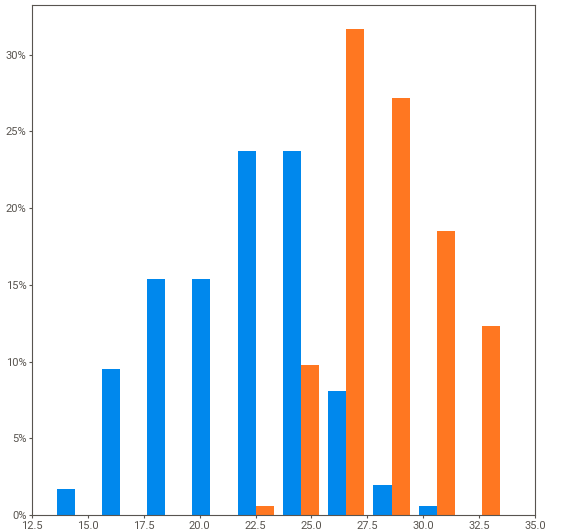
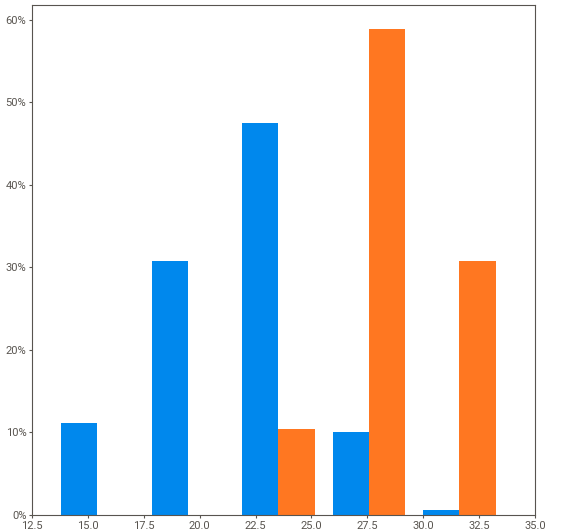
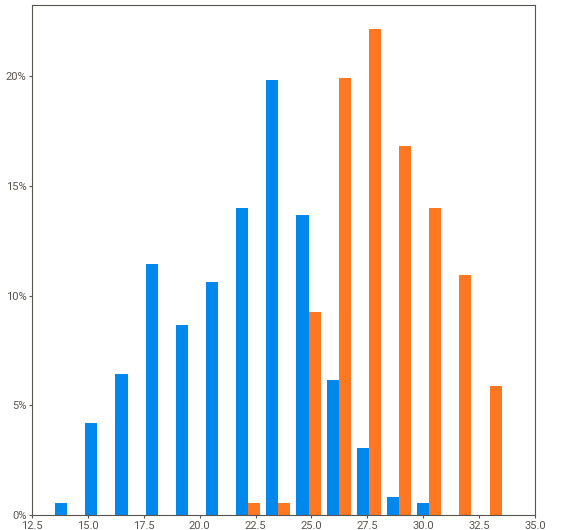
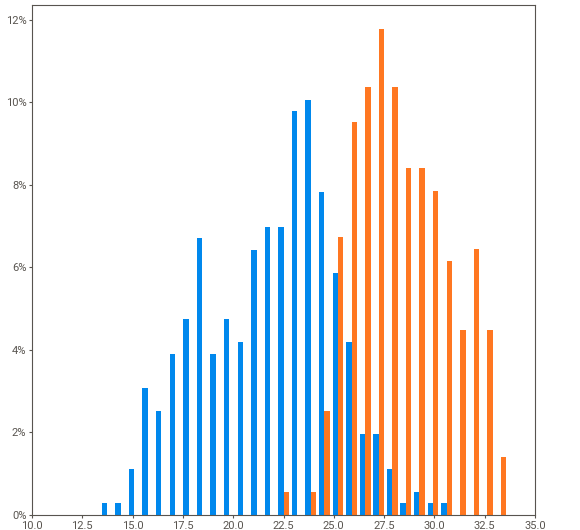
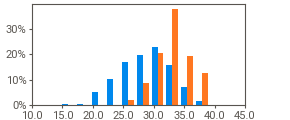
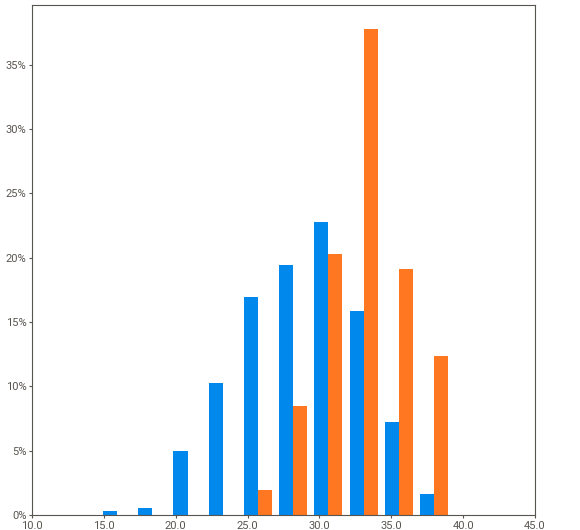
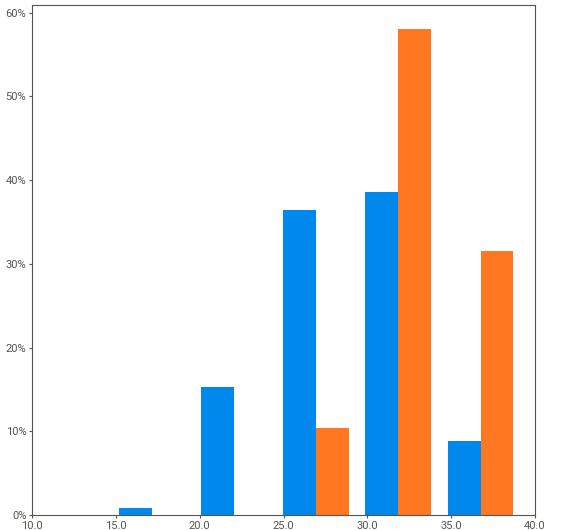
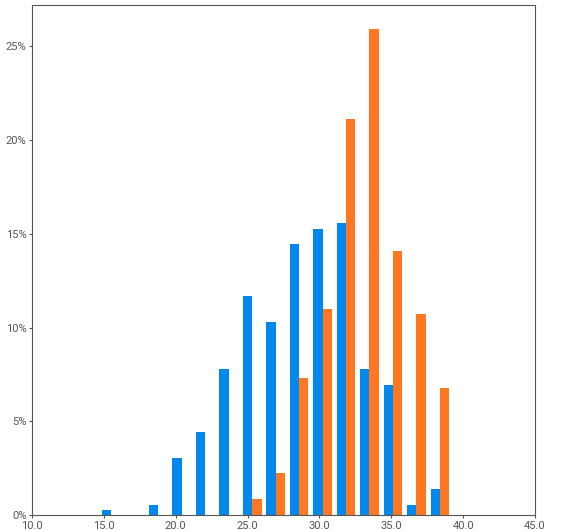
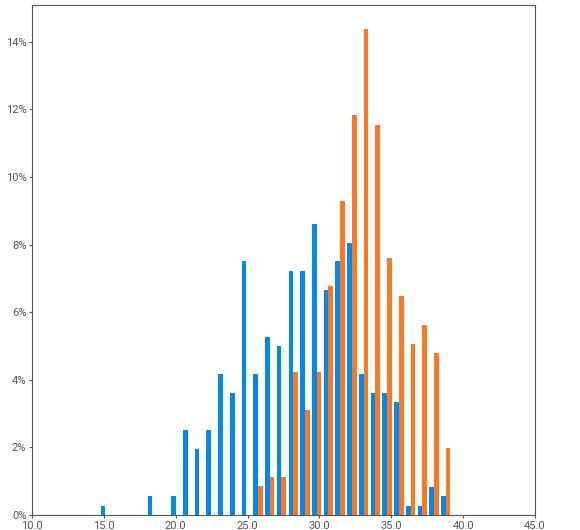
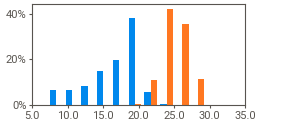
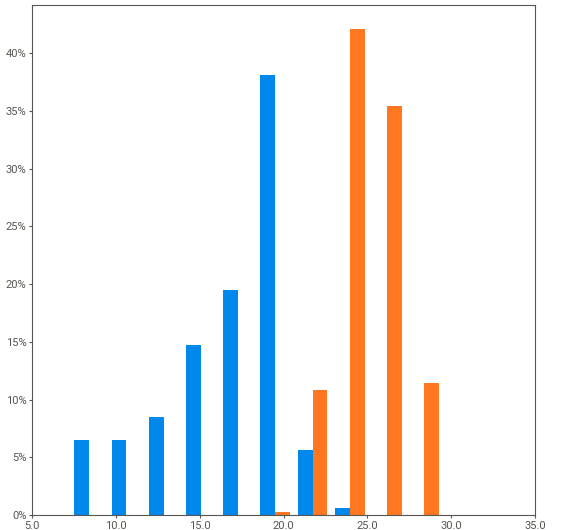
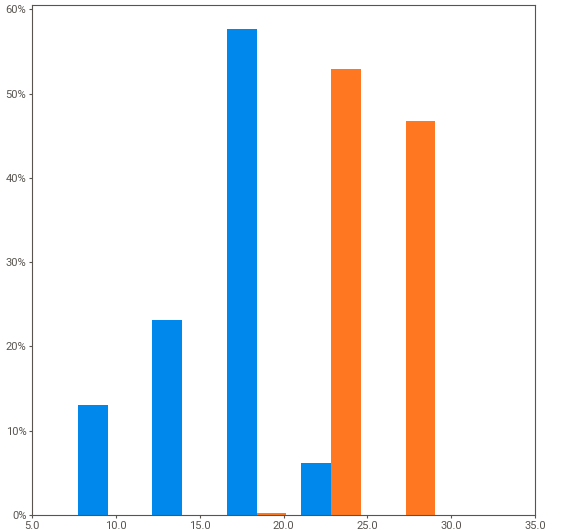
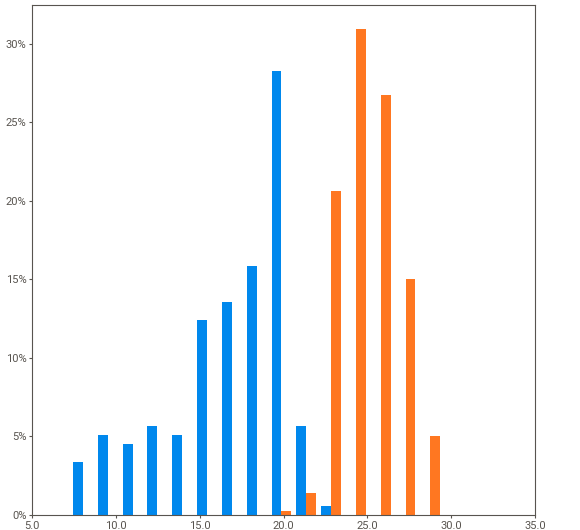
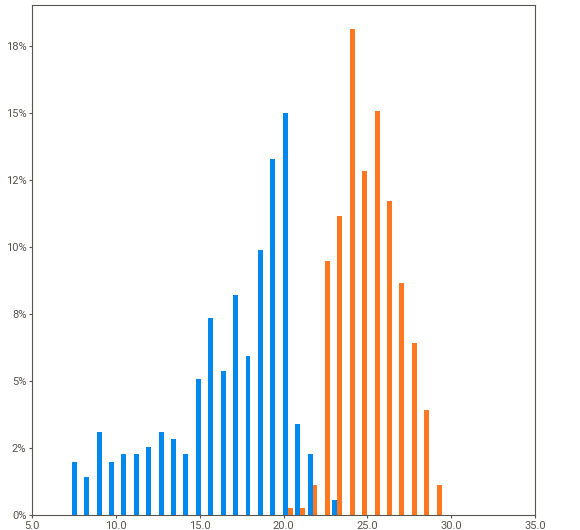
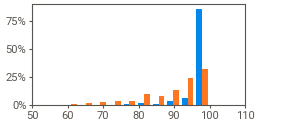
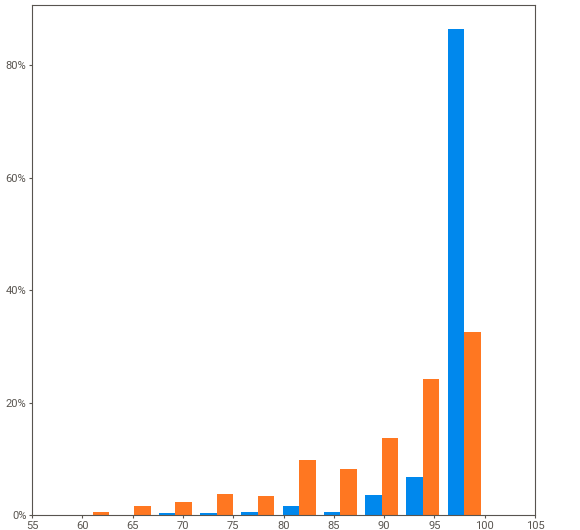
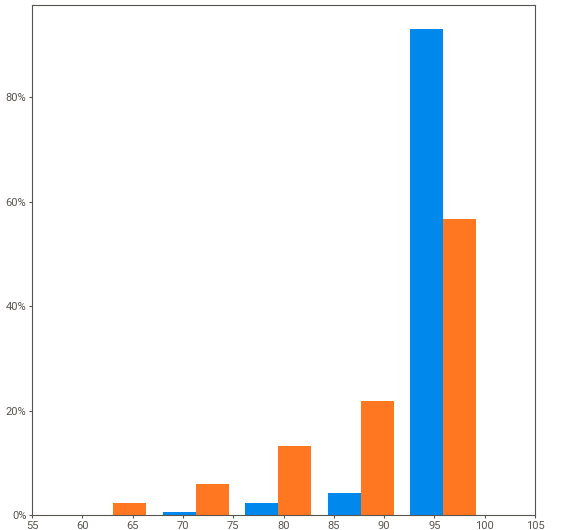
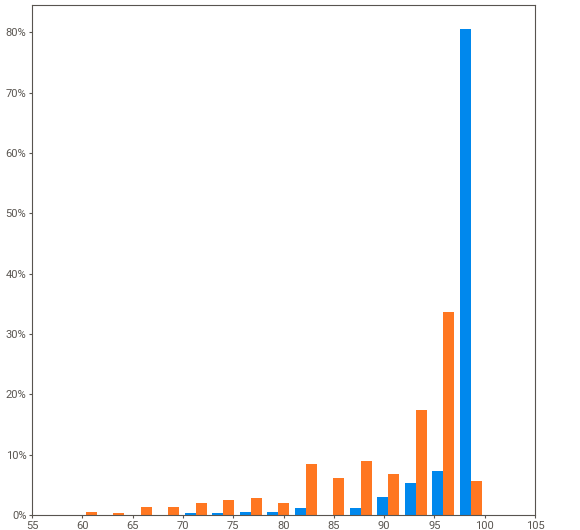
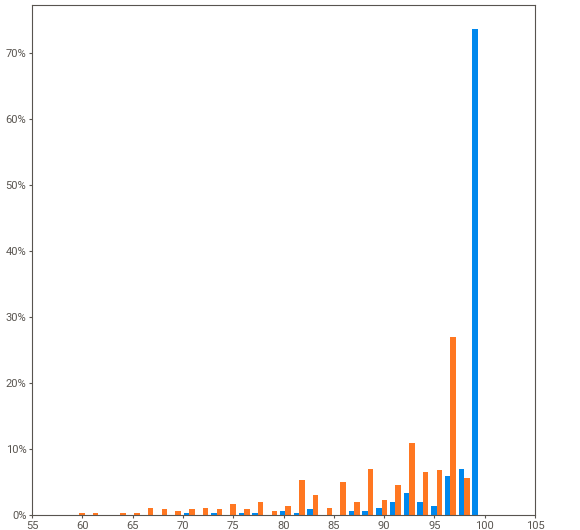
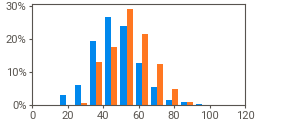
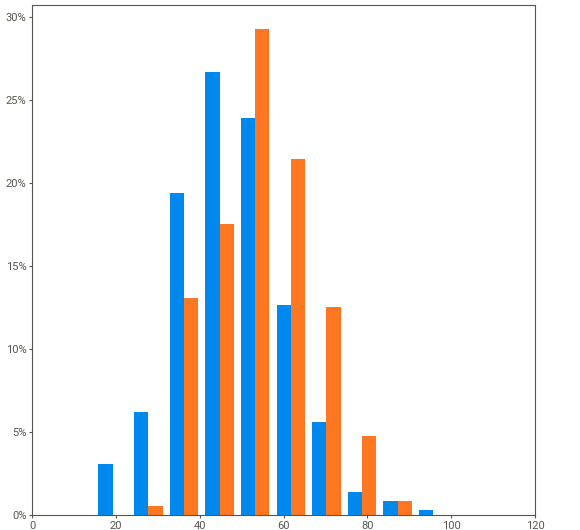
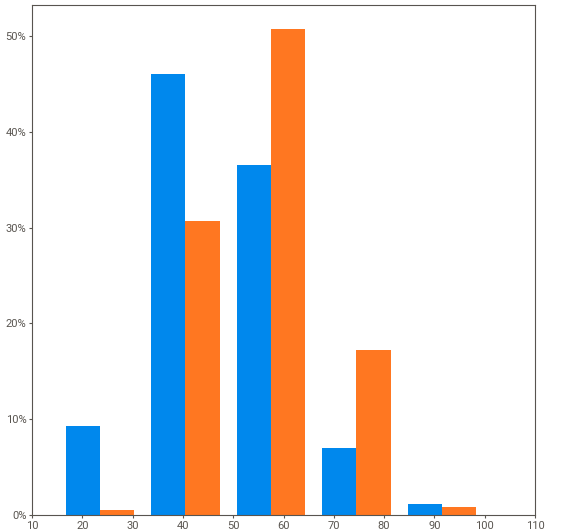
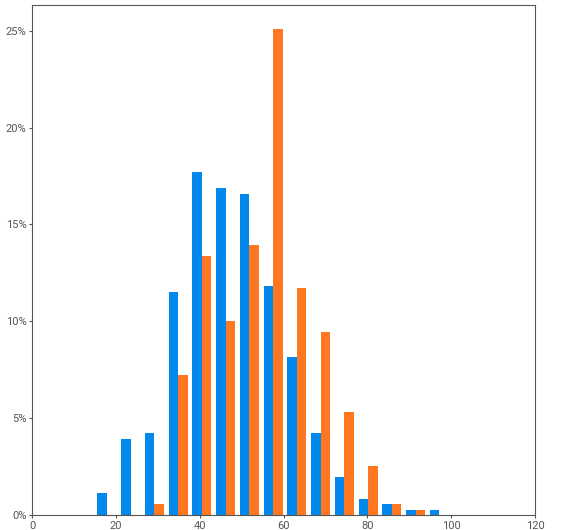
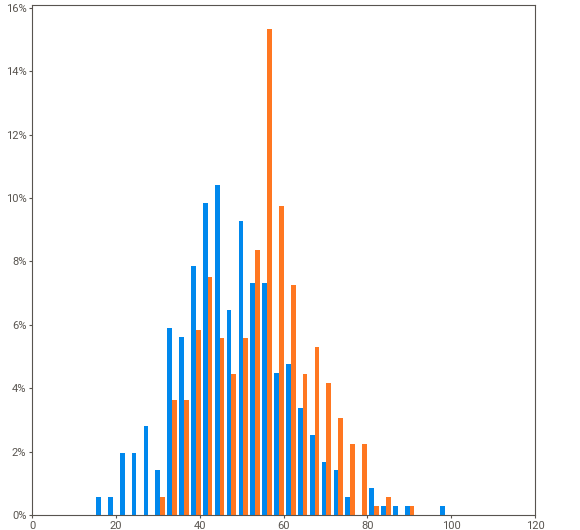
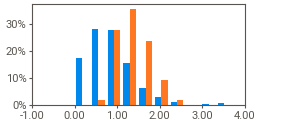
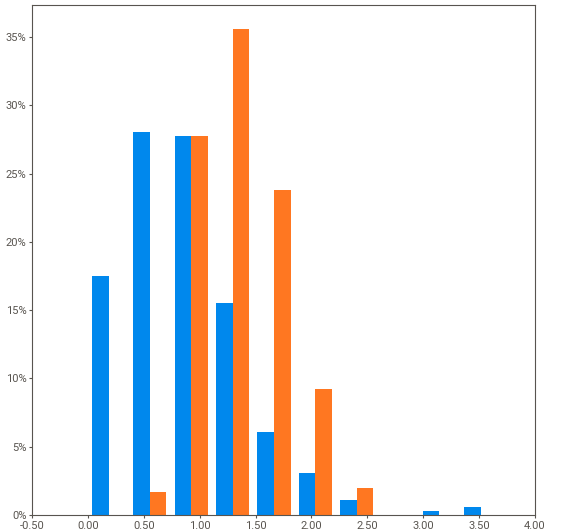
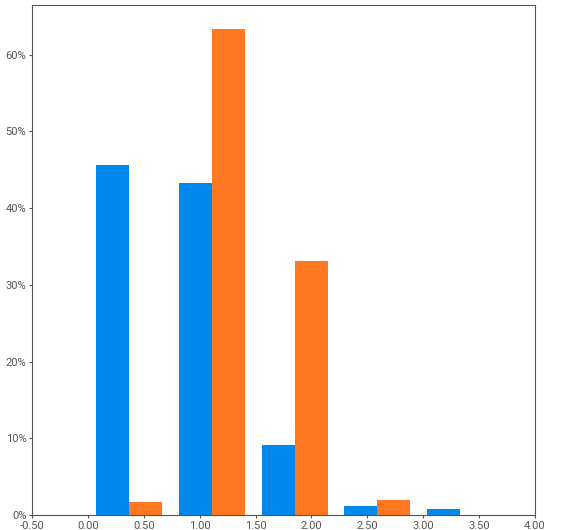
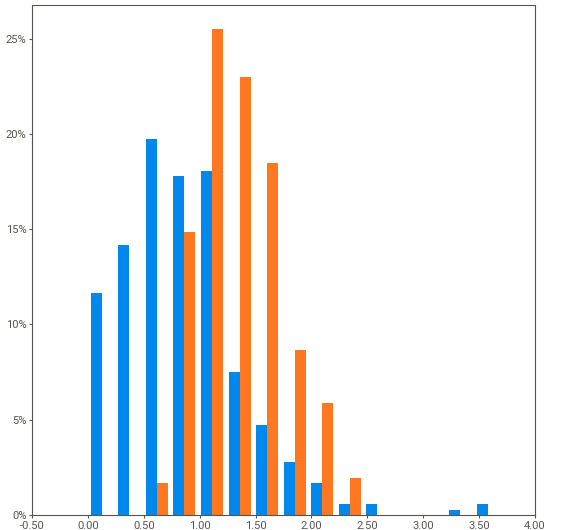
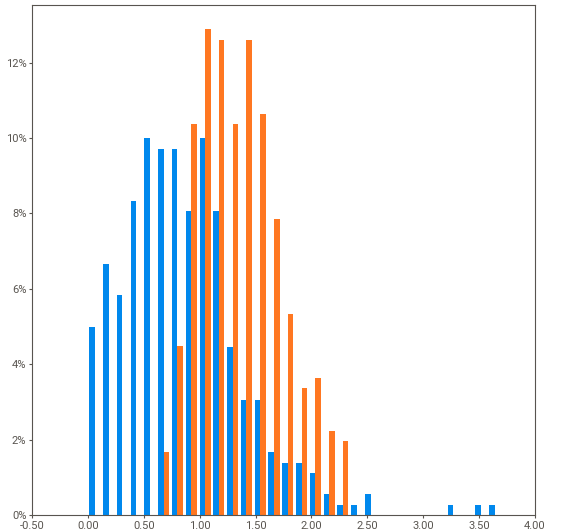
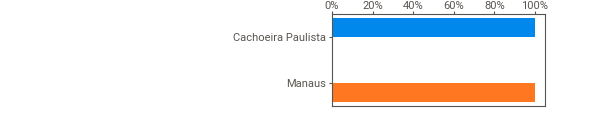
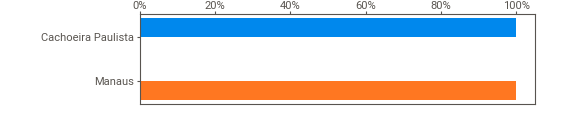
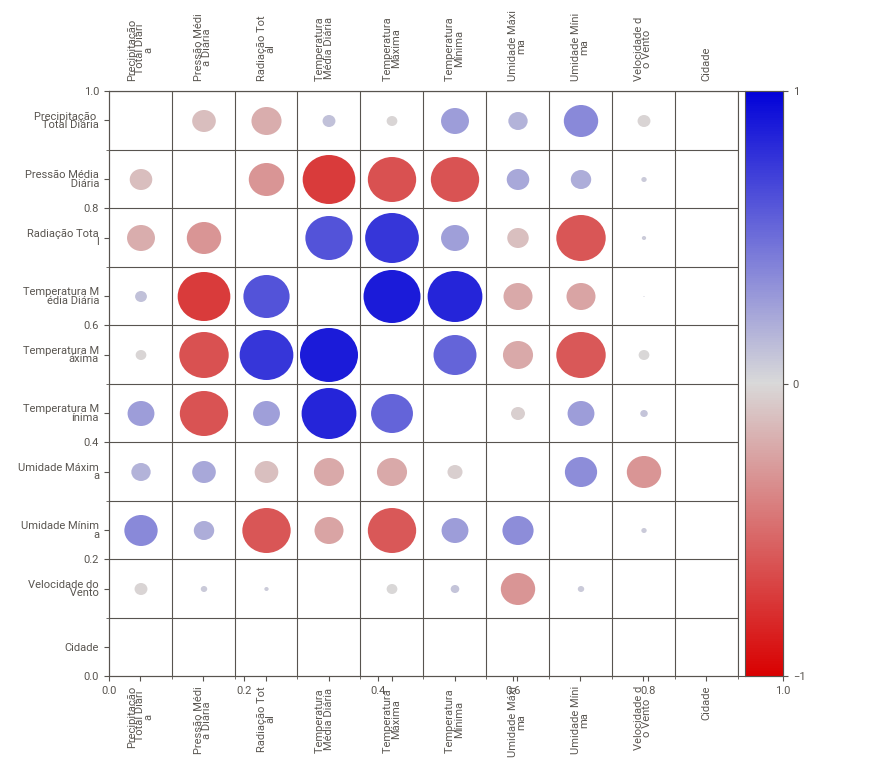
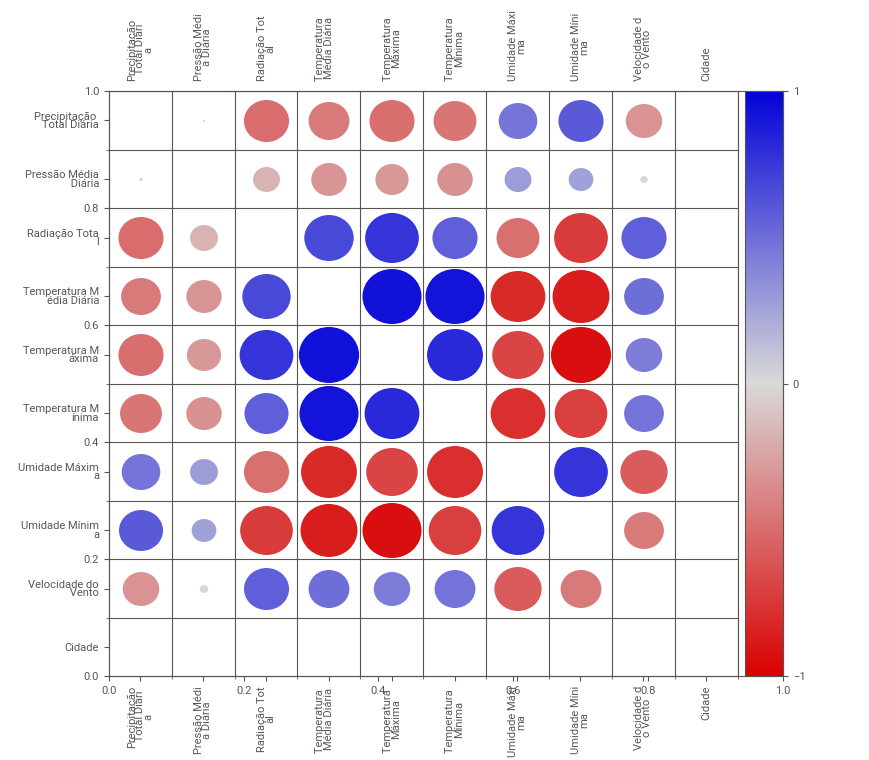

In [26]:
report = sv.compare_intra(df_visu,
                         df_visu['Cidade'] == "Cachoeira Paulista",
                         ["Cachoeira Paulista", "Manaus"])
report.show_notebook()

## Lidando com NaNs
Primeiramente, vamos ver como estão organizadas os `NaN`s para entender como melhor preencher ou remover:

Decompondo, a função `.isna()` para checar se um item é `NaN`.

In [27]:
df_concat.isna().head(10).tail()
#.isna() aplica em todos itens, True se é NaN, False se não
#.head(10) retorna as 10 primeiras linhas
#.tail() retorna as 5 últimas linhas
# Como .tail() foi aplicado em .head(10), as linhas retornadas são 6, 7, 8, 9, 10

Precipitação Total Diária  Pressão Média Diária  Radiação Total  \
Data                                                                          
2023/01/06                      False                 False           False   
2023/01/07                      False                 False           False   
2023/01/08                      False                 False           False   
2023/01/09                      False                 False           False   
2023/01/10                      False                 False           False   

            Temperatura Média Diária  Temperatura Máxima  Temperatura Mínima  \
Data                                                                           
2023/01/06                     False               False               False   
2023/01/07                     False               False               False   
2023/01/08                     False               False               False   
2023/01/09                     False               False               False   
2023/01/10                     False               False               False   

            Umidade Máxima  Umidade Mínima  Velocidade do Vento  Cidade  
Data                                                                     
2023/01/06           False           False                False   False  
2023/01/07           False           False                False   False  
2023/01/08           False           False                False   False  
2023/01/09           False           False                False   False  
2023/01/10           False           False                False   False

Já `.any(axis=1)` retorna uma lista se existe ao menos um `True` na linha

In [29]:
df_concat.isna().any(axis=1)

Data
2023/01/01    False
2023/01/02     True
2023/01/03    False
2023/01/04     True
2023/01/05    False
              ...  
2023/12/27    False
2023/12/28    False
2023/12/29     True
2023/12/30    False
2023/12/31    False
Length: 730, dtype: bool

Ao colocar tudo junto, podemos ver se há algum padrão nas ocorrências de NaNs:

In [30]:
df_concat.loc[ # Localizar
    df_concat.isna().any(axis=1) # Toda linha que tem ao menos um NaN
    ].head() # Retorna as 5 primeiras linhas

Precipitação Total Diária  Pressão Média Diária  Radiação Total  \
Data                                                                          
2023/01/02                        0.0            946.658333             NaN   
2023/01/04                        0.4            943.491304         15371.8   
2023/01/17                        0.0            948.447826         26620.8   
2023/01/19                       50.2            949.545833             NaN   
2023/01/20                        1.6            947.504167         10651.4   

            Temperatura Média Diária  Temperatura Máxima  Temperatura Mínima  \
Data                                                                           
2023/01/02                 23.925000                31.3                17.9   
2023/01/04                 24.139130                29.8                21.2   
2023/01/17                 25.886957                32.6                20.6   
2023/01/19                 22.420833                30.7                18.6   
2023/01/20                 21.320833                25.2                18.8   

            Umidade Máxima  Umidade Mínima  Velocidade do Vento  \
Data                                                              
2023/01/02           100.0            41.0             1.008333   
2023/01/04           100.0             NaN             0.852174   
2023/01/17           100.0             NaN             0.626087   
2023/01/19           100.0            51.0             0.795833   
2023/01/20             NaN            70.0             0.416667   

                        Cidade  
Data                            
2023/01/02  Cachoeira Paulista  
2023/01/04  Cachoeira Paulista  
2023/01/17  Cachoeira Paulista  
2023/01/19  Cachoeira Paulista  
2023/01/20  Cachoeira Paulista

Como não há, podemos utilizar de uma aproximação:  um dia terá atributos semelhantes aos dias adjascentes. Ao assumir isso, podemos usar `.ffill()` ou `.bfill()` sem muitas preocupações:

In [46]:
df_02_ffill = df_concat.ffill()

## Modelo KNN

### Base teórica
O modelo **K-NearestNeighbor** se baseia na idea de que elementos de dados semelhantes (no nosso caso, classes), estão próximos entre si. São calculadas as distâncias entre o ponto novo e os pontos já conhecidos, e qualquer dado novo assumirá as qualidade dos k-vizinhos mais próximos (com menores distâncias).   
Há várias formas de calcular a distância, para o exemplo abaixo, será usada a distância euclidiana:  


Imagine os dados a seguir, em $\mathbb{R}^3$:

In [47]:
dados = [['Rato', 4, 0.24, 1],
         ['Elefante Africano', 320, 6000, 31],
         ['Cachorro', 17, 7, 0.17],
         ['Rato', 5, 0.4, 2]]
pd.DataFrame(dados, columns=['Espécie', 'Tamanho (cm)', 'Peso (kg)', 'Idade (anos)'])

Espécie  Tamanho (cm)  Peso (kg)  Idade (anos)
0               Rato             4       0.24          1.00
1  Elefante Africano           320    6000.00         31.00
2           Cachorro            17       7.00          0.17
3               Rato             5       0.40          2.00

E agora um novo animal, com os atributos:


*   Tamanho = 31 cm
*   Peso = 23 kg
*   Idade = 2 anos

Ao calcular as distâncias (euclidianas):



1. Rato 1: $\sqrt{(31-4)^2 + (23-0.24)^2 +(2-1)^2} = 35.33$
2. Elefante Africano: $\sqrt{(31-320)^2 + (23-6000)^2 +(2-31)^2} = 5984.05$
3.   Cachorro: $\sqrt{(31-17)^2 + (23-7)^2 +(2-0.17)^2} = 21.34$
4. Rato 2: $\sqrt{(31-5)^2 + (23-0.4)^2 +(2-2)^2} = 34.45$

Assim,
*   Para k = 1, o vizinho mais próximo é o cachorro. Logo, o novo animal seria um cachorro
*   Para k = 2, os 2 vizinhos mais próximos são o Cachorro e Rato 2. Há um empate entre o cachorro e Rato 2, então o modelo precisa decidir qual destas duas classes escolher.
*   Para k = 3, os 3 vizinhos mais próximo são o Cachorro, Rato 2 e Rato 1. Como o modelo escolhe por moda, o animal seria um rato.
*   Para k = 4, os 4 vizinhos mais próximo são o Cachorro, Rato 2, Rato 1 e elefante. Como o modelo escolhe por moda, o animal seria um rato.


---
Segue uma representação visual do modelo em um espaço bidimensional.

In [33]:
from IPython.display import HTML
data_url = 'https://github.com/JCFDGG/LOB1266-PUB/raw/refs/heads/main/Anim/knn/media/videos/main/1080p60/KNNAnimation.mp4'
HTML("""
<video width=960 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### Preparando o dataset - Train/Test Split

In [48]:
# Módulo de separação de dataset em treino/teste
from sklearn.model_selection import train_test_split

# Modelo KNeighbors
from sklearn.neighbors import KNeighborsClassifier

Para modelos em que há uma resposta correta, é ideal dividirmos eles em uma parte para treino e uma parte para testar a performance do modelo. O módulo `train_test_split` faz exatamente isso, resultando em 4 variáveis:



```
x_train, x_test, y_train, y_test = train_test_split(dataframe, variavel_a_ser_predita)
```


Mas primeiro, vamos mudar a coluna `"Data"` para algo numérico:

In [49]:
df_03_datadia = df_02_ffill.copy().reset_index() # Reinicia o índice de df3

df_03_datadia['Data'] = df_03_datadia.Data.dt.dayofyear # Muda a coluna Data para o dia do ano

In [50]:
# Todos os grupos treino/testes são definidos juntos na mesma linha:

x_train, x_test, y_train, y_test = train_test_split( # Usa o método de sklearn
    df_03_datadia.drop('Cidade', axis=1), # As variáveis serão toda a df3 sem a coluna Cidade
    df_03_datadia['Cidade'], # A variável objetivo será a coluna cidade
    random_state=123) # Um número que permite reprodução

Treinar e fazer o modelo é simples. Você pode salvar o método diretamente a uma variável, para simplicidade de código:

In [51]:
model = KNeighborsClassifier(n_neighbors=5)

O argumento `n_neighbors` será o quanto de vizinhos que serão considerados para classificar um ponto.  
Outros argumentos, também importantes, são descritos na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Estes argumentos modificarão diferentes aspectos da matemática por trás do modelo; por exemplo, como ele calculará distâncias, como ele escolherá um vizinho, e afim.

E para treinar o modelo, é apenas necessário aplicar `.fit`

In [52]:
model.fit(x_train, # x_train serão as variáveis
          y_train) # y_train será o objetivo

KNeighborsClassifier()

Para fazer uma predição em um ponto, usa-se o `.predict` com o ponto como argumento.

In [53]:
ponto_a_ser_predito = x_test.iloc[[20]] # Seleciona a linha 20 como ponto
ponto_a_ser_predito # Mostra a linha 20

Data  Precipitação Total Diária  Pressão Média Diária  Radiação Total  \
718   354                        4.2             1001.8375         14206.0   

     Temperatura Média Diária  Temperatura Máxima  Temperatura Mínima  \
718                   27.4875                31.0                25.6   

     Umidade Máxima  Umidade Mínima  Velocidade do Vento  
718            96.0            65.0             1.654167

In [54]:
model.predict(ponto_a_ser_predito) # Usa o modelo treinado para prever a linha 20

array(['Manaus'], dtype=object)

O modelo acha que para o ponto dado, a cidade é Manaus.

# Avaliação do Modelo (Validação)

### Avaliando

A avaliação também é feita por módulos da biblioteca `sklearn`. Os três principais são:

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Score
O `accuracy_score` é a proporção de predições corretas:

$$
score = \frac{\text{Predições corretas}}{\text{Predições totais}}
$$


E seu uso em *python* é dado por:
```
accuracy_score(valores_verdadeiros, valores_preditos)
```



In [ ]:
accuracy_score(y_test,
               model.predict(x_test) # Prediz todo o x_teste
               )

0.6502732240437158

### Confusion Matrix

A matriz de confusão é uma matriz em que as colunas são dadas pela predição do modelo, e as linhas são as corretas:

In [56]:
print(confusion_matrix(y_test,
                       model.predict(x_test)))

[[59 39]
 [25 60]]


Neste caso, o Modelo prediziu 59 Cachoeira quando era Cachoeira, e 25 Cachoeira para quando era Manaus. Caso desejado, você pode usar `ConfusionMatrixDisplay` para visualizar em um gráfico. O uso é dado na forma:


```
ConfusionMatrixDisplay.from_estimator(modelo,
                                      x_test,
                                      y_test)
                                      ```




In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

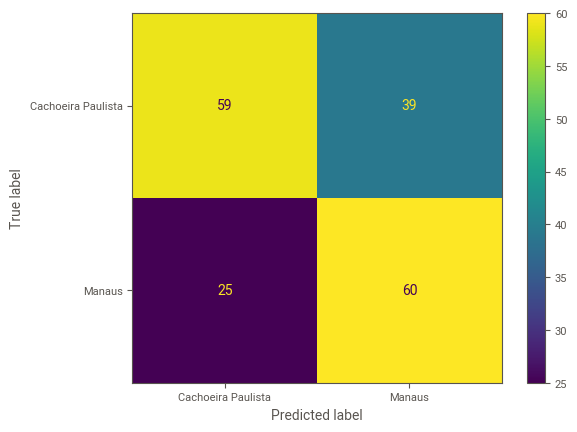

In [58]:
ConfusionMatrixDisplay.from_estimator(model,
                                      x_test, y_test)

### Classification Report

In [59]:
print(classification_report(y_test,
                            model.predict(x_test)))

                    precision    recall  f1-score   support

Cachoeira Paulista       0.70      0.60      0.65        98
            Manaus       0.61      0.71      0.65        85

          accuracy                           0.65       183
         macro avg       0.65      0.65      0.65       183
      weighted avg       0.66      0.65      0.65       183



A definação dos valores é:


*   _precision_: proporção das predições positivas corretas de todas predições positivas:
$$\frac{\text{verdadeiro positivos} (VP)}{VP + \text{falso positivos}}$$
Útil para determinar a quantidade de falso positivos.  

*   _recall_: proporção de predições positivas de todos positivos reais
$$\frac{\text{verdadeiro positivos} (VP)}{VP + \text{falso positivos}}$$
*   _f1-score_: média harmônica entre _precision_ e _recall_
*   _support_: quantidade de amostras.



## Normalizando os dados (Preparação dos Dados)
Como KNN é baseado na distância entre pontos, números grandes distorcem o modelo. Assim, é ideal normalizar as *features* para que não ocorram.
O método mais comum é através do `StandardScaler`, da biblioteca sklearn:


In [60]:
from sklearn.preprocessing import StandardScaler

A forma de lidar com o `StandardScaler` é data por `fit_transform`:

In [69]:
scaler = StandardScaler() # Salva em uma variável

normalizado = scaler.fit_transform( # Usa fit para treinar o modelo, e transform para modificar o dataframe:
    df_03_datadia.drop('Cidade', axis=1) # Normaliza a DataFrame sem a coluna Cidade
    )

df_04_normalizada = pd.DataFrame(normalizado)

Podemos visualizar o que a transformação fez por um KDE:

<Axes: ylabel='Density'>

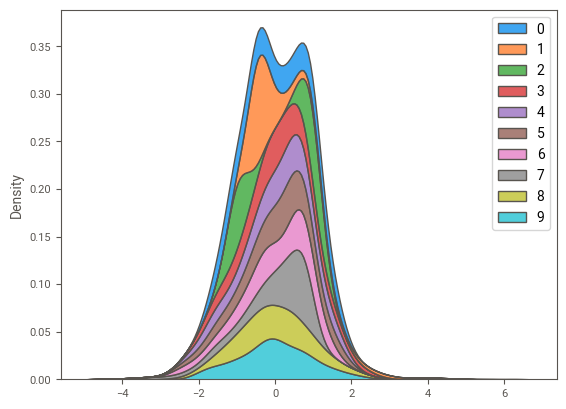

In [64]:
sns.kdeplot(df_04_normalizada, # KDE Plot com os dados de df5
            multiple='stack', # Usa stack para quando dados sobrepõem
            fill=True) # Preenche dentro das linhas com as cores

Refazendo o modelo, agora com esses dados, temos os seguintes resultados:

In [67]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(df_03_datadia.drop('Cidade', axis=1), # As variáveis x
                                                            df_03_datadia['Cidade'], # As variáveis y
                                                            random_state=123) # Estado para reprodução

X_train_1_scaled = scaler.fit_transform(X_train_1) # Treina e normaliza x_train_1

X_test_1_scaled = scaler.transform(X_test_1) # Normaliza x_test, sem treinar

model_1 = KNeighborsClassifier() # Salva o modelo na variável

model_1.fit(X_train_1_scaled, Y_train_1)

KNeighborsClassifier()

In [70]:
print(classification_report(Y_test_1, # Os valores verdadeiros
                            model_1.predict(X_test_1_scaled)) # Usa os valores preditos na DataFrame normalizada
)

                    precision    recall  f1-score   support

Cachoeira Paulista       1.00      0.99      0.99        98
            Manaus       0.99      1.00      0.99        85

          accuracy                           0.99       183
         macro avg       0.99      0.99      0.99       183
      weighted avg       0.99      0.99      0.99       183



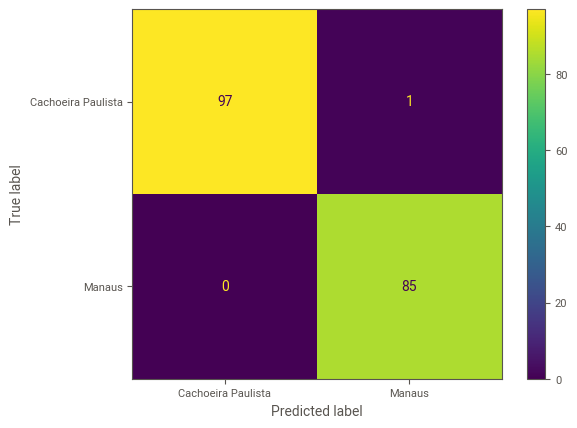

In [71]:
ConfusionMatrixDisplay.from_estimator(model_1, # Usa o modelo
                                      X_test_1_scaled, # Variáveis teste
                                      Y_test_1) # Valores teste verdadeiros

Assim, é evidente a precisão do modelo. 99% dos dados são preditos corretamente.

# Outros modelos (Modelagem/Análise)

Há outros modelos, também especificados para classificações. Um de grande interesse didático é **Decision Trees** - árvores de decisão, em que é possível graficar um fluxograma de decisões baseado nos valores, que nos retoma um resultado.  
Os modelos de decisiontrees podem ser importados da forma:

In [72]:
from sklearn import tree

E então, pode-se declarar o modelo da mesma forma que o **KNN**:

In [73]:
modelo2 = tree.DecisionTreeClassifier() # Salva o modelo a uma variável

Vamos treinar com as mesmas variáveis, porém vamos retirar a coluna `Pressão Média Diária` por enquanto (apenas para não ficar tão fácil! Depois colocaremos de volta e veremos o quão mais simples o modelo fica.)

In [74]:
x_train_tree = x_train.drop('Pressão Média Diária', axis=1)
x_test_tree = x_test.drop('Pressão Média Diária', axis=1)

E para treinar o modelo, usa-se o mesmo método `.fit()`:

In [75]:
modelo2.fit(x_train_tree, # Treina com os valores de x_train_tree
            y_train)  # Treina com os resultados de y_train

DecisionTreeClassifier()

**Comentários**:
- Não é necessário usar de normalização para uma **Decision Tree**, visto que - diferente do **KNN** - o modelo não é baseado em distância.
- Não é recomendado reutilizar a mesma separação train/test para diferentes modelos (e até mesmo para diferentes iterações do mesmo modelo), já que a aleatoriedade é perdida ao repetir seu uso.

## Avaliação da árvore de decisão (Validação)

O `tree` também permite graficar o fluxograma diretamente do modelo. Assim, podemos ver as decisões que o modelo toma para fazer sua decisão:

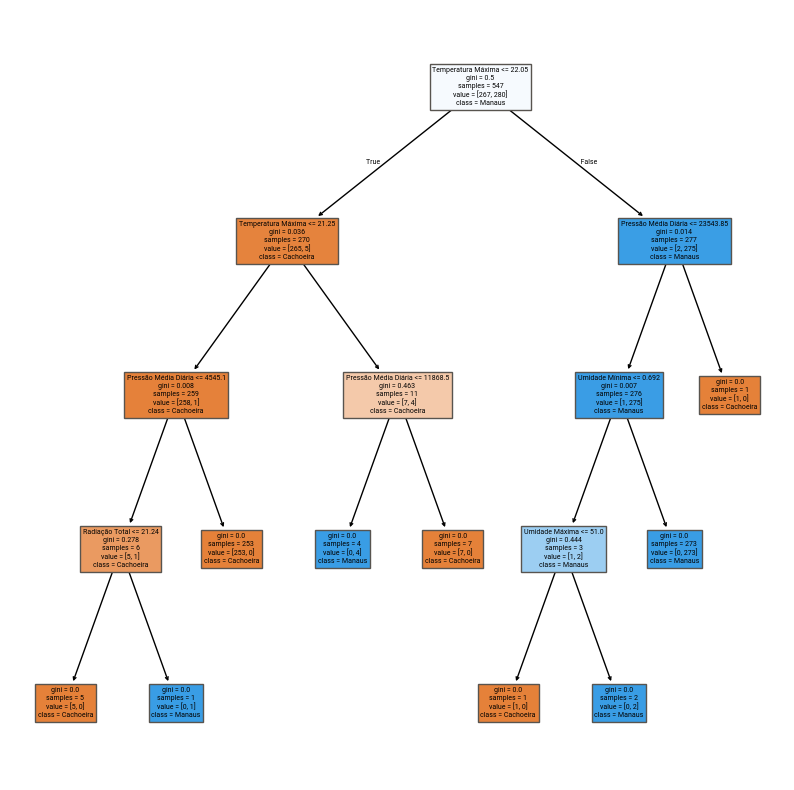

In [76]:
fig, ax = plt.subplots(figsize=(10,10)) # Faz uma figura com tamanho 10x10.

tree.plot_tree(modelo2, # Usa o modelo2
               filled = True, # Preenche com a cor da classificação (A cor corresponde à classe,
               # o quão escuro corresponde a razão da classe majoritária
               feature_names = x_train.columns, # Coloca o nome das colunas no gráfico
               class_names = ['Cachoeira', 'Manaus'], # Coloca os nomes das classes
               ax = ax) # Faz o fluxograma no ax
plt.show()

Olhe as colunas que são usadas para classificação. Muitas são completamente ignoradas, e poderiam ser removidas sem muita perda de performance.

Outras formas de avaliação também seguem iguais, tanto em teoria quanto em código. Por exemplo, uma matriz de confusão:

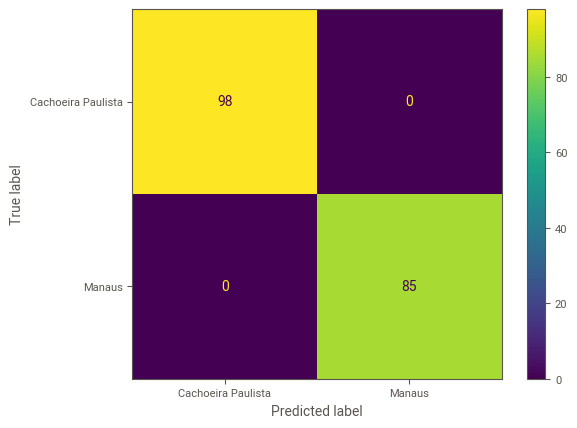

In [77]:
ConfusionMatrixDisplay.from_estimator(modelo2, # Usa o modelo 2
                                      x_test_tree, # Usa as variáveis de teste
                                      y_test) # Usa a variável objetivo de teste

Ou um `classification_report`:

In [78]:
print(classification_report(y_test, # Usa a variável objetivo de teste
    modelo2.predict(x_test_tree) # Usa a predição do modelo
))

                    precision    recall  f1-score   support

Cachoeira Paulista       1.00      1.00      1.00        98
            Manaus       1.00      1.00      1.00        85

          accuracy                           1.00       183
         macro avg       1.00      1.00      1.00       183
      weighted avg       1.00      1.00      1.00       183



# Comentários

## Uso de train/test split
Normalmente, o processo de *Machine Learning* separa o dataset em três partes distintas. Uma para treino, uma para validação, e a última para teste. A parte de treino é utilizado para treinar (assim como foi feito na aula), a parte de validação é utilizado para achar as melhores condições do modelo. A parte de teste é usada no final, apenas uma única vez, com a intenção de indicar qual seria a performance do modelo no mundo real.


Usar a parte de teste variás vezes é contraindicado, pois leva ao problema de *overfitting*, com os dados de teste "vazando" pro treinamento.  
Caso aconteça que a performance deu boa na parte de validação, mas ruim no teste, é recomendado coletar novos dados para substituir a parte de teste.

## Visualização das predições (Validação)

Com o fluxograma de `DecisionTree`, obtemos uma boa visualização sobre como os dados estão sendo interpretados. Porém, para KNN, ainda há uma abstração por trás deles.  
Abaixo, trabalha-se mais com os dados, de forma que voltamos ao gráfico de `pairplot` do *seaborn* para ver onde são os erros e os acertos.


Para isso, seguiram-se as etapas:

In [80]:
df_visu_validacao = df_03_datadia.copy() # Cria uma nova DataFrame

# Já removemos a coluna de Cidade, pois ela será nossa previsão.
dados_x = df_visu_validacao.drop(columns=['Cidade']) # Remove a coluna Cidade
dados_y = df_visu_validacao['Cidade'] # Salva a coluna Cidade na variável dados_y


predicoes = model.predict(dados_x) # Faz a predição com os pontos, sem normalizar

Agora que temos as predições, é necessário uma forma de separar os acertos dos erros:

In [82]:
acertos = predicoes == df_visu_validacao['Cidade'] # Cria uma series de comparações entre predição e real
acertos.head()

0     True
1     True
2     True
3    False
4     True
Name: Cidade, dtype: bool

Podemos usar uma propriedade de *python* para fazer uma coluna auxiliar, que nos dará as cores do gráfico:  

Qualquer variável, quando multiplicada por `True`, retorna ela mesma. Já quando multiplicada por `False`, retorna uma variável vazia (que também pode ser usada como um `False`)

In [83]:
"Bom dia!" * True

'Bom dia!'

In [84]:
"Bom dia!" * False

''

Assim, podemos multiplicar a coluna de cidades pela coluna de acertos, de forma que em todo acerto, o nome da cidade permanece intacto; e em todo erro, temos uma variável vazia:

In [85]:
lista_aux = df_visu_validacao['Cidade'] * acertos
lista_aux

0      Cachoeira Paulista
1      Cachoeira Paulista
2      Cachoeira Paulista
3                        
4      Cachoeira Paulista
              ...        
725                Manaus
726                Manaus
727                Manaus
728                Manaus
729                Manaus
Name: Cidade, Length: 730, dtype: object

O que resta, então, é dar um nome às variáveis falsas. Para isso, pode-se usar de um conceito chamado função lambda, junto ao `.map`. A função lambda praticamente nos permites criar uma função y(x) que será aplicado de item a item:

In [86]:
lista_rotulos = lista_aux.map(lambda x: x if x else 'Erro')
lista_rotulos

0      Cachoeira Paulista
1      Cachoeira Paulista
2      Cachoeira Paulista
3                    Erro
4      Cachoeira Paulista
              ...        
725                Manaus
726                Manaus
727                Manaus
728                Manaus
729                Manaus
Name: Cidade, Length: 730, dtype: object

Em partes, o código acima faz, separado em |partes|:


```
lista_aux.map( |  lambda x: x | if x | else 'Erro')

lista_aux.map(FUNÇÃO) # Aplica a FUNÇÃO para todos itens de lista_aux

lambda x: x # Declara uma variável em x, que é x
# Basicamente, y(x) = x

if x # Cria uma condição para a função, y(x) = x apenas se x.
# Variáveis não-vazias contam como True, logo, isto esta falando que a y(x) = x caso x não seja vazio.

else "Erro" # Caso contrário (ou seja, x não é vazio), y(x) = "Erro"

```



O que resta é colocar tudo em uma única `DataFrame` para o `pairplot`:

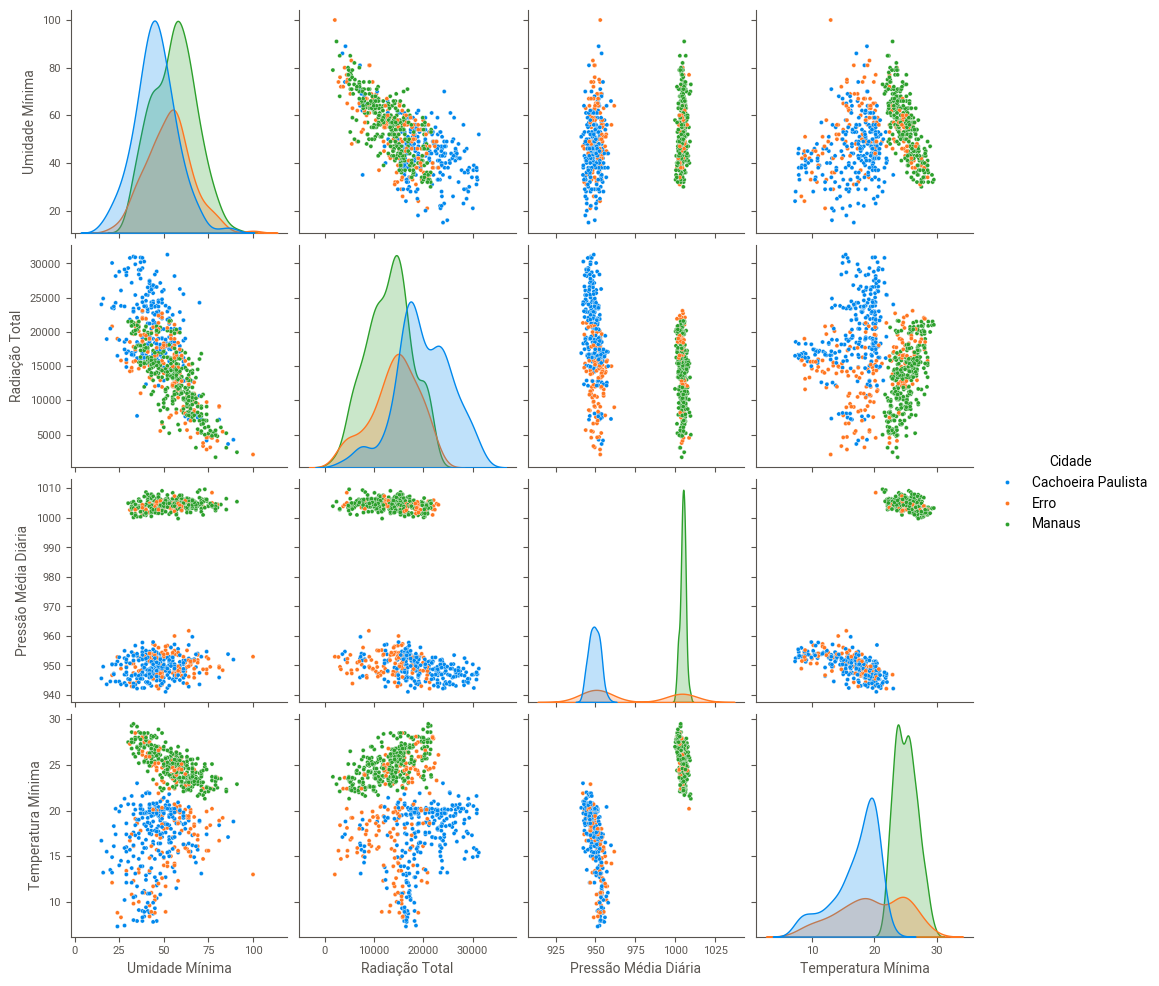

In [87]:
df_visu_3 = pd.concat([dados_x, lista_rotulos], axis=1)

# Agora vamos deixar apenas algumas colunas para deixar o gráfico mais simples:
df_visu_4 = df_visu_3[['Umidade Mínima', 'Radiação Total', 'Pressão Média Diária', 'Temperatura Mínima', 'Cidade']]

sns.pairplot(df_visu_4, hue='Cidade')


Como previsto, os erros ocorrem com mais frequência nas áreas de intersecções. Assim como, pois não usamos dados normalizados, em áreas com altos valores.

### Removendo as colunas extras, e comparação de tempo. (Preparação de Dados)

#### Preparação de Dados

In [88]:
df_remov = df_02_ffill.copy()

As colunas escolhidas foram baseadas na área do `pairplot`. As  com as menores intersecções de área, e portanto as melhores para o modelo, são:


```
lista_cols = ["Pressão Média Diária", "Temperatura Média Diária", "Temperatura Mínima"]
```



In [89]:
lista_cols = ["Pressão Média Diária", "Temperatura Média Diária", "Temperatura Mínima"]

Vamos criar duas `DataFrames`, para comparar os resultados depois:

In [90]:
df_boa = df_remov[lista_cols + ['Cidade']] # Cria uma DataFrame só com colunas boas e a Cidade
df_ruim = df_remov.drop(lista_cols, axis=1) # Cria uma DataFrame só com as colunas ruins

###### Train/Test Split

In [91]:
# Train/Test Split baseado na df_boa
x_train_bom, x_test_bom, y_train_bom, y_test_bom = train_test_split(df_boa.drop('Cidade', axis=1),
                                                                      df_boa.Cidade,
                                                                      random_state=123)

In [92]:
# Train/Test Split baseado na df_ruim
x_train_ruim, x_test_ruim, y_train_ruim, y_test_ruim = train_test_split(df_ruim.drop('Cidade', axis=1),
                                                                        df_ruim.Cidade,
                                                                        random_state=123)

#### Treinar o modelo

Seguindo a mesma lógica de treinamento:

In [93]:
# Salva o modelo nas variáveis
modelo_bom = KNeighborsClassifier()
modelo_ruim = KNeighborsClassifier()

In [94]:
# Treina ambos modelos
modelo_bom.fit(x_train_bom, y_train_bom)
modelo_ruim.fit(x_train_ruim, y_train_ruim)

KNeighborsClassifier()

#### Validação

Assim, vamos comparar a avaliação de ambas:

In [95]:
print("O accuracy_score do modelo com apenas colunas boa é de: %.3f" % accuracy_score(y_test_bom, modelo_bom.predict(x_test_bom)))
print("Já o accuracy_score do modelo com apenas colunas ruins é de: %.3f" % accuracy_score(y_test_ruim, modelo_ruim.predict(x_test_ruim)))

O accuracy_score do modelo com apenas colunas boa é de: 1.000
Já o accuracy_score do modelo com apenas colunas ruins é de: 0.650


In [96]:
print(classification_report(y_test_bom, modelo_bom.predict(x_test_bom)))
print("-----------------------------------------------------------------")
print(classification_report(y_test_ruim, modelo_ruim.predict(x_test_ruim)))

                    precision    recall  f1-score   support

Cachoeira Paulista       1.00      1.00      1.00        98
            Manaus       1.00      1.00      1.00        85

          accuracy                           1.00       183
         macro avg       1.00      1.00      1.00       183
      weighted avg       1.00      1.00      1.00       183

-----------------------------------------------------------------
                    precision    recall  f1-score   support

Cachoeira Paulista       0.71      0.59      0.64        98
            Manaus       0.60      0.72      0.66        85

          accuracy                           0.65       183
         macro avg       0.66      0.65      0.65       183
      weighted avg       0.66      0.65      0.65       183



Vemos, então, que com apenas 3 das colunas foi possível obter um resultado extremamente bom. (Normalmente deveríamos temer resultados tão extremos, mas para objetivos didáticos, explicita os conceitos perfeitamente.)

##### Comparando a velocidade dos modelos

A performance do `modelo_bom` não foi tão diferente do nosso `modelo2` (com dados normalizados). E o trabalho feito durante toda a preparação dos dados foi muito maior.  
Então, segue o motivo para fazer tudo isso: reduzir o tempo e recursos para lidar com o modelo.

In [97]:
import time # Biblioteca para calcular tempo gasto com códigos

Para calcular o tempo levado, vamos usar a biblioteca `time`, e pegar o tempo antes e depois do treino e teste dos modelos, calculando a diferença:

In [98]:
modelo_bom = KNeighborsClassifier() # Salva o modelo a uma variável

tempo_1 = time.time() # Pega o tempo antes do treino
modelo_bom.fit(x_train_bom, y_train_bom) # Treina o modelo
tempo_2 = time.time() # Pega o tempo depois
tempo_treino = tempo_2 - tempo_1 # Calcula o tempo levado para o teste

tempo_1 = time.time() # Pega o tempo antes do teste
modelo_bom.predict(x_test_bom) # Faz o teste
tempo_2 = time.time() # Pega o tempo depois
tempo_teste = tempo_2 - tempo_1 # Calcula o tempo levado para o teste

print("O tempo de treino foi de: %.5f s" % tempo_treino)
print("O tempo de teste foi de: %.5f s" % tempo_teste)

O tempo de treino foi de: 0.00400 s
O tempo de teste foi de: 0.01744 s


In [ ]:
modelo_normal = KNeighborsClassifier() # Salva o modelo a uma variável

tempo_1 = time.time() # Pega o tempo antes do treino
modelo_normal.fit(X_train_1_scaled, Y_train_1) # Treina o modelo com os dados normalizados
tempo_2 = time.time() # Pega o tempo depois
tempo_treino = tempo_2 - tempo_1 # Calcula o tempo levado para o teste

tempo_1 = time.time() # Pega o tempo antes do teste
modelo_normal.predict(X_test_1_scaled) # Faz o teste com os dados normalizados
tempo_2 = time.time() # Pega o tempo depois
tempo_teste = tempo_2 - tempo_1 # Calcula o tempo levado para o teste

print("O tempo de treino foi de: %.5f s" % tempo_treino)
print("O tempo de teste foi de: %.5f s" % tempo_teste)

O tempo de treino foi de: 0.00411 s
O tempo de teste foi de: 0.01235 s


Vemos que há diferenças de milissegundos (E em alguns casos, o modelo normal tem até performance melhor, devido a aleatoriedade inicial do modelo). Para casos pequenos, como nossos dados, a escolha de preparação de dados é livre. Mas para para alguns casos, estes milissegundos são importantíssimos.

-----

A parte abaixo usa de um *python* um pouco mais avançado. Porém, os conceitos são importantes.

## Engenharia de Dados - trocando Data por seno e cosseno

A precisão do modelo é impressionante, ainda mais considerando que o `index` é desconsiderado pelo modelo.

Isso também é uma das falhas do modelo. Suponha duas cidades de geografia semelhantes, porém em hemisférios diferentes; neste caso, a data seria de suma importância para a separação dos grupos.

Porém, o modelo **KNN** exige dados numéricos, pois eles são trabalhados como `floats` em sua matemática.
Mas o modelo é feito em relação a distância, e dados circulares/periódicos sofrem com o algoritmo **KNN**. De forma que os dias 1 e 365 serão visto como "distantes", quando de um ponto de vista climático, estão pertos.

Há diversas formas de resolver este problemas, desde criação de dados extras para indicar essa relação; funções trigonométricas...

A transformação de data para dia do ano já foi demonstrada:

In [100]:
df_concat.reset_index().Data.dt.dayofyear

0        1
1        2
2        3
3        4
4        5
      ... 
725    361
726    362
727    363
728    364
729    365
Name: Data, Length: 730, dtype: int32

#### Preparação de Dados

In [102]:
import numpy as np

Segue um exemplo da solução por função trigonométrica

<Axes: xlabel='Data', ylabel='Seno'>

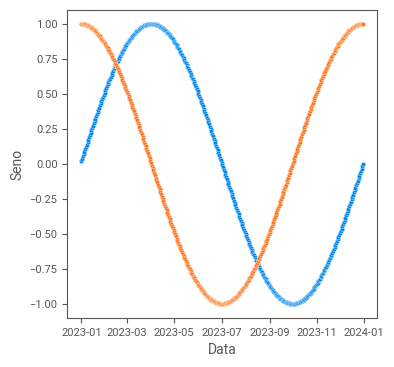

In [103]:
# Cria uma DataFrame contendo apenas a coluna Data
df_periodo = pd.DataFrame(df_concat.reset_index().Data)

# Cria uma coluna chamada Dia, com o dia do ano
df_periodo['Dia'] = df_concat.reset_index().Data.dt.dayofyear

# Cria uma coluna seno, transformando o dia em uma parte do circulo trigonométrico
df_periodo['Seno'] = df_periodo.Dia.map(lambda x: np.sin(2*np.pi*x/365))

# Cria uma coluna cosseno, transformando o dia em uma parte do circulo trigonométrico
df_periodo['Cosseno']  = df_periodo.Dia.map(lambda x: np.cos(2*np.pi*x/365))

# fig, ax para gráficos
fig, ax = plt.subplots(figsize=(4,4))

# Gráfico de Data/Seno
sns.scatterplot(data=df_periodo, x='Data', y='Seno', ax=ax)

# Gráfico de Data/Cosseno
sns.scatterplot(data=df_periodo, x='Data', y='Cosseno', ax=ax)

<Axes: xlabel='Seno', ylabel='Cosseno'>

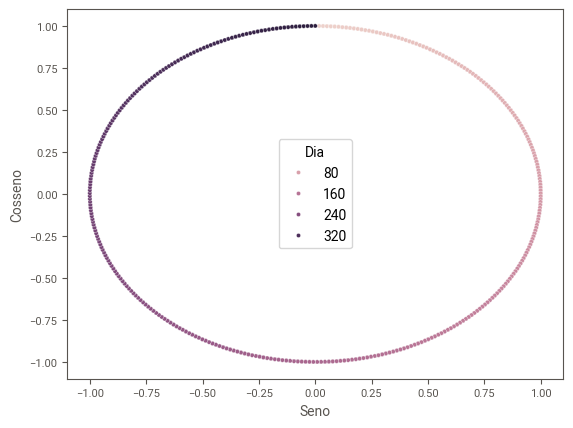

In [104]:
# Cria um gráfico de Seno/Cosseno, com a cor do ponto sendo o dia.
sns.scatterplot(data=df_periodo, x='Seno', y="Cosseno", hue="Dia")

Trocando a coluna `"Data"` da `df2` por nossas novas colunas:

In [106]:
# Pega a df2, e remove Data
df_periodo_2 = df_02_ffill.copy().reset_index().drop('Data', axis=1)

# Adiciona as colunas Seno, Cosseno
df_periodo_2[['Seno', 'Cosseno']] = df_periodo[['Seno', 'Cosseno']]

# Mostra as 5 primeiras linhas
df_periodo_2.head()

Precipitação Total Diária  Pressão Média Diária  Radiação Total  \
0                        0.4            948.762500         22965.3   
1                        0.0            946.658333         22965.3   
2                        0.0            944.604167         19112.9   
3                        0.4            943.491304         15371.8   
4                       21.0            945.939130          7177.5   

   Temperatura Média Diária  Temperatura Máxima  Temperatura Mínima  \
0                 23.025000                29.6                18.1   
1                 23.925000                31.3                17.9   
2                 23.608333                29.9                19.3   
3                 24.139130                29.8                21.2   
4                 19.830435                23.6                18.4   

   Umidade Máxima  Umidade Mínima  Velocidade do Vento              Cidade  \
0           100.0            52.0             0.604167  Cachoeira Paulista   
1           100.0            41.0             1.008333  Cachoeira Paulista   
2           100.0            49.0             1.508333  Cachoeira Paulista   
3           100.0            49.0             0.852174  Cachoeira Paulista   
4           100.0            81.0             1.352174  Cachoeira Paulista   

       Seno   Cosseno  
0  0.017213  0.999852  
1  0.034422  0.999407  
2  0.051620  0.998667  
3  0.068802  0.997630  
4  0.085965  0.996298

#### Modelagem/Análise

Seguindo com o treino do modelo. Vamos usar de um **KNN**:

In [107]:
modelo_periodo = KNeighborsClassifier() # Salva o modelo

# Faz a separação train/test
x_train_periodo, x_test_periodo, y_train_periodo, y_test_periodo = train_test_split(df_periodo_2.drop('Cidade', axis=1),
                                                                                      df_periodo_2.Cidade,
                                                                                      random_state=123)

Agora usando de um *scaler*:

In [108]:
scaler_periodo = StandardScaler() # Salva o scaler

x_train_periodo = scaler_periodo.fit_transform(x_train_periodo) # Treina e normaliza
x_test_periodo = scaler_periodo.transform(x_test_periodo) # Normaliza

In [109]:
modelo_periodo.fit(x_train_periodo, y_train_periodo) # Treina o modelo

KNeighborsClassifier()

#### Validação

0.994535519125683


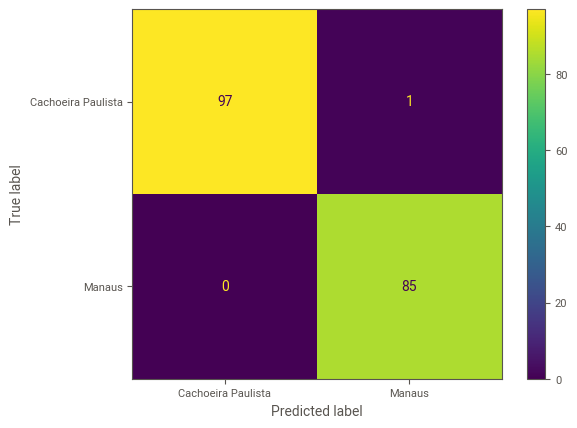

In [110]:
print(accuracy_score(y_test_periodo, modelo_periodo.predict(x_test_periodo))) # Mostra a porcentagem de acertos
ConfusionMatrixDisplay.from_estimator(modelo_periodo, x_test_periodo, y_test_periodo) # Mostra a matriz de confusão

A performance foi parecida (99%). Porém, deve-se suspeitar de performances tão altas, pois pode indicar _overfitting_, assim como outros problemas comuns de altas performances.  
Nas próximas aulas, também serão discutidos sobre melhores formas de avaliação para os modelos.

# Exercício de presença

Abaixo seguem o URL de 5 cidades. Crie um modelo para a classificação delas.
```
url_a = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/acarau.csv'
url_b = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/boavista.csv'
url_c = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/brasilia.csv'
url_d = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/saogabriel.csv'
url_e = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/saquarema.csv'
```

Caso esteja seguindo localmente, use de:

```
caminho_a = 'dados/tarefa/acarau.csv'
caminho_b = 'dados/tarefa/boavista.csv'
caminho_c = 'dados/tarefa/brasilia.csv'
caminho_d = 'dados/tarefa/saogabriel.csv'
caminho_e = 'dados/tarefa/saquarema.csv'

## Ferramentas
Seguem aqui algumas funções que podem ser úteis:

- `remover_muito_negativo(x)`: caso `x` seja menor que -50, transforme-o em 0.

Rode o código abaixo para que elas estejam disponíveis.

In [114]:
def remover_muito_negativo(x: int | float) -> int | float:
  """
  Muda a variável para 0 se for menor que -50.

  Parâmetros:
  x: int ou float

  Retorna:
  x: int ou float
  """
  if type(x) != int and type(x) != float:
    return x
  elif x is None:
    return np.nan
  elif x < -50:
    return 0
  else:
    return x

## Entendimento do negócio
É desejado um modelo, seja KNN ou DecisionTree - ou qualquer outro de classificação, para a classificação correta de pontos entre as diferentes 5 cidades.  

O nome das cidades são, em ordem alfabética:


*   Acarau
*   Boa Vista
*   Brasília
*   São Gabriel
*   Saquarema






As 5 cidades estão em biomas diferente, então se espera uma boa classificação, com um accuracy_score maior ou igual a `0.90`.

## Entendimento dos dados
Entender os nomes das colunas, a organização dos dados, e qualquer outro problema dos datasets.

In [ ]:
# Entendimento dos dados
url_a = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/acarau.csv'
url_b = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/boavista.csv'
url_c = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/brasilia.csv'
url_d = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/saogabriel.csv'
url_e = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/1-A/exercicio/saquarema.csv'

## Pre-processamento
A parte de união dos dados, modificar qualquer erro e ajustá-los para o treino

In [ ]:
# Pre-processamento


## Modelagem
Treino do modelo

In [ ]:
# Modelagem


## Validação
Avaliação do modelo.

In [ ]:
# Validação
